In [4]:
from commonfunctions import *
import joblib
import imageio as iio
from skimage import filters
from skimage.color import rgb2gray  # only needed for incorrectly saved images
from skimage.measure import regionprops
from scipy.signal import argrelextrema
%matplotlib inline
%load_ext autoreload
%autoreload 2

<ipython-input-5-f70465ae7e46>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('ACdata_base/9/1496.jpg'))


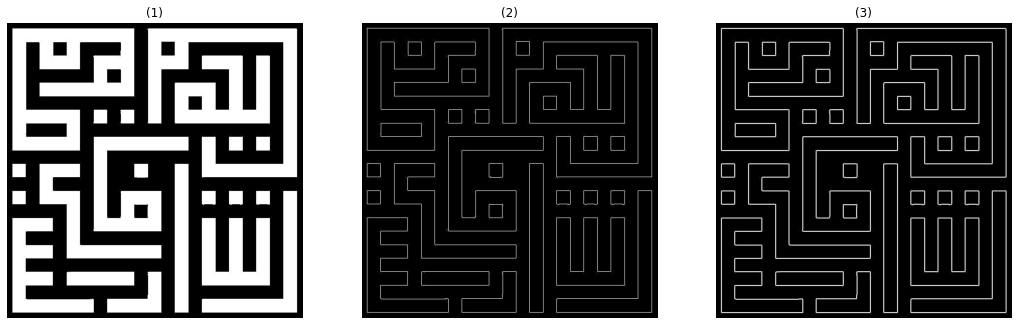

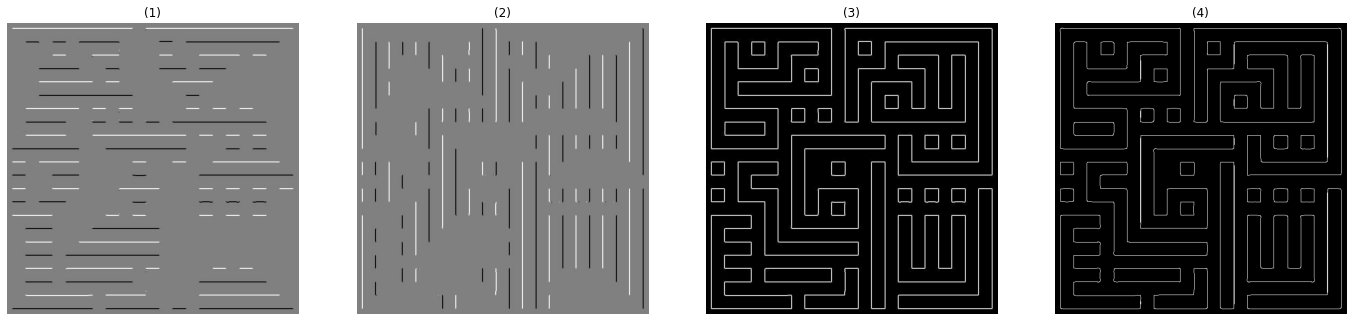

In [5]:
# 1. Built-in Sobel, Prewill, Roberts

img = rgb2gray(io.imread('ACdata_base/9/1496.jpg'))
img_roberts = roberts(img)
img_perwitt = prewitt(img)
img_sobel_h = sobel_h(img)
img_sobel_v = sobel_v(img)
img_sobel = sobel(img)
img_canny = canny(img)
show_images([img,img_roberts,img_perwitt])
show_images([img_sobel_h,img_sobel_v,img_sobel,img_canny])

In [6]:
import cv2
hog = cv2.HOGDescriptor()
im = cv2.imread('ACdata_base/9/1496.jpg')
h = hog.compute(im)
print(hog)

<HOGDescriptor 000001B6EDB4D490>


In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

img = cv2.imread('ACdata_base/9/1496.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
#print(lines)

HV = 0;
Total = 0
for line in lines:
    if(line[0,1] == 0 or abs(line[0,1] - np.pi/2) < 0.001 ):
        HV+=1;
    Total +=1

HVSL = Total - HV

ImportError: cannot import name 'xfeatures2d' from 'cv2.cv2' (C:\Users\Aya\anaconda3\lib\site-packages\cv2\cv2.cp38-win_amd64.pyd)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [119]:
def HVSL(gray):    
    edges = cv2.Canny(gray,50,150,apertureSize = 3)

    lines = cv2.HoughLines(edges,1,np.pi/180,80)
    print(lines)
    if (lines is None): 
        return -1 
    HV = 0;
    Total = 0
    for line in lines:
        if(line[0,1] == 0 or abs(line[0,1] - np.pi/2) < 0.001 ):
            HV+=1;
        Total +=1

    return HV/Total
def HPP(binary_image):
    #de beta5od binary image w betraga3 histogram bey3ed fe kol line fe kam pizel 1 w da bey3abar 3an 2el base line
    x=np.sum(binary_image, axis = 1)
    x=x/np.max(x)
    return x
def get_max_vertical(binary_image):
    #de beta5od binary image w betraga3 histogram bey3ed fe kol line fe kam pizel 1 w da bey3abar 3an 2el base line
    x=np.sum(binary_image, axis = 0)
    return np.max(x)/binary_image.shape[0]
def HPP_Skeletonize(binary_image):
    #de beta5od binary image w betraga3 histogram bey3ed fe kol line fe kam pizel 1 w da bey3abar 3an 2el base line
    x=np.sum(morphology.skeletonize(binary_image), axis = 1)
    x=x/np.max(x)
    return len(argrelextrema(x, np.greater)[0])/binary_image.shape[0]
    #print(np.array(list(argrelextrema(x, np.greater))).shape[1])
    #maximas=np.sort(x[argrelextrema(x, np.greater)[0]])
    #base_lines=[maximas[-1]]
    #return len(argrelextrema(x, np.greater)[0])
#     if(len(maximas)>1):
#         base_lines.append(maximas[-2])
#     else:
#         base_lines.append(0)
#     if(len(maximas)>2):
#         base_lines.append(maximas[-3])
#     else:
#         base_lines.append(0)
#     if(len(maximas)>3):
#         base_lines.append(maximas[-4])
#     else:
#         base_lines.append(0)
#     if(len(maximas)>4):
#         base_lines.append(maximas[-5])
#     else:
#         base_lines.append(0)
#     if(len(maximas)>5):
#         base_lines.append(maximas[-6])
#     else:
#         base_lines.append(0)
    return base_lines
def pre_process(x):
    #bet7awel le binary
    if x[0][0][0]>128:
        return (x<128).astype(int)
    else:
        return (x>128).astype(int)
def get_histogram_of_gradients(img):
    img=np.float32(img) / 255.0
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
    _, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    hist=np.histogram(angle)[0]
    print(hist)
    return hist/hist.max()
def crop_image(img,tol=0):
    # img is 2D image data
    # tol  is tolerance
    mask = img>tol
    #print(mask.any(1),mask.any(0))
    return img[np.ix_(mask.any(1).reshape(-1),mask.any(0).reshape(-1))]
def center_of_mass(img,scale=1):
    partition_size_x=img.shape[0]//scale
    partition_size_y=img.shape[1]//scale
    #centers_x=[]
    #centers_y=[]
    #for row in range(1,img.shape[0],partition_size_x):
    #    for col in range(1,img.shape[1],partition_size_y):
        #parition=img[row:row+partition_size_x,col:col+partition_size_y]
                
    mass_x, mass_y = np.where(img == 1)
            # mass_x and mass_y are the list of x indices and y indices of mass pixels

    cent_x = np.average(mass_x)
    cent_y = np.average(mass_y)
#             if cent_x is None:
#                 print(parition)
#             centers_y.append(cent_y)
#             centers_x.append(cent_y)
    return cent_x/img.shape[0]
def get_corners(gray):
    dst = cv2.cornerHarris(gray,2,3,0.04)
    #print(dst)
    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)
    img=gray.copy()
    # Threshold for an optimal value, it may vary depending on the image.
    img[dst>0.3*dst.max()]=255
    #plt.imshow(img)
    print(np.round(np.sum(dst>0.3*dst.max()),5)/np.round(np.sum(dst>0.01*dst.max()),5))
    return np.round(np.sum(dst>0.3*dst.max()),5)/np.round(np.sum(dst>0.01*dst.max()),5)
def sift_discriptor(img):
    sift = cv2.SIFT_create()
    image8bit = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    keypoints, descriptors = sift.detectAndCompute(image8bit, None)
    sift_image = cv2.drawKeypoints(image8bit, keypoints, img)
    print(descriptors.shape)
    plt.imshow(sift_image)
    return descriptors.shape[0]/(img.shape[0]*img.shape[1])

def count_ones(img):
    return np.sum(img)/(img.shape[0]*img.shape[1])
def LBP(image, eps=1e-7,numPoints=24,radius=8):
    # compute the Local Binary Pattern representation
    # of the image, and then use the LBP representation
    # to build the histogram of patterns
    lbp = feature.local_binary_pattern(image.reshape(image.shape[0],image.shape[1]), numPoints,radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
    bins=np.arange(0, numPoints + 3),
    range=(0, numPoints + 2))
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    # return the histogram of Local Binary Patterns
    return hist

NameError: name 'LBP' is not defined

In [271]:
print(img.shape)
HVSL(img)

(599, 600, 3)
[[[588.          0.       ]]

 [[ 11.          1.5707964]]

 [[587.          1.5707964]]

 [[ 11.          0.       ]]

 [[559.          0.       ]]

 [[367.          0.       ]]

 [[339.          0.       ]]

 [[203.          1.5707964]]

 [[ 38.          1.5707964]]

 [[230.          1.5707964]]

 [[259.          1.5707964]]

 [[532.          0.       ]]

 [[532.          1.5707964]]

 [[395.          0.       ]]

 [[312.          0.       ]]

 [[175.          0.       ]]

 [[286.          1.5707964]]

 [[285.          0.       ]]

 [[477.          0.       ]]

 [[312.          1.5707964]]

 [[148.          0.       ]]

 [[504.          0.       ]]

 [[505.          1.5707964]]

 [[478.          1.5707964]]

 [[450.          0.       ]]

 [[559.          1.5707964]]

 [[423.          0.       ]]

 [[258.          0.       ]]

 [[175.          1.5707964]]

 [[340.          1.5707964]]

 [[148.          1.5707964]]

 [[451.          1.5707964]]

 [[203.          0.       

0.9787234042553191

In [10]:
# input image dimensions
img_rows, img_cols = 32, 32
# The images are RGB.
img_channels = 3
nb_classes = 9

datagen = ImageDataGenerator()
data = datagen.flow_from_directory('ACdata_base',
                                    target_size=(500, 500),
                                    batch_size=73139,
                                    class_mode='sparse',
                                   color_mode='grayscale',
                                    shuffle=True,
    seed=42 )
X , y = data.next()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11);
#X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=11);
X_train.shape

Found 1685 images belonging to 9 classes.


(1348, 500, 500, 1)

In [11]:
pre_processed_train=[pre_process(patch) for patch in X_train] # de bet7awel 2el training set le binary fa law feature sha8ala 3ala binary hanesta5dem da

In [12]:
cropped_images=[crop_image(patch) for patch in pre_processed_train]

In [13]:
resized_cropped_images=[cv2.resize(np.array(cropped, dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA) for cropped in cropped_images]

In [13]:
#X_train_gray = rgb2gray(X_train)
print(X_train.shape)

(1348, 500, 500, 1)


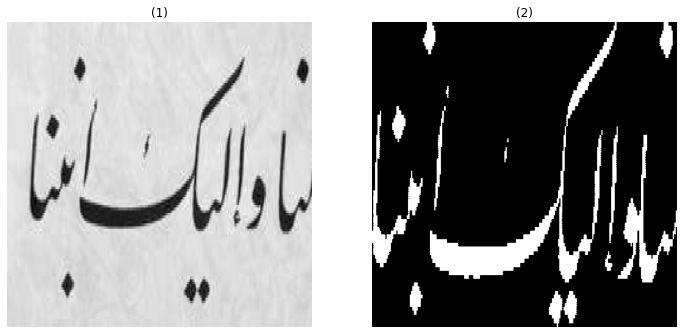

In [14]:
show_images([X_train[0],resized_cropped_images[0]])

In [15]:
#X_train_gray = rgb2gray(X_train)
print(X_train.shape)

(1348, 500, 500, 1)


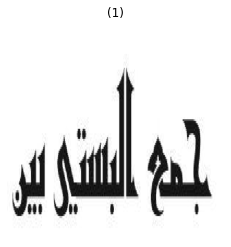

[255.]
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


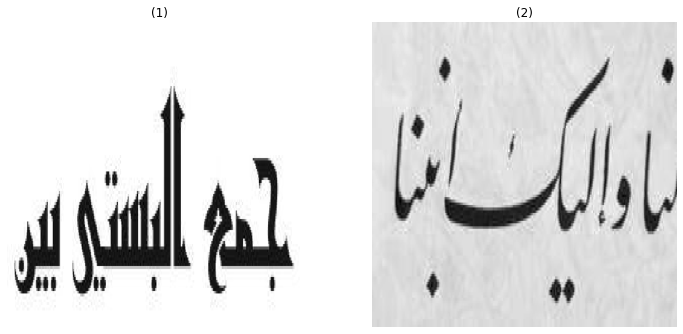

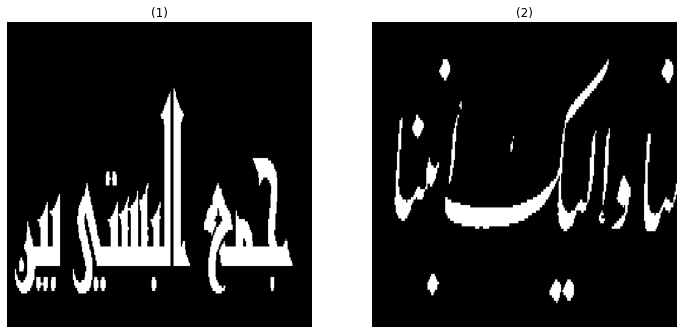

[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


In [16]:
show_images([X_train[1]])
print(X_train[1][0][0])
print(pre_process(X_train[1]))
show_images([X_train[1],X_train[0]])
show_images([pre_process(X_train[1]),pre_process(X_train[0])]) 
print(pre_process(X_train[1]))

(237, 128)


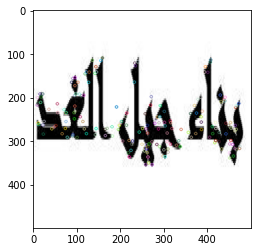

In [80]:
sift_discriptor(X_train[5])

In [134]:
lbp=np.array([LBP(cv2.resize(img, (250,250), interpolation = cv2.INTER_AREA)) for img in X_train])

In [135]:
print(lbp.shape)

(1348, 26)


In [136]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), lbp, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(lbp, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'LBP.sav'
joblib.dump(grid, filename)

gaussian [0.64814815 0.72592593 0.65925926 0.63568773 0.68401487]
svm 0.6186782321354812


['LBP.sav']

In [85]:
ones=np.array([count_ones(img) for img in resized_cropped_images]).reshape(-1,1)

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), corners, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(corners, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'Corners.sav'
joblib.dump(grid, filename)

gaussian [0.32592593 0.31111111 0.32222222 0.37546468 0.33828996]
svm 0.31827068704392125


['Corners.sav']

In [45]:
corners=np.array([get_corners(img) for img in X_train]).reshape(-1,1)

0.07719670021948082
0.07569155942851352
0.01164114238410596
0.550458058975093
0.0427061310782241
0.04639175257731959
0.05972396486825596
0.046866750599033426
0.042836812144212526
0.03798707656158214
0.40201494962625933
0.10837403045101983
0.7292807249386445
0.49969046636401154
0.03232309189489782
0.1502747471529824
0.48465909090909093
0.05529715762273902
0.10613375544123467
0.4649984162179284
0.07204645816949973
0.05897661602051361
0.15804121269540503
0.04415137614678899
0.11577551922227132
0.12560948984790044
0.09988839285714286
0.09210050251256281
0.03223798854866816
0.07394941345344751
0.06630971993410215
0.13138357705286838
0.09449473489746905
0.06839639135603888
0.028990124243389613
0.060103215561730844
0.05729307821562144
0.10932170353766689
0.11337815905402272
0.3670076726342711
0.06725468577728776
0.6514324693042292
0.05398742758535684
0.43509748447013963
0.13587069864442128
0.03995457361139789
0.058905348077056816
0.05254955007939775
0.5045558891047148
0.10678595222232797
0.11

0.12039142719316381
0.043768115942028986
0.07049945387746996
0.12158620106535892
0.04263826921458035
0.008091572922834024
0.04004775881796926
0.0471081307627829
0.03551416620629785
0.021175201186890258
0.31531988974321773
0.08103370278217598
0.6317073170731707
0.05523893029373082
0.12425202393523407
0.0438022126890946
0.03711031175059952
0.14217252396166133
0.42918894323740187
0.05769899200556135
0.6677480400108138
0.12460805945883173
0.10397599399849962
0.020654340504502027
0.057123879109930255
0.05115961800818554
0.05753856547686071
0.10246575342465754
0.1046849087893864
0.0070727812000912615
0.05108225108225108
0.05383078667458561
0.057004123985632565
0.029219282883215042
0.023387014052723355
0.13359089060593737
0.08684863523573201
0.0925575101488498
0.04236328515286752
0.49375866851595007
0.19002608955989905
0.07371188222923239
0.06723668869024485
0.006734211005278165
0.12538699690402477
0.07122460634739333
0.01434460947647823
0.3847645429362881
0.11357621049353885
0.05225579869553

0.01964133219470538
0.6443850267379679
0.062406176281363926
0.5967268726505913
0.0985388823488678
0.6064613191860004
0.10190590055559463
0.07653560934657898
0.07163858013624955
0.18406476352790796
0.05331948411667965
0.06403129503808935
0.07052718480952942
0.09814473870556578
0.1592323947684048
0.06202608431907795
0.047852331379581836
0.0821696405482286
0.0817238912732475
0.059649428795674544
0.06967878573949876
0.01282803722646097
0.07596912670193391
0.1169566560280037
0.06920492721164613
0.0664203969288715
0.10049243115082984
0.026515290239882805
0.053998632946001365
0.0728643216080402
0.5763149297615159
0.09937888198757763
0.5384320490703469
0.1239108502247088
0.7382526029877773
0.05312116347152706
0.08397312859884837
0.057412790697674417
0.5100740485620803
0.03273638594476061
0.08204259438528558
0.03321558796718323
0.03809036408831701
0.08970120009796718
0.07875533526091147
0.0893163207008189
0.1084397695967944
0.0090752564746395
0.03018935334047874
0.12784971730804304
0.1134938296

0.3828922132719601
0.025298064185291225
0.06909623938536191
0.05504822053426645
0.04200878365476418
0.031212182331585316
0.622707423580786
0.025735885475309635
0.07055124299891913
0.05999843346126733
0.5494250331711632
0.7553006604101494
0.0840273545940822
0.07331514483078888
0.03885832187070151
0.25683707521276383
0.022193749141994235
0.5312883435582823
0.070220855917806
0.01905268759978712
0.06266168439206668
0.13012117714945182
0.016249451032059728
0.08014202383971596
0.11510716152639833
0.08120204603580562
0.033587126734704896
0.04150105817374697
0.11602671118530884
0.07108094262295082
0.13228603923798693
0.06692913385826772
0.03850889192886457
0.15774223458507186
0.05460811169037731
0.06107150731241273
0.06182197496522949
0.13780155824650334
0.46574614976101963
0.034027881876780096
0.20610204550678005
0.009386311979122822
0.12198483804272915
0.08447923277624991
0.05200682543215372
0.09516922186867226
0.035854172943657725
0.017733775771092856
0.043921852387843706
0.0993218423283413

In [89]:
print(corners.min())
get_corners(X_train[corners.argmin()])

0.004252159827213823
0.004252159827213823


0.004252159827213823

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), corners, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(corners, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'Corners.sav'
joblib.dump(grid, filename)

gaussian [0.32592593 0.31111111 0.32222222 0.37546468 0.33828996]
svm 0.31827068704392125


['Corners.sav']

In [14]:
max_v=np.array([get_max_vertical(img) for img in resized_cropped_images]).reshape(-1,1)

In [15]:
max_v.shape

(1348, 1)

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), max_v, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(max_v, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'MAX_V.sav'
joblib.dump(grid, filename)

gaussian [0.41111111 0.41111111 0.38888889 0.42379182 0.41635688]
svm 0.359044471981275


['MAX_V.sav']

In [32]:
center_of_masses=np.array([center_of_mass(img) for img in resized_cropped_images]).reshape(-1,1)

In [33]:
print(np.array(center_of_masses).shape)
print(center_of_masses)

(1348, 1)
[[0.62509534]
 [0.68519484]
 [0.585345  ]
 ...
 [0.61772987]
 [0.43658614]
 [0.52711445]]


In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), center_of_masses, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(center_of_masses, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'center_of_mass.sav'
joblib.dump(grid, filename)

gaussian [0.22592593 0.27407407 0.24074074 0.26022305 0.26394052]
svm 0.2284730827481757


['center_of_mass.sav']

In [35]:

values = []
for gray in X_train:
    print(gray.shape)
    values.append(HVSL(np.uint8(gray)))
    
    

(500, 500, 1)
[[[3.0300000e+02 1.5707964e+00]]

 [[4.5400000e+02 0.0000000e+00]]

 [[2.9500000e+02 1.5707964e+00]]

 [[2.8300000e+02 1.6231562e+00]]

 [[2.9100000e+02 1.6231562e+00]]

 [[4.7000000e+01 0.0000000e+00]]

 [[2.9900000e+02 1.5707964e+00]]

 [[3.0800000e+02 1.5707964e+00]]

 [[3.3800000e+02 1.5707964e+00]]

 [[3.3400000e+02 1.5707964e+00]]

 [[3.2700000e+02 6.9813170e-02]]

 [[3.8800000e+02 1.3962634e-01]]

 [[3.9100000e+02 1.5707964e-01]]

 [[4.4000000e+01 0.0000000e+00]]

 [[3.0900000e+02 0.0000000e+00]]

 [[2.8600000e+02 1.6231562e+00]]

 [[4.5100000e+02 0.0000000e+00]]

 [[5.2000000e+01 5.2359879e-02]]

 [[2.7600000e+02 1.7104226e+00]]

 [[3.0700000e+02 1.5533431e+00]]

 [[2.9000000e+02 1.5707964e+00]]

 [[2.8800000e+02 1.6231562e+00]]

 [[3.0800000e+02 1.5184364e+00]]

 [[2.8200000e+02 1.6580628e+00]]]
(500, 500, 1)
[[[ 273.           0.       ]]

 [[ 404.           1.5707964]]

 [[ 399.           1.5707964]]

 [[ 268.           0.       ]]

 [[ 257.           0.       

(500, 500, 1)
[[[300.          1.5707964]]

 [[296.          1.5707964]]

 [[292.          1.5707964]]

 ...

 [[114.          1.9896753]]

 [[ 49.          2.0071287]]

 [[ 99.          2.024582 ]]]
(500, 500, 1)
[[[ 316.           0.       ]]

 [[-244.           3.106686 ]]

 [[ 325.           0.       ]]

 ...

 [[ -94.           3.0717795]]

 [[-211.           3.0892327]]

 [[-101.           3.106686 ]]]
(500, 500, 1)
[[[478.          0.       ]]

 [[379.          1.5707964]]

 [[455.          1.5707964]]

 [[454.          0.       ]]

 [[416.          1.5707964]]

 [[430.          0.       ]]

 [[358.          0.       ]]

 [[382.          0.       ]]

 [[407.          0.       ]]

 [[148.          1.5707964]]

 [[ 20.          0.       ]]

 [[213.          0.       ]]

 [[ 32.          1.5707964]]

 [[334.          0.       ]]

 [[341.          1.5707964]]

 [[236.          0.       ]]

 [[111.          1.5707964]]

 [[141.          0.       ]]

 [[164.          0.       ]]

 [[1

 [[  -8.           3.1241393]]]
(500, 500, 1)
[[[ 1.2200000e+02  0.0000000e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[-9.8000000e+01  3.0543261e+00]]

 [[ 1.2400000e+02  0.0000000e+00]]

 [[ 9.5000000e+01  1.0471976e-01]]

 [[ 9.8000000e+01  1.3962634e-01]]

 [[ 1.2100000e+02  1.7453292e-02]]

 [[ 1.1200000e+02  1.7453292e-01]]

 [[ 9.7000000e+01  1.2217305e-01]]

 [[ 1.1600000e+02  1.9198622e-01]]

 [[ 1.0500000e+02  1.5707964e-01]]

 [[ 3.3200000e+02  7.8539819e-01]]

 [[ 1.0100000e+02  1.2217305e-01]]

 [[ 1.0300000e+02  1.2217305e-01]]

 [[ 1.0000000e+02  1.5707964e-01]]

 [[ 1.0800000e+02  1.5707964e-01]]

 [[ 1.7700000e+02  0.0000000e+00]]

 [[ 1.3500000e+02  2.2689280e-01]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 3.7000000e+02  1.9198622e-01]]

 [[ 1.3100000e+02  2.2689280e-01]]

 [[ 3.5100000e+02  7.8539819e-01]]

 [[-1.1300000e+02  3.0892327e+00]]

 [[ 1.0400000e+02  1.3962634e-01]]

 [[ 1.1300000e+02  1.5707964e-01]]

 [[ 3.4800000e+02  1.3962634e+00]]

 [[ 3.4500000e+02 

 [[-158.           3.106686 ]]]
(500, 500, 1)
[[[ 300.           0.       ]]

 [[ 297.           0.       ]]

 [[  76.           0.       ]]

 ...

 [[-422.           3.106686 ]]

 [[-480.           3.1241393]]

 [[-334.           3.1241393]]]
(500, 500, 1)
[[[ 5.6000000e+01  1.7453292e-02]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 5.2000000e+01  0.0000000e+00]]

 ...

 [[-2.5600000e+02  3.1241393e+00]]

 [[-2.4900000e+02  3.1241393e+00]]

 [[-3.2000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[-148.           3.1241393]]

 [[-146.           3.1241393]]

 [[-142.           3.106686 ]]

 ...

 [[-297.           3.0368729]]

 [[-299.           3.054326 ]]

 [[-149.           3.106686 ]]]
(500, 500, 1)
[[[ 3.6800000e+02  1.5707964e+00]]

 [[ 3.6300000e+02  1.5707964e+00]]

 [[ 3.9800000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 3.8500000e+02  0.0000000e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  1.5707964e+00]]

 [[ 3.

 [[-1.6900000e+02  3.0368729e+00]]]
(500, 500, 1)
[[[-221.           3.106686 ]]

 [[ 361.           0.7853982]]

 [[-469.           3.106686 ]]

 ...

 [[   0.           3.106686 ]]

 [[-158.           3.1241393]]

 [[ -28.           3.1241393]]]
(500, 500, 1)
[[[ 3.7500000e+02  1.5707964e+00]]

 [[ 4.2600000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  1.5707964e+00]]

 [[ 2.6700000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 4.3400000e+02  0.0000000e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 4.3600000e+02  0.0000000e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[-4.3200000e+02  3.1241393e+00]]

 [[ 4.3800000e+02  1.7453292e-02]]

 [[ 4.3000000e+02  1.7453292e-02]]

 [[ 3.7600000e+02  1.5533431e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 2.7900000e+02  1.7453292e-02]]

 [[ 2.8000000e+02  1.5707964e+00]]

 [[ 3.6900000e+02  1.5882496e+00]]

 [[ 1.3000000e+02  2.2689280e-01]]

 [[ 3.7800000e+02  1.5533431e+00]]

 [[ 8.8000000e+01 

 [[-2.5900000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.2800000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 4.1400000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 3.2600000e+02  0.0000000e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[-1.6800000e+02  3.1066861e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[ 4.7700000e+02  0.0000000e+00]]

 [[ 1.5000000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  2.0943952e-01]]

 [[-4.1100000e+02  3.1241393e+00]]

 [[-1.1800000e+02  3.1066861e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[-4.4100000e+02  3.1066861e+00]]

 [[ 2.8700000e+02  1.9198622e-01]]

 [[-1.2300000e+02  3.1241393e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 3.5100000e+02  7.8539819e-01]]

 [[ 1.1800000e+02  0.0000000e+00]]

 [[-1.2500000e+02  3.1241393e+00]]

 [[-1.1400000e

 [[-1.2300000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 3.4000000e+02  0.0000000e+00]]

 [[ 2.9000000e+01  0.0000000e+00]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 3.1300000e+02  7.8539819e-01]]

 [[ 4.0200000e+02  0.0000000e+00]]

 [[ 3.2700000e+02  7.8539819e-01]]

 [[ 3.3500000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  7.8539819e-01]]

 [[ 3.9000000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  7.8539819e-01]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  7.8539819e-01]]

 [[ 3.1700000e+02  7.8539819e-01]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[ 7.9000000e+01  0.0000000e+00]]

 [[ 4.0900000e+02  7.8539819e-01]]

 [[ 3.6700000e+02  1.5707964e+00]]

 [[ 3.8500000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  7.8539819e-01]]

 [[ 3.3200000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  7.8539819e-01]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  7.8539819e-01]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  7.5049156e-01]]

 [[ 3.8000000e+02  0.0000000e+00]]

 [[ 4.1500000e

 [[-160.           3.1241393]]]
(500, 500, 1)
[[[ 4.1300000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 4.5100000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 4.5000000e+02  7.8539819e-01]]

 [[ 4.4500000e+02  7.5049156e-01]]

 [[ 4.4800000e+02  7.8539819e-01]]

 [[ 4.4800000e+02  7.3303831e-01]]

 [[ 4.3800000e+02  7.8539819e-01]]

 [[-4.0100000e+02  3.1066861e+00]]

 [[ 2.9700000e+02  1.5533431e+00]]

 [[ 4.3600000e+02  8.0285144e-01]]

 [[ 1.4900000e+02  0.0000000e+00]]

 [[ 4.4600000e+02  0.0000000e+00]]

 [[ 4.5200000e+02  7.1558499e-01]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 4.4600000e+02  1.2217305e-01]]

 [[ 4.4700000e+02  7.5049156e-01]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 4.5600000e+02  6.9813168e-01]]

 [[ 4.5400000e+02  7.1558499e-01]]

 [[ 4.1700000e+02  5.9341192e-01]]

 [[ 4.4100000e+02  7.8539819e-01]]

 [[ 4.3200000e+02  8.2030475e-01]]

 [[ 2.9500000e+02 

 [[-4.2900000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.4800000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 2.8000000e+02  0.0000000e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  0.0000000e+00]]

 [[ 1.4500000e+02  0.0000000e+00]]

 [[ 1.8100000e+02  0.0000000e+00]]

 [[ 3.1600000e+02  1.5707964e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 3.4000000e+02  1.5882496e+00]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  0.0000000e+00]]

 [[ 3.7000000e+01  0.0000000e+00]]

 [[ 3.4900000e+02  1.5533431e+00]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 1.5600000e+02  1.7453292e-02]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.7453292e-02]]

 [[ 3.1700000e

 [[-2.7600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 287.           1.5707964]]

 [[ 296.           1.5707964]]

 [[ 304.           1.5707964]]

 ...

 [[-255.           3.0892327]]

 [[-140.           3.0892327]]

 [[-405.           3.106686 ]]]
(500, 500, 1)
[[[-424.           3.0892327]]

 [[-447.           3.0892327]]

 [[-429.           3.106686 ]]

 [[-196.           3.0892327]]

 [[ 453.           0.7853982]]

 [[-201.           3.106686 ]]

 [[-207.           3.1241393]]

 [[ 332.           0.7853982]]

 [[ 211.           0.       ]]

 [[-451.           3.106686 ]]

 [[-432.           3.106686 ]]

 [[ 214.           0.       ]]

 [[  95.           0.       ]]]
(500, 500, 1)
[[[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 3.7000000e+01  0

 [[-4.3600000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 279.           1.5707964]]

 [[ 301.           1.5707964]]

 [[ 284.           1.5707964]]

 [[ 276.           1.5882496]]

 [[-240.           3.0892327]]

 [[ 286.           1.553343 ]]

 [[ 308.           1.4660766]]

 [[ 295.           0.       ]]

 [[ 303.           0.       ]]

 [[ 268.           1.6057029]]

 [[ 293.           1.5358897]]

 [[ 283.           1.553343 ]]

 [[ 297.           1.5707964]]

 [[ 274.           1.6057029]]

 [[ 288.           1.5358897]]

 [[ 281.           1.553343 ]]

 [[ 263.           1.6057029]]

 [[-386.           3.0892327]]

 [[ 265.           1.6580628]]

 [[-383.           3.0892327]]

 [[-169.           3.106686 ]]

 [[ 252.           0.       ]]

 [[ 307.           1.5707964]]

 [[ 257.           1.6231562]]

 [[ 395.           0.       ]]

 [[ 291.           1.4835298]]

 [[ 255.           1.6231562]]]
(500, 500, 1)
[[[ 1.9000000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]



(500, 500, 1)
[[[2.8400000e+02 1.5707964e+00]]

 [[3.0700000e+02 1.5707964e+00]]

 [[2.9900000e+02 1.5707964e+00]]

 [[3.2200000e+02 1.5707964e+00]]

 [[3.3000000e+02 1.5707964e+00]]

 [[2.7600000e+02 1.5707964e+00]]

 [[2.9100000e+02 1.5707964e+00]]

 [[3.1400000e+02 1.5707964e+00]]

 [[2.3900000e+02 0.0000000e+00]]

 [[3.3700000e+02 1.5707964e+00]]

 [[2.2500000e+02 0.0000000e+00]]

 [[2.9400000e+02 1.5882496e+00]]

 [[3.4500000e+02 1.5707964e+00]]

 [[1.7300000e+02 0.0000000e+00]]

 [[2.4600000e+02 0.0000000e+00]]

 [[2.3200000e+02 0.0000000e+00]]

 [[3.5300000e+02 1.5707964e+00]]

 [[1.7600000e+02 0.0000000e+00]]

 [[2.9700000e+02 1.5533431e+00]]

 [[3.6700000e+02 1.3089969e+00]]

 [[3.2100000e+02 1.6057029e+00]]

 [[4.0600000e+02 2.9670596e-01]]

 [[3.7900000e+02 1.2740903e+00]]

 [[3.7700000e+02 1.2915436e+00]]

 [[3.5100000e+02 1.3613569e+00]]

 [[3.2200000e+02 1.4486233e+00]]

 [[3.2400000e+02 1.5184364e+00]]

 [[3.2700000e+02 1.5533431e+00]]

 [[3.2600000e+02 1.5882496e+00]]



 [[ 3.2600000e+02  1.5882496e+00]]]
(500, 500, 1)
[[[ 3.0000000e+02  1.5707964e+00]]

 [[ 2.9200000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 1.4300000e+02  0.0000000e+00]]

 [[-2.8200000e+02  3.1066861e+00]]

 [[-2.8500000e+02  3.1066861e+00]]

 [[ 3.1500000e+02  1.5707964e+00]]

 [[ 2.9300000e+02  1.5882496e+00]]

 [[ 2.8900000e+02  1.5882496e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 2.8000000e+02  1.5707964e+00]]

 [[ 2.9800000e+02  1.5533431e+00]]

 [[-2.8100000e+02  3.0892327e+00]]

 [[-1.4000000e+02  3.0892327e+00]]

 [[-2.8700000e+02  3.1241393e+00]]

 [[ 3.0200000e+02  1.5533431e+00]]

 [[-4.5300000e+02  3.1066861e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 2.7600000e+02  1.5707964e+00]]

 [[ 3.0400000e+02  1.5533431e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.4835298e+00]]

 [[-1.3300000e+02  3.1066861e+00]]

 [[ 2.8600000e+02  1.6057029e+00]]

 [[ 4.6300000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  1.5184364e+00]]

 [[ 3.0500000e

 [[-1.6500000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 8.7000000e+01  0.0000000e+00]]

 [[-2.2900000e+02  3.0543261e+00]]

 [[ 4.8000000e+01  1.7453292e-02]]

 ...

 [[-2.0300000e+02  2.9845130e+00]]

 [[-3.3700000e+02  3.0368729e+00]]

 [[-2.1500000e+02  3.0543261e+00]]]
(500, 500, 1)
[[[ 279.           0.       ]]

 [[ 297.           0.       ]]

 [[ 263.           0.       ]]

 ...

 [[-311.           2.9146998]]

 [[ -54.           2.9496064]]

 [[ -23.           3.0019662]]]
(500, 500, 1)
[[[ 3.4000000e+02  0.0000000e+00]]

 [[ 3.5400000e+02  1.5707964e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 3.2600000e+02  1.5707964e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  1.5707964e+00]]

 [[ 1.0300000e+02  0.0000000e+00]]

 [[ 3.5000000e+02  1.5707964e+00]]

 [[ 3.3100000e+02  1.5707964e+00]]

 [[ 3.4600000e+02  1.5707964e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 3.9600000e+02  0.0000000e+00]]

 [[ 3.9800000e+02  0.0000000e+00]]

[[[ 3.6300000e+02  7.8539819e-01]]

 [[-2.3400000e+02  3.1066861e+00]]

 [[ 3.3000000e+02  7.3303831e-01]]

 [[-2.4900000e+02  3.1066861e+00]]

 [[ 3.3400000e+02  7.8539819e-01]]

 [[ 3.2200000e+02  7.8539819e-01]]

 [[-2.8000000e+01  2.3561945e+00]]

 [[-2.4500000e+02  3.1066861e+00]]

 [[-2.3800000e+02  3.1066861e+00]]

 [[ 2.4900000e+02  8.2030475e-01]]

 [[ 3.3900000e+02  7.8539819e-01]]

 [[ 3.9500000e+02  7.8539819e-01]]

 [[-1.2900000e+02  3.1066861e+00]]

 [[-8.0000000e+01  3.1241393e+00]]

 [[ 3.0000000e+01  2.3561945e+00]]

 [[-3.9400000e+02  3.0892327e+00]]

 [[-8.3000000e+01  3.1241393e+00]]

 [[-2.4300000e+02  3.1241393e+00]]

 [[ 3.1400000e+02  7.3303831e-01]]

 [[-3.3300000e+02  3.1066861e+00]]

 [[ 3.0800000e+02  6.8067843e-01]]

 [[ 2.4100000e+02  8.3775806e-01]]

 [[-3.7000000e+01  2.3561945e+00]]

 [[ 4.0000000e+02  7.8539819e-01]]

 [[-1.3200000e+02  3.1241393e+00]]

 [[ 3.0400000e+02  6.8067843e-01]]

 [[ 3.9000000e+02  7.8539819e-01]]

 [[ 3.7400000e+02  8.0285144

(500, 500, 1)
[[[371.          1.5707964]]

 [[357.          1.5707964]]

 [[350.          1.5707964]]

 [[364.          1.5707964]]

 [[344.          1.5707964]]

 [[372.          1.553343 ]]

 [[349.          1.5882496]]

 [[310.          0.       ]]

 [[363.          1.5882496]]

 [[304.          0.       ]]

 [[358.          1.553343 ]]

 [[337.          1.5707964]]

 [[348.          1.6057029]]

 [[356.          1.5882496]]

 [[307.          0.       ]]

 [[346.          1.6231562]]

 [[373.          1.5358897]]

 [[310.          1.5707964]]

 [[330.          1.5707964]]

 [[354.          1.6057029]]

 [[303.          1.5707964]]

 [[366.          1.5358897]]

 [[344.          1.6231562]]

 [[352.          1.553343 ]]

 [[338.          1.6406095]]

 [[343.          1.5882496]]

 [[341.          1.6057029]]

 [[351.          1.6231562]]

 [[369.          1.5184364]]

 [[ 22.          0.       ]]

 [[ 42.          0.       ]]

 [[ 45.          0.       ]]

 [[ 49.          0.       

(500, 500, 1)
[[[  74.           0.       ]]

 [[ 335.           0.       ]]

 [[ 337.           1.5707964]]

 ...

 [[-118.           3.0892327]]

 [[-327.           3.106686 ]]

 [[-266.           3.1241393]]]
(500, 500, 1)
[[[ 3.8900000e+02  1.5707964e+00]]

 [[ 3.8600000e+02  1.5707964e+00]]

 [[ 3.8300000e+02  1.5707964e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 7.7000000e+01  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.4500000e+02  0.0000000e+00]]

 [[ 1.3200000e+02  0.0000000e+00]]

 [[ 1.4300000e+02  0.0000000e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 1.6400000e+02  0.0000000e+00]]

 [[ 3.5500000e+02  1.5707964e+00]]

 [[ 1.1100000e+02  0.0000000e+00]]

 [[ 3.9000000e+02  1.5533431e+00]]

 [[ 3.8200000e+02  1.5882496e+00]]

 [[ 8.2000000e+01  1.7453292e-02]]

 [[ 1.6900000e+02  1.7453292e-02]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[-1.3000000e+02 

 [[-1.6000000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 3.5000000e+01  1.7453292e-02]]

 [[ 3.7500000e+02  3.4906585e-02]]

 [[ 3.8000000e+01  5.2359879e-02]]

 ...

 [[-3.4500000e+02  3.0194197e+00]]

 [[-2.2000000e+02  3.0194197e+00]]

 [[-2.6900000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 211.           0.       ]]

 [[ 112.           0.       ]]

 [[ 156.           0.       ]]

 ...

 [[  -2.           3.054326 ]]

 [[-450.           3.106686 ]]

 [[ -83.           3.1241393]]]
(500, 500, 1)
[[[ 437.           0.       ]]

 [[ 417.           0.       ]]

 [[ 339.           0.       ]]

 ...

 [[-274.           2.9670596]]

 [[-186.           3.1241393]]

 [[ -91.           3.1241393]]]
(500, 500, 1)
[[[ 339.           0.7853982]]

 [[-216.           3.0892327]]

 [[ 325.           0.7853982]]

 ...

 [[ -27.           3.0892327]]

 [[-357.           3.106686 ]]

 [[-232.           3.106686 ]]]
(500, 500, 1)
[[[ 2.2600000e+02  8.7266460e-02]]

 [[ 2.3200000e+02  1.0471976e-01]]

 [[ 3.

[[[ 1.4800000e+02  0.0000000e+00]]

 [[ 1.4500000e+02  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 4.1400000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 4.2500000e+02  3.8397244e-01]]

 [[ 5.8000000e+01  0.0000000e+00]]

 [[ 4.2800000e+02  3.8397244e-01]]

 [[ 4.1300000e+02  3.3161256e-01]]

 [[ 1.5500000e+02  0.0000000e+00]]

 [[ 4.0900000e+02  0.0000000e+00]]

 [[ 6.5000000e+01  0.0000000e+00]]

 [[ 4.2200000e+02  3.6651915e-01]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 4.1700000e+02  3.4906584e-01]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 4.3500000e+02  4.1887903e-01]]

 [[ 7.0000000e+01  0.0000000e+00]]

 [[ 1.5800000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 4.3400000e+02  3.8397244e-01]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  3.6651915

[[[412.          1.5707964]]

 [[ 82.          1.5707964]]

 [[442.          0.       ]]

 [[450.          0.       ]]

 [[275.          0.       ]]

 [[268.          0.       ]]

 [[179.          1.5707964]]

 [[199.          1.5707964]]

 [[398.          0.       ]]

 [[355.          0.       ]]

 [[485.          0.       ]]

 [[405.          0.       ]]

 [[144.          0.       ]]

 [[225.          0.       ]]

 [[362.          0.       ]]

 [[232.          0.       ]]

 [[ 14.          0.       ]]

 [[137.          0.       ]]

 [[316.          1.5707964]]

 [[ 50.          0.       ]]

 [[101.          0.       ]]

 [[ 94.          0.       ]]

 [[ 57.          0.       ]]

 [[175.          1.5882496]]

 [[296.          1.5707964]]

 [[177.          1.5882496]]]
(500, 500, 1)
[[[ 1.7800000e+02  0.0000000e+00]]

 [[ 2.1100000e+02  0.0000000e+00]]

 [[ 8.1000000e+01  0.0000000e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 1.8400000e+02  0.00000

(500, 500, 1)
[[[ 324.           1.5707964]]

 [[ 321.           1.5707964]]

 [[ 289.           1.5707964]]

 [[ 286.           1.5707964]]

 [[  37.           0.       ]]

 [[ 327.           1.553343 ]]

 [[ 305.           1.5707964]]

 [[ 282.           1.5882496]]

 [[ 285.           1.5882496]]

 [[ 408.           0.       ]]

 [[  31.           0.       ]]

 [[ 313.           1.5882496]]

 [[ 150.           0.       ]]

 [[ 290.           1.553343 ]]

 [[ 301.           1.5707964]]

 [[ 247.           1.7453293]]

 [[-132.           3.0717795]]

 [[ 318.           1.5882496]]

 [[ 325.           1.5358897]]

 [[ 317.           1.5707964]]

 [[ 249.           1.727876 ]]

 [[ 337.           1.4835298]]]
(500, 500, 1)
[[[ 2.9600000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  1.5882496e+00]]

 [[ 2.8400000e+02  1.5707964e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  1.5533431e+00]]

 [[ 2.7200000e+0

 [[-8.9000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[-2.7500000e+02  3.1066861e+00]]

 [[-3.3800000e+02  3.1066861e+00]]

 [[-1.1300000e+02  3.1241393e+00]]

 [[-2.6000000e+02  3.1066861e+00]]

 [[-2.8000000e+02  3.1241393e+00]]

 [[-2.7900000e+02  3.1066861e+00]]

 [[-2.1000000e+02  3.1241393e+00]]

 [[ 2.0900000e+02  0.0000000e+00]]

 [[-5.6000000e+01  3.1066861e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[-1.3200000e+02  2.8972466e+00]]

 [[-3.4600000e+02  3.1241393e+00]]

 [[ 4.3000000e+01  3.4906585e-02]]

 [[ 2.8800000e+02  1.7453292e-02]]

 [[-3.4200000e+02  3.1241393e+00]]

 [[ 2.8300000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  1.7453292e-02]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  5.2359879e-02]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  3.4906585e-02]]

 [[-6.0000000e+01  3.1241393e+00]]

 [[ 5.0000000e+01  8.7266460e-02]]

 [[-2.7700000e+02  3.1241393e+00]]

 [[ 3.7600000e+02  1.0471976e-01]]

 [[-1.3900000e

 [[-1.9200000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.8100000e+02  1.5707964e+00]]

 [[ 3.7500000e+02  1.5707964e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 4.3500000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 1.6100000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  1.5707964e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 4.3700000e+02  1.7453292e-02]]

 [[ 3.4400000e+02  1.5533431e+00]]

 [[ 3.3400000e+02  1.5882496e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.7400000e+02  1.5882496e+00]]

 [[ 3.8200000e+02  1.5533431e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  1.7453292e-02]]

 [[ 1.2900000e+02  2.4434610e-01]]

 [[ 2.7200000e+02  1.7453292e-02]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[-3.9000000e

 [[ 1.8400000e+02  1.5533431e+00]]]
(500, 500, 1)
[[[ 4.6500000e+02  0.0000000e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[ 2.0600000e+02  0.0000000e+00]]

 [[ 2.0900000e+02  0.0000000e+00]]

 [[-1.9500000e+02  3.1241393e+00]]

 [[-3.5200000e+02  3.1241393e+00]]

 [[-3.4900000e+02  3.1241393e+00]]

 [[-4.6100000e+02  3.1241393e+00]]

 [[-2.0300000e+02  3.1241393e+00]]

 [[-3.4600000e+02  3.1066861e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[-1.9200000e+02  3.1241393e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[-3.4400000e+02  3.0892327e+00]]

 [[-4.6000000e+02  3.1066861e+00]]

 [[-2.0200000e+02  3.1066861e+00]]

 [[ 2.1200000e+02  1.7453292e-02]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 4.2100000e+02  1.7453292e-01]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  6.9813170e-02]]

 [[ 3.0000000e+02  1.2217305e-01]]

 [[-2.5400000e+02  2.9670596e+00]]

 [[-3.6400000e+02  3.0019662e+00]]

 [[ 2.4300000e+02  1.5707964e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[ 4.7200000e

 [[-384.           3.1241393]]]
(500, 500, 1)
[[[ 2.7700000e+02  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 2.8000000e+01  0.0000000e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 1.0700000e+02  0.0000000e+00]]

 [[ 3.5000000e+01  0.0000000e+00]]

 [[ 2.9400000e+02  1.5707964e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 2.7400000e+02  0.0000000e+00]]

 [[ 2.6800000e+02  1.5707964e+00]]

 [[ 2.8700000e+02  1.5707964e+00]]

 [[ 1.0200000e+02  0.0000000e+00]]

 [[ 4.4000000e+01  0.0000000e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 3.2600000e+02  1.5707964e+00]]

 [[ 3.9000000e+01  5.2359879e-02]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 3.7000000e+01  3.4906585e-02]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 9.0000000e+00  0.0000000e+00]]

 [[ 2.7800000e+02  1.7453292e-02]]

 [[ 2.5000000e+01  0.0000000e+00]]

 [[ 3.2000000e+01  0.0000000e+00]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 1.6000000e+01  0.0000000e+00]]

 [[ 2.8900000e+02 

[[[ 498.           0.       ]]

 [[ 352.           0.       ]]

 [[  75.           0.       ]]

 ...

 [[-156.           3.0717795]]

 [[-260.           3.0892327]]

 [[-370.           3.106686 ]]]
(500, 500, 1)
[[[ 301.           1.5707964]]

 [[ 352.           0.       ]]

 [[ 285.           1.5707964]]

 [[ 279.           1.5707964]]

 [[  96.           0.       ]]

 [[ 255.           0.       ]]

 [[ 274.           1.5707964]]

 [[ 296.           1.5707964]]

 [[ 277.           1.5882496]]

 [[ 274.           1.6057029]]

 [[ 310.           1.4660766]]

 [[ 272.           1.6231562]]

 [[ 303.           1.553343 ]]

 [[ 202.           0.       ]]

 [[ 263.           1.5707964]]

 [[ 317.           1.3962634]]

 [[ 283.           1.5358897]]

 [[ 268.           1.5707964]]

 [[ 275.           1.5882496]]

 [[ 270.           1.6580628]]

 [[ 291.           1.5358897]]

 [[ 273.           1.5882496]]

 [[ 316.           1.43117  ]]

 [[ 288.           1.4835298]]

 [[ 300.           1

 [[-3.0600000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 3.9400000e+02  0.0000000e+00]]

 [[ 3.5300000e+02  0.0000000e+00]]

 [[ 4.0100000e+02  3.4906585e-02]]

 [[ 3.9900000e+02  1.7453292e-02]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 3.9600000e+02  1.7453292e-02]]

 [[ 2.1000000e+02  8.7266460e-02]]

 [[ 2.1000000e+01  0.0000000e+00]]

 [[ 3.9800000e+02  0.0000000e+00]]

 [[ 4.8800000e+02  0.0000000e+00]]

 [[ 3.9000000e+02  0.0000000e+00]]

 [[ 4.7800000e+02  0.0000000e+00]]

 [[ 4.4600000e+02  0.0000000e+00]]

 [[ 1.9000000e+02  1.7453292e-02]]

 [[ 2.0100000e+02  1.7453292e-02]]

 [[-3.7600000e+02  3.1066861e+00]]

 [[-1.8600000e+02  3.1241393e+00]]

 [[ 2.8000000e+01  1.7453292e-02]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 1.0300000e+02  1.7453292e-02]]

 [[ 1.0100000e+02  0.0000000e+00]]

 [[ 4.9000000e+02  0.0000000e+00]]

 [[ 1.0200000e+02  3.4906585e-02]]

 [[ 4.0400000e+02  1.7453292e-01]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 9.5000000e

 [[ 2.4300000e+02  1.6406095e+00]]]
(500, 500, 1)
[[[ 421.           0.       ]]

 [[ 426.           0.       ]]

 [[ 447.           0.       ]]

 ...

 [[-141.           3.106686 ]]

 [[ -88.           3.106686 ]]

 [[ -89.           3.1241393]]]
(500, 500, 1)
[[[ 315.           1.5707964]]

 [[ 308.           1.5707964]]

 [[ 323.           1.5707964]]

 ...

 [[-256.           3.1241393]]

 [[-199.           3.1241393]]

 [[ -56.           3.1241393]]]
(500, 500, 1)
[[[ 5.1000000e+01  0.0000000e+00]]

 [[ 3.4600000e+02  3.4906584e-01]]

 [[ 6.3000000e+01  0.0000000e+00]]

 [[-3.7800000e+02  3.0892327e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[-3.9000000e+02  3.1241393e+00]]

 [[ 1.6000000e+01  0.0000000e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 5.6000000e+01  0.0000000e+00]]

 [[-3.6200000e+02  3.0194197e+00]]

 [[ 3.3200000e+02  2.0943952e-01]]

 [[ 3.4200000e+02  3.3161256e-01]]

 [[ 2.3000000e+01  0.0000000e+00]]

 [[ 3.2600000e+02  2.4

 [[ 1.4300000e+02  1.9547688e+00]]]
(500, 500, 1)
[[[ 285.            1.5707964 ]]

 [[ 272.            1.5707964 ]]

 [[ 290.            1.5707964 ]]

 [[ 267.            1.5707964 ]]

 [[ 281.            1.5707964 ]]

 [[ 286.            0.        ]]

 [[ 276.            1.5707964 ]]

 [[ 283.            1.5184364 ]]

 [[ 263.            1.5707964 ]]

 [[ 283.            0.        ]]

 [[ 258.            1.5707964 ]]

 [[ 254.            1.5707964 ]]

 [[ 286.            1.553343  ]]

 [[ 116.            0.        ]]

 [[ 270.            1.553343  ]]

 [[ 268.            1.5882496 ]]

 [[ 265.            1.6231562 ]]

 [[ 276.            1.5358897 ]]

 [[ 289.            1.553343  ]]

 [[ 292.            1.5358897 ]]

 [[ 293.            0.7853982 ]]

 [[ 361.            1.1519173 ]]

 [[ 266.            1.5882496 ]]

 [[ 278.            1.5882496 ]]

 [[ 304.            1.5707964 ]]

 [[ 274.            1.6057029 ]]

 [[ 270.            1.6231562 ]]

 [[ 285.            1.5009831 ]]

 [[-1.5700000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 4.9300000e+02  0.0000000e+00]]

 [[ 4.9600000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 1.4000000e+02  0.0000000e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 6.0000000e+01  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 3.8100000e+02  1.5707964e+00]]

 [[ 9.0000000e+01  0.0000000e+00]]

 [[ 1.3700000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 4.3800000e+02  0.0000000e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 1.0000000e+01  0.0000000e+00]]

 [[ 4.9000000e+01  0.0000000e+00]]

 [[ 3.6200000e+02  1.5707964e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 4.2200000e+02  0.0000000e+00]]

 [[ 4.1100000e+02  1.5707964e+00]]

 [[ 6.3000000e

 [[-2.8000000e+01  3.1066861e+00]]]
(500, 500, 1)
[[[ 489.           0.       ]]

 [[ 441.           0.       ]]

 [[ 445.           0.       ]]

 ...

 [[-333.           3.1241393]]

 [[-132.           3.1241393]]

 [[ -63.           3.1241393]]]
(500, 500, 1)
[[[ 4.2000000e+02  5.2359879e-02]]

 [[-3.0300000e+02  3.0717795e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[-4.4200000e+02  3.1241393e+00]]

 [[ 4.1700000e+02  3.4906585e-02]]

 [[ 2.9500000e+02  1.2217305e-01]]

 [[ 2.8900000e+02  1.2217305e-01]]

 [[ 1.6000000e+02  3.4906585e-02]]

 [[ 3.2800000e+02  8.7266460e-02]]

 [[-3.4100000e+02  3.0543261e+00]]

 [[-3.1000000e+02  3.1066861e+00]]

 [[ 2.7600000e+02  3.4906585e-02]]

 [[ 4.1800000e+02  5.2359879e-02]]

 [[-3.4700000e+02  3.0717795e+00]]

 [[ 3.0600000e+02  0.0000000e+00]]

 [[-6.7000000e+01  3.0368729e+00]]

 [[ 3.2800000e+02  1.7453292e-02]]

 [[ 1.3700000e+02  1.7453292e-02]]

 [[ 2.9200000e+02  1.3962634e-01]]

 [[-3.1400000e+02  3.1241393e+00]]

 [[ 3.1000000e+02 

(500, 500, 1)
[[[ 1.1900000e+02  1.7453292e-01]]

 [[ 1.1300000e+02  1.7453292e-02]]

 [[ 1.1800000e+02  6.9813170e-02]]

 [[-4.7800000e+02  3.1066861e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  1.5707964e-01]]

 [[ 4.8700000e+02  0.0000000e+00]]

 [[ 1.1500000e+02  3.4906585e-02]]

 [[ 4.0100000e+02  1.5707964e+00]]

 [[ 1.1900000e+02  8.7266460e-02]]

 [[ 1.2100000e+02  1.7453292e-01]]

 [[ 3.9600000e+02  1.5707964e+00]]

 [[ 1.1400000e+02  1.5707964e-01]]

 [[ 1.2300000e+02  1.9198622e-01]]

 [[-1.0600000e+02  3.1241393e+00]]

 [[ 1.3200000e+02  2.0943952e-01]]

 [[ 1.1100000e+02  1.3962634e-01]]

 [[ 1.1100000e+02  0.0000000e+00]]

 [[ 3.9200000e+02  1.5707964e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 1.9000000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 1.9800000e+02  6.9813170e-02]]

 [[ 4.0600000e+02  1.5184364e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[-4.9000000e+01  2.3561945e+00]]

 [[ 1.1400000e+02  6.9813170e-02]]

 [[ 2.5100000e

 [[1.2400000e+02 1.5533431e+00]]]
(500, 500, 1)
[[[ 4.3400000e+02  1.5707964e+00]]

 [[ 1.5200000e+02  0.0000000e+00]]

 [[ 1.5800000e+02  0.0000000e+00]]

 [[ 3.7700000e+02  0.0000000e+00]]

 [[ 5.0000000e+01  1.5707964e+00]]

 [[ 4.9000000e+02  0.0000000e+00]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 8.0000000e+00  0.0000000e+00]]

 [[ 3.6100000e+02  1.5707964e+00]]

 [[ 3.9000000e+01  0.0000000e+00]]

 [[ 2.4600000e+02  0.0000000e+00]]

 [[ 2.6600000e+02  0.0000000e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 1.5800000e+02  1.5707964e+00]]

 [[ 1.2200000e+02  1.5707964e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 7.8000000e+01  0.0000000e+00]]

 [[ 8.2000000e+01  0.0000000e+00]]

 [[ 4.6000000e+01  0.0000000e+00]]

 [[ 3.5900000e+02  0.0000000e+00]]

 [[ 1.4000000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  0.0000000e+00]]

 [[ 1.3400000e+02  0.0000000e+00]]

 [[ 2.6000000e+02  1.5707964e+00]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[ 2.5300000e+0

[[[ 307.           0.       ]]

 [[ 313.           0.       ]]

 [[ 475.           0.       ]]

 ...

 [[-221.           3.0019662]]

 [[-241.           3.0717795]]

 [[-433.           3.1241393]]]
(500, 500, 1)
[[[ 1.6800000e+02  1.5707964e-01]]

 [[ 1.6200000e+02  3.4906585e-02]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 1.6500000e+02  1.3962634e-01]]

 [[-3.5900000e+02  2.9845130e+00]]

 [[-1.6000000e+02  3.0892327e+00]]

 [[ 3.6700000e+02  1.5707964e+00]]

 [[ 3.6000000e+01  0.0000000e+00]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 4.7900000e+02  1.7453292e-02]]

 [[-3.5100000e+02  2.9670596e+00]]

 [[ 1.7300000e+02  1.7453292e-01]]

 [[ 3.1300000e+02  2.0943952e-01]]

 [[ 1.6000000e+02  1.7453292e-02]]

 [[ 3.7100000e+02  1.5707964e+00]]

 [[-1.5300000e+02  3.0717795e+00]]

 [[ 3.9000000e+01  0.0000000e+00]]

 [[-3.6700000e+02  3.0019662e+00]]

 [[-1.5700000e+02  3.0892327e+00]]

 [[ 3.5900000e+02  7.8539819e-01]]

 [[-3.4300000e+02  2.9496064e+00

 [[296.          1.6057029]]]
(500, 500, 1)
[[[ 327.           1.5707964]]

 [[ 306.           1.5707964]]

 [[ -98.           3.106686 ]]

 [[ 311.           1.5707964]]

 [[ 323.           0.       ]]

 [[ 445.           0.       ]]

 [[-434.           3.106686 ]]

 [[ 107.           0.       ]]

 [[ 109.           0.       ]]

 [[-312.           3.106686 ]]

 [[ 305.           1.5882496]]

 [[ 301.           1.6406095]]

 [[ 443.           0.       ]]

 [[ -97.           3.0892327]]

 [[ 297.           1.6231562]]

 [[-101.           3.106686 ]]

 [[ 265.           0.       ]]

 [[-184.           3.106686 ]]

 [[ 324.           1.5184364]]

 [[ 299.           1.5882496]]

 [[ 295.           1.6580628]]

 [[  -5.           3.0892327]]]
(500, 500, 1)
[[[468.           0.7330383 ]]

 [[443.           0.7853982 ]]

 [[327.           1.5707964 ]]

 [[467.           0.75049156]]

 [[350.           1.4486233 ]]

 [[469.           0.715585  ]]

 [[445.           0.7853982 ]]

 [[160.       

 [[-158.           3.1241393]]]
(500, 500, 1)
[[[ 490.           0.       ]]

 [[  50.           0.       ]]

 [[ 294.           1.5707964]]

 ...

 [[-246.           3.106686 ]]

 [[-404.           3.1241393]]

 [[ -73.           3.1241393]]]
(500, 500, 1)
[[[ 2.8900000e+02  1.5707964e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 0.0000000e+00  3.1066861e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 2.8700000e+02  1.5882496e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 3.5700000e+02  1.7453292e-02]]

 [[ 1.3000000e+01  0.0000000e+00]]

 [[ 3.0400000e+02  1.5707964e+00]]

 [[-2.7300000e+02  3.1241393e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  1.7453292e-02]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  1.5533431e+00]]

 [[ 3.5100000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  1.7453292e-02]]

 [[ 2.9500000e+02  1.5009831e+00]]

 [[ 2.9400000e+02  1.5

[[[2.7000000e+01 0.0000000e+00]]

 [[2.8400000e+02 3.4906585e-02]]

 [[2.7300000e+02 0.0000000e+00]]

 [[2.8800000e+02 3.4906585e-02]]

 [[2.8100000e+02 1.7453292e-02]]

 [[3.7000000e+01 1.7453292e-02]]

 [[2.9000000e+02 5.2359879e-02]]

 [[3.1000000e+01 0.0000000e+00]]

 [[5.0000000e+00 1.5707964e+00]]

 [[1.1300000e+02 0.0000000e+00]]

 [[2.4000000e+02 1.5707964e+00]]

 [[2.9300000e+02 5.2359879e-02]]

 [[1.2500000e+02 1.5707964e-01]]

 [[2.0300000e+02 2.0943952e-01]]

 [[1.1500000e+02 0.0000000e+00]]

 [[1.1800000e+02 1.7453292e-02]]

 [[2.0600000e+02 2.2689280e-01]]

 [[1.3500000e+02 1.9198622e-01]]

 [[6.7000000e+01 0.0000000e+00]]

 [[2.9900000e+02 6.9813170e-02]]

 [[2.7700000e+02 0.0000000e+00]]

 [[2.1500000e+02 3.1415927e-01]]

 [[2.8900000e+02 1.5184364e+00]]

 [[1.3000000e+02 1.7453292e-01]]

 [[2.3500000e+02 1.5707964e+00]]

 [[1.3400000e+02 8.7266460e-02]]

 [[2.3400000e+02 1.5882496e+00]]

 [[1.2000000e+02 3.4906585e-02]]

 [[2.7700000e+02 1.5707964e+00]]

 [[6.5000000e+

 [[-290.           3.1241393]]]
(500, 500, 1)
[[[ 1.7000000e+01  0.0000000e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 6.3000000e+01  0.0000000e+00]]

 [[ 2.7000000e+01  0.0000000e+00]]

 [[ 1.5200000e+02  1.5707964e+00]]

 [[ 1.2000000e+01  1.5707964e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 9.6000000e+01  1.5707964e+00]]

 [[ 1.2200000e+02  1.5707964e+00]]

 [[ 4.7800000e+02  1.5707964e+00]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 4.1000000e+01  0.0000000e+00]]

 [[ 6.7000000e+01  1.5707964e+00]]

 [[ 1.7700000e+02  1.5707964e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 4.1000000e+01  1.5707964e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 3.3500000e+02  0.0000000e+00]]

 [[ 2.8700000e+02  1.5707964e+00]]

 [[ 4.9100000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 4.4800000e+02 

 [[-2.7400000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 2.9300000e+02  1.5707964e+00]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  1.5882496e+00]]

 [[ 2.3000000e+02  0.0000000e+00]]

 [[ 2.0800000e+02  0.0000000e+00]]

 [[ 4.2500000e+02  0.0000000e+00]]

 [[ 1.8900000e+02  0.0000000e+00]]

 [[ 2.8700000e+02  1.5882496e+00]]

 [[ 3.1600000e+02  1.5707964e+00]]

 [[ 2.9400000e+02  1.5533431e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  1.6057029e+00]]

 [[ 4.2200000e+02  0.0000000e+00]]

 [[ 1.8700000e+02  1.7453292e-02]]

 [[ 8.7000000e+01  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  1.5533431e+00]]

 [[-3.5500000e+02  3.0892327e+00]]

 [[ 3.6400000e+02  0.0000000e+00]]

 [[-1.8200000e+02  3.1241393e+00]]

 [[ 1.4500000e

 [[312.          1.5707964]]]
(500, 500, 1)
[[[ 401.           1.5707964]]

 [[ 258.           1.5707964]]

 [[ 252.           1.5707964]]

 ...

 [[  86.           2.3561945]]

 [[-220.           2.7750735]]

 [[   6.           2.86234  ]]]
(500, 500, 1)
[[[ 7.1000000e+01  0.0000000e+00]]

 [[ 8.1000000e+01  0.0000000e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 6.1000000e+01  0.0000000e+00]]

 [[ 2.9500000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 1.8900000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 3.0000000e+02  0.0000000e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[ 4.3800000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  0.0000000e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  0.000

 [[-4.9000000e+01  3.0717795e+00]]]
(500, 500, 1)
[[[ 265.           0.       ]]

 [[ 320.           1.5707964]]

 [[ 324.           1.5707964]]

 ...

 [[-153.           3.0892327]]

 [[-471.           3.1241393]]

 [[-193.           3.1241393]]]
(500, 500, 1)
[[[ 4.6200000e+02  6.9813170e-02]]

 [[ 4.1300000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  1.7453292e-02]]

 [[ 4.7800000e+02  1.7453292e-02]]

 [[ 4.2500000e+02  1.0471976e-01]]

 [[ 4.9100000e+02  0.0000000e+00]]

 [[-4.8400000e+02  3.1241393e+00]]

 [[-1.9800000e+02  3.0543261e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 3.7800000e+02  7.8539819e-01]]

 [[ 1.6000000e+02  0.0000000e+00]]

 [[-2.0100000e+02  3.0717795e+00]]

 [[ 4.5200000e+02  1.7453292e-02]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  1.5707964e+00]]

 [[-2.0500000e+02  3.0717795e+00]]

 [[ 4.9200000e+02  1.7453292e-02]]

 [[-2.0100000e+02  3.1241393e+00]]

 [[ 4.1000000e+01 

 [[-319.           3.1241393]]]
(500, 500, 1)
[[[ 1.2300000e+02  0.0000000e+00]]

 [[ 1.1000000e+01  0.0000000e+00]]

 [[ 4.7000000e+02  3.4906585e-02]]

 [[ 1.3000000e+02  1.7453292e-02]]

 [[ 4.2100000e+02  1.5707964e-01]]

 [[ 4.6500000e+02  3.4906585e-02]]

 [[ 2.8400000e+02  3.4906585e-02]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  1.5707964e-01]]

 [[ 4.0100000e+02  3.4906585e-02]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 4.6300000e+02  0.0000000e+00]]

 [[ 4.2000000e+02  1.7453292e-01]]

 [[ 4.2100000e+02  1.9198622e-01]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  1.7453292e-02]]

 [[ 2.7800000e+02  1.7453292e-02]]

 [[ 3.6000000e+02  3.4906585e-02]]

 [[ 3.9600000e+02  3.4906585e-02]]

 [[ 4.8400000e+02  1.9198622e-01]]

 [[ 3.5800000e+02  1.7453292e-02]]

 [[ 4.1800000e+02  1.3962634e-01]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  5.2359879e-02]]

 [[ 2.5500000e+02  1.7453292e-02]]

 [[ 4.1700000e+02  1.0471976e-01]]

 [[-2.0000000e+00 

(500, 500, 1)
[[[ 4.0100000e+02  0.0000000e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 2.4200000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 4.2800000e+02  0.0000000e+00]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 3.9800000e+02  0.0000000e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 2.6400000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 1.8000000e+01  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 1.5500000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  0.0000000e+00]]

 [[ 1.4300000e+02  1.5707964e+00]]

 [[ 3.6600000e+02  1.5707964e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  0.0000000e+00]]

 [[ 3.5700000e

 [[200.          1.5882496]]]
(500, 500, 1)
[[[  23.           0.       ]]

 [[ 334.           0.       ]]

 [[ 375.           0.       ]]

 ...

 [[-110.           3.106686 ]]

 [[-181.           3.1241393]]

 [[   1.           3.1241393]]]
(500, 500, 1)
[[[ 4.0200000e+02  0.0000000e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 3.0700000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 3.6200000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  1.5533431e+00]]

 [[ 3.3100000e+02  1.5533431e+00]]

 [[ 3.0000000e+02  0.000

(500, 500, 1)
[[[ 359.           0.7853982]]

 [[ 361.           0.7853982]]

 [[ 356.           0.7853982]]

 ...

 [[ -60.           2.8797932]]

 [[-119.           3.0194197]]

 [[-162.           3.106686 ]]]
(500, 500, 1)
[[[ 4.6700000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  1.5707964e+00]]

 [[ 1.4000000e+01  0.0000000e+00]]

 [[ 3.2800000e+02  1.5707964e+00]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  0.0000000e+00]]

 [[-4.5800000e+02  3.1066861e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[-4.5300000e+02  3.0892327e+00]]

 [[ 3.8500000e+02  0.0000000e+00]]

 [[-4.5700000e+02  3.0892327e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[-4.6300000e+02  3.1241393e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  1.4835298e+00]]

 [[ 3.3500000e+02  1.5184364e+00]]

 [[-4.6100000e+02  3.1066861e+00]]

 [[ 3.2100000e+02 

(500, 500, 1)
[[[-1.0200000e+02  3.1066861e+00]]

 [[-2.1600000e+02  3.0892327e+00]]

 [[-1.0700000e+02  3.1066861e+00]]

 [[-1.7500000e+02  3.1066861e+00]]

 [[-4.5200000e+02  3.1066861e+00]]

 [[-3.3100000e+02  3.1241393e+00]]

 [[-6.4000000e+01  3.0892327e+00]]

 [[-1.7100000e+02  3.1066861e+00]]

 [[-4.6100000e+02  3.1241393e+00]]

 [[-3.2700000e+02  3.1241393e+00]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[-2.5600000e+02  3.1066861e+00]]

 [[-2.2500000e+02  3.1066861e+00]]

 [[ 3.3000000e+02  2.0943952e-01]]

 [[ 3.3500000e+02  2.0943952e-01]]

 [[-1.8000000e+02  3.1241393e+00]]

 [[-3.2300000e+02  3.1066861e+00]]

 [[-7.7000000e+01  2.8623400e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  2.2689280e-01]]

 [[-4.5500000e+02  3.1241393e+00]]

 [[ 2.2700000e+02  2.2689280e-01]]

 [[-7.3000000e+01  2.8448865e+00]]

 [[-1.6800000e+02  3.0892327e+00]]

 [[-4.5600000e+02  3.1066861e+00]]

 [[-8.4000000e+01  2.8623400e+00]]

 [[-2.1300000e+02  3.0717795e+00]]

 [[ 1.1400000e

 [[-1.0700000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 321.           0.       ]]

 [[  96.           0.       ]]

 [[ 491.           0.       ]]

 ...

 [[-142.           3.1241393]]

 [[-136.           3.1241393]]

 [[  -3.           3.1241393]]]
(500, 500, 1)
[[[ 273.           0.       ]]

 [[ 269.           0.       ]]

 [[ 242.           0.       ]]

 ...

 [[-454.           3.1241393]]

 [[-312.           3.1241393]]

 [[-130.           3.1241393]]]
(500, 500, 1)
[[[ 3.0500000e+02  1.5707964e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 3.1000000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 2.8700000e+02  1.5707964e+00]]

 [[ 3.0600000e+02  1.5533431e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 2.0400000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  0.0

(500, 500, 1)
[[[ 367.           1.5707964]]

 [[ 363.           1.5707964]]

 [[  25.           0.       ]]

 ...

 [[-256.           2.9670596]]

 [[-414.           3.0019662]]

 [[-430.           3.106686 ]]]
(500, 500, 1)
[[[ 2.9700000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 1.5400000e+02  0.0000000e+00]]

 [[ 4.3500000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 2.7300000e+02  1.5707964e+00]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[ 3.8500000e+02  0.0000000e+00]]

 [[ 3.1400000e+02  1.5707964e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 3.0400000e+02  1.5009831e+00]]

 [[ 2.8700000e+02  1.5882496e+00]]

 [[ 2.7400000e+02  1.6231562e+00]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 3.0900000e+02  0.0000000e+00]]

 [[ 3.0200000e+02  1.5184364e+00]]

 [[ 3.0700000e+02  1.4835298e+00]]

 [[ 3.0900000e+02  1.4835298e+00]]

 [[ 3.0600000e+02  1.5009831e+00]]

 [[ 2.9800000e+02  1.5358897e+00]]

 [[ 3.1300000e+02 

 [[-4.5600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 2.6700000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[-2.6100000e+02  3.1241393e+00]]

 [[ 4.2200000e+02  0.0000000e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 9.0000000e+01  0.0000000e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 3.4300000e+02  1.5707964e+00]]

 [[ 3.3800000e+02  1.5707964e+00]]

 [[ 3.5600000e+02  1.5707964e+00]]

 [[ 7.5000000e+01  5.2359879e-02]]

 [[ 3.4700000e+02  1.5184364e+00]]

 [[ 3.6100000e+02  1.5707964e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  1.7453292e-02]]

 [[ 2.7400000e+02  1.7453292e-01]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 3.8100000e+02  5.2359879e-02]]

 [[ 3.5400000e+02  1.5009831e+00]]

 [[ 3.3600000e+02  1.5882496e+00]]

 [[ 7.9000000e+01  0.0000000e+00]]

 [[-6.6000000e+01  3.0368729e+00]]

 [[ 8.1000000e+01  0.0000000e+00]]

 [[ 3.4500000e+02  1.5358897e+00]]

 [[ 3.4900000e+02  1.5184364e+00]]

 [[ 2.6600000e

 [[-3.9200000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[254.          1.5707964]]

 [[269.          1.5707964]]

 [[349.          0.       ]]

 [[244.          1.5707964]]

 [[249.          1.5707964]]

 [[243.          1.6231562]]

 [[ 68.          0.       ]]

 [[237.          1.6406095]]

 [[203.          0.       ]]

 [[265.          1.5358897]]

 [[330.          1.3613569]]

 [[257.          1.553343 ]]

 [[259.          1.5707964]]

 [[130.          0.       ]]

 [[402.          0.       ]]

 [[270.          1.5184364]]

 [[265.          1.5707964]]

 [[248.          1.553343 ]]

 [[233.          1.6406095]]

 [[285.          1.4835298]]

 [[277.          1.5009831]]

 [[228.          1.6580628]]

 [[ 90.          0.       ]]

 [[239.          1.6231562]]

 [[231.          1.6580628]]

 [[219.          1.6755161]]

 [[212.          1.6929693]]

 [[239.          1.5707964]]

 [[-53.          3.0717795]]

 [[-61.          3.106686 ]]]
(500, 500, 1)
[[[ 2.1000000e+02  0.0000000e+00]]



[[[ 497.           0.       ]]

 [[ 499.           0.       ]]

 [[ 179.           0.       ]]

 ...

 [[-118.           3.1241393]]

 [[ -75.           3.1241393]]

 [[ -16.           3.1241393]]]
(500, 500, 1)
[[[ 3.1700000e+02  1.5707964e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 4.6200000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.5533431e+00]]

 [[ 3.2400000e+02  1.5358897e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.6057029e+00]]

 [[ 3.2100000e+02  1.5533431e+00]]

 [[ 3.0700000e+02  1.5882496e+00]]

 [[ 3.1400000e+02  1.5533431e+00

 [[ 3.9400000e+02  1.5882496e+00]]]
(500, 500, 1)
[[[ 1.5300000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  1.5707964e+00]]

 [[ 2.6600000e+02  1.5707964e+00]]

 [[ 2.6000000e+02  1.5707964e+00]]

 [[ 1.5000000e+02  0.0000000e+00]]

 [[ 2.7100000e+02  1.5707964e+00]]

 [[ 2.7000000e+02  1.5882496e+00]]

 [[ 2.7800000e+02  1.5707964e+00]]

 [[-1.4700000e+02  3.1066861e+00]]

 [[ 2.6800000e+02  1.5533431e+00]]

 [[ 2.8400000e+02  1.5009831e+00]]

 [[ 2.7300000e+02  1.5184364e+00]]

 [[-1.4900000e+02  3.1241393e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  1.5358897e+00]]

 [[ 2.5500000e+02  1.5707964e+00]]

 [[-3.1300000e+02  3.0717795e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 2.8700000e+02  1.4660766e+00]]

 [[ 2.9100000e+02  1.4835298e+00]]

 [[ 2.9100000e+02  1.4486233e+00]]

 [[ 2.8300000e+02  1.5184364e+00]]

 [[-1.3600000e+02  3.0717795e+00]]

 [[ 2.8600000e+02  1.4835298e+00]]

 [[ 2.6800000e+02  1.5184364e+00]]

 [[ 2.5000000e

 [[-1.6200000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 407.           0.       ]]

 [[ 421.           0.       ]]

 [[ 416.           0.       ]]

 ...

 [[-457.           3.106686 ]]

 [[ -45.           3.106686 ]]

 [[-338.           3.1241393]]]
(500, 500, 1)
[[[ 3.2800000e+02  0.0000000e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 7.7000000e+01  0.0000000e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 6.0000000e+01  0.0000000e+00]]

 [[ 4.3200000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  1.5009831e+00]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[-8.1000000e+01  3.1241393e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  1.5882496e+00]]

 [[-3.1800000e+02 

[[[ 244.           0.       ]]

 [[ 328.           1.5707964]]

 [[ 164.           0.       ]]

 [[ 334.           1.5707964]]

 [[ 231.           0.       ]]

 [[ 322.           1.5707964]]

 [[ 228.           0.       ]]

 [[ 330.           1.5358897]]

 [[ 347.           1.5707964]]

 [[ 331.           1.5184364]]

 [[ 226.           0.       ]]

 [[ 447.           0.       ]]

 [[ 336.           1.5009831]]

 [[ 335.           1.5358897]]

 [[-226.           3.0892327]]

 [[ 337.           0.       ]]

 [[ 428.           0.       ]]

 [[ 316.           1.5707964]]

 [[ 445.           0.       ]]

 [[-217.           3.106686 ]]

 [[ 333.           1.5184364]]

 [[ 341.           1.5009831]]

 [[ 332.           0.       ]]

 [[-325.           3.106686 ]]

 [[-253.           3.106686 ]]

 [[ 342.           1.4660766]]

 [[ 326.           1.5358897]]

 [[ 324.           1.553343 ]]

 [[ 327.           1.5882496]]

 [[-234.           3.106686 ]]

 [[ 345.           1.4486233]]

 [[ 332.

 [[-1.4100000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[275.          1.5707964]]

 [[271.          1.5707964]]

 [[289.          1.5707964]]

 [[277.          1.553343 ]]

 [[281.          1.553343 ]]

 [[278.          1.5358897]]

 [[297.          1.5358897]]

 [[282.          1.5358897]]

 [[440.          0.       ]]

 [[280.          1.5707964]]

 [[294.          1.5707964]]

 [[356.          0.       ]]

 [[438.          0.       ]]]
(500, 500, 1)
[[[ 469.           0.       ]]

 [[-471.           3.1241393]]

 [[ 475.           0.       ]]

 [[ 303.           0.       ]]

 [[ -63.           3.1241393]]

 [[ -56.           3.106686 ]]

 [[-313.           3.106686 ]]

 [[ 271.           1.5707964]]

 [[ 268.           1.5707964]]

 [[ 294.           1.5707964]]]
(500, 500, 1)
[[[ 1.7900000e+02  0.0000000e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[-4.3700000e+02  3.0717795e+00]]

 [[-1.7300000e+02  3.1241393e+00]]

 [[ 1.8300000e+02  1.7453292e-02]]

 [[ 5.5000000e+01  0.0000000e+00

 [[-1.6900000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 8.0000000e+00  0.0000000e+00]]

 [[ 4.9000000e+02  0.0000000e+00]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 1.5000000e+01  1.5707964e+00]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  1.5707964e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 1.1200000e+02  1.5707964e+00]]

 [[ 2.8300000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 2.3700000e+02  1.5707964e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 1.3600000e+02  1.5707964e+00]]

 [[ 2.4200000e+02  0.0000000e+00]]

 [[ 3.9000000e+01  1.5707964e+00]]

 [[ 6.4000000e+01  1.5707964e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 2.6100000e+02  1.5707964e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 6.3000000e+01  0.0000000e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 4.7900000e+02  1.5707964e+00]]

 [[ 2.0900000e

(500, 500, 1)
[[[249.          0.       ]]

 [[313.          0.       ]]

 [[ 73.          0.       ]]

 ...

 [[-12.          3.0892327]]

 [[-85.          3.1241393]]

 [[-58.          3.1241393]]]
(500, 500, 1)
[[[ 390.           0.       ]]

 [[ 283.           0.       ]]

 [[ 403.           1.5707964]]

 ...

 [[-265.           3.0717795]]

 [[-353.           3.0892327]]

 [[-454.           3.106686 ]]]
(500, 500, 1)
[[[ 4.4000000e+02  0.0000000e+00]]

 [[ 4.4500000e+02  1.7453292e-02]]

 [[ 2.6600000e+02  0.0000000e+00]]

 ...

 [[-6.1000000e+01  3.0717795e+00]]

 [[-2.7900000e+02  3.0892327e+00]]

 [[-1.3200000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.0500000e+02  4.3633232e-01]]

 [[ 3.9500000e+02  5.2359879e-02]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 4.0200000e+02  6.9813170e-02]]

 [[ 3.8900000e+02  3.4906585e-02]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  4.5378560e-01]]

 [[ 3.0400000e+02  4.5378560e-01]]

 [[ 3.9800000e+02  6.9813170e-02]]

 [[ 2.9400000e

 [[-3.2000000e+01  3.1066861e+00]]]
(500, 500, 1)
[[[ 3.9100000e+02  1.5707964e+00]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[ 3.8600000e+02  1.5707964e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 3.6300000e+02  1.5707964e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 6.0000000e+00  0.0000000e+00]]

 [[ 6.1000000e+01  0.0000000e+00]]

 [[ 3.6700000e+02  1.5358897e+00]]

 [[ 3.8100000e+02  1.5707964e+00]]

 [[ 3.8400000e+02  1.5882496e+00]]

 [[ 2.1200000e+02  0.0000000e+00]]

 [[ 3.9700000e+02  1.5707964e+00]]

 [[ 3.9500000e+02  1.5358897e+00]]

 [[ 3.9300000e+02  1.5533431e+00]]

 [[-5.7000000e+01  3.1241393e+00]]

 [[ 3.6800000e+02  1.5707964e+00]]

 [[ 3.5000000e+02  1.6755161e+00]]

 [[ 3.6200000e+02  0.0000000e+00]]

 [[ 3.4300000e+02  1.6929693e+00]]

 [[ 6.3000000e+01  0.0000000e+00]]

 [[ 3.9600000e+02  1.3788100e+00]]

 [[ 3.7600000e+02  1.3613569e+00]]

 [[ 4.0000000e+02  1.5358897e+00]]

 [[ 3.6500000e+02  1.5533431e+00]]

 [[ 3.5400000e+02  1.6580628e+00]]

 [[ 3.6600000e

 [[ 2.0800000e+02  1.7976891e+00]]]
(500, 500, 1)
[[[ 3.0200000e+02  1.5707964e+00]]

 [[ 4.8400000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 4.8100000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 2.7600000e+02  1.5707964e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 2.7700000e+02  1.6231562e+00]]

 [[ 2.8400000e+02  1.5533431e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  1.6406095e+00]]

 [[ 2.8000000e+02  1.5882496e+00]]

 [[ 2.8800000e+02  1.5358897e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 2.6400000e+02  1.6231562e+00]]

 [[ 2.6900000e+02  1.6057029e+00]]

 [[ 2.6600000e+02  1.6231562e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  1.6580628e+00]]

 [[ 3.2100000e+02  1.4486233e+00]]

 [[ 2.9400000e+02  1.5358897e+00]]

 [[ 2.8700000e+02  1.5533431e+00]]

 [[ 3.6800000e

(500, 500, 1)
[[[ 3.8400000e+02  1.5707964e+00]]

 [[ 3.8800000e+02  1.5707964e+00]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[ 7.1000000e+01  0.0000000e+00]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 2.3900000e+02  0.0000000e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 8.1000000e+01  0.0000000e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 4.0400000e+02  0.0000000e+00]]

 [[ 3.9300000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  1.5882496e+00]]

 [[ 3.5500000e+02  1.5707964e+00]]

 [[ 3.5000000e+02  1.5707964e+00]]

 [[ 7.3000000e+01  1.7453292e-02]]

 [[ 3.9100000e+02  1.5533431e+00]]

 [[-6.5000000e+01  3.1241393e+00]]

 [[-2.4700000e+02  3.1241393e+00]]

 [[ 2.5500000e+02  1.7453292e-02]]

 [[ 2.3500000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  1.5882496e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 3.4000000e+02  1.5707964e+00]]

 [[-3.8800000e+02  3.1241393e+00]]

 [[ 3.5800000e+02  1.5533431e+00]]

 [[ 3.4700000e

 [[-4.2100000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 497.           0.       ]]

 [[  82.           0.       ]]

 [[  79.           0.       ]]

 ...

 [[-388.           3.1241393]]

 [[-381.           3.1241393]]

 [[-320.           3.1241393]]]
(500, 500, 1)
[[[-4.0300000e+02  3.1066861e+00]]

 [[-4.4700000e+02  3.1241393e+00]]

 [[-3.1800000e+02  3.1241393e+00]]

 [[ 7.1000000e+01  0.0000000e+00]]

 [[-4.7200000e+02  3.1066861e+00]]

 [[-4.1000000e+02  3.1066861e+00]]

 [[ 4.7900000e+02  0.0000000e+00]]

 [[-4.8300000e+02  3.1241393e+00]]

 [[-1.3200000e+02  3.1066861e+00]]

 [[-3.0600000e+02  3.1066861e+00]]

 [[-5.5000000e+01  3.1066861e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 4.3600000e+02  4.0142572e-01]]

 [[ 4.5300000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  3.8397244e-01]]

 [[-4.3500000e+02  3.1066861e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[-4.7500000e+02  3.1241393e+00]]

 [[-3.6500000e+02  3.1066861e+00]]

 [[-3.1000000e+02 

 [[ 283.            1.6231562 ]]]
(500, 500, 1)
[[[ 3.9000000e+02  1.5707964e+00]]

 [[ 3.9500000e+02  1.5707964e+00]]

 [[ 6.8000000e+01  1.7453292e-02]]

 ...

 [[-5.8000000e+01  3.0543261e+00]]

 [[-2.1000000e+01  3.0717795e+00]]

 [[-3.3800000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[3.5000000e+02 1.5707964e+00]]

 [[3.5300000e+02 1.5707964e+00]]

 [[3.5600000e+02 1.5707964e+00]]

 [[3.4800000e+02 1.5707964e+00]]

 [[3.0700000e+02 1.6929693e+00]]

 [[4.1400000e+02 1.2217305e-01]]

 [[2.6000000e+02 1.5358897e+00]]

 [[3.4400000e+02 1.5882496e+00]]

 [[3.5400000e+02 1.5533431e+00]]

 [[3.6100000e+02 1.5358897e+00]]

 [[3.4100000e+02 1.5707964e+00]]

 [[2.7300000e+02 5.9341192e-01]]

 [[3.5700000e+02 1.5184364e+00]]

 [[2.7500000e+02 1.4311700e+00]]

 [[3.7600000e+02 1.4486233e+00]]

 [[3.5500000e+02 1.5358897e+00]]

 [[3.7200000e+02 1.5707964e+00]]

 [[3.1300000e+02 1.6755161e+00]]

 [[3.4200000e+02 1.2740903e+00]]

 [[3.0400000e+02 1.3439035e+00]]

 [[2.7800000e+02 1.4660766e+00]]

 [

[[[ 4.8800000e+02  0.0000000e+00]]

 [[ 1.4000000e+01  1.5707964e+00]]

 [[ 1.7000000e+01  0.0000000e+00]]

 [[ 1.5600000e+02  0.0000000e+00]]

 [[ 4.7400000e+02  1.5707964e+00]]

 [[ 1.4000000e+02  0.0000000e+00]]

 [[ 4.7100000e+02  0.0000000e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 6.8000000e+01  0.0000000e+00]]

 [[ 2.4400000e+02  0.0000000e+00]]

 [[ 4.9000000e+01  1.5707964e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 1.2200000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  1.5707964e+00]]

 [[ 4.0200000e+02  1.5707964e+00]]

 [[ 4.5400000e+02  0.0000000e+00]]

 [[ 3.4900000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 1.0500000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 2.6100000e+02  1.5707964e+00]]

 [[ 2.6200000e+02  0.0000000e+00]]

 [[ 3.5000000e+01  0.0000000e+00]]

 [[ 1.9100000e+02  0.0000000e+00]]

 [[ 1.5500000e+02  1.5707964

 [[ -58.           3.1241393]]]
(500, 500, 1)
[[[ 3.7400000e+02  1.5707964e+00]]

 [[ 1.3700000e+02  0.0000000e+00]]

 [[ 4.7300000e+02  0.0000000e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 1.5400000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  1.5707964e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 4.6000000e+01  0.0000000e+00]]

 [[ 1.5600000e+02  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 4.5600000e+02  0.0000000e+00]]

 [[ 1.4900000e+02  0.0000000e+00]]

 [[ 4.6700000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  1.5882496e+00]]

 [[-1.5100000e+02  3.1241393e+00]]

 [[ 3.3900000e+02  1.5707964e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 1.3500000e+02  1.7453292e-02]]

 [[ 3.7700000e+02  1.5533431e+00]]

 [[ 3.3500000e+02  1.5707964e+00]]

 [[-1.2500000e+02  3.1241393e+00]]

 [[-4.6000000e+02  3.1241393e+00]]

 [[ 4.7000000e+02  1.7453292e-02]]

 [[-4.0300000e+02  3.0019662e+00]]

 [[ 3.6600000e+02  1.5882496e+00]]

 [[-4.1000000e+01 

(500, 500, 1)
[[[ 3.4600000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 4.0700000e+02  0.0000000e+00]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 1.2700000e+02  0.0000000e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[-3.9300000e+02  3.1241393e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 3.4900000e+02  1.5533431e+00]]

 [[ 3.9900000e+02  1.7453292e-02]]

 [[ 1.3300000e+02  1.7453292e-02]]

 [[ 3.3800000e+02  1.5882496e+00]]

 [[ 1.2900000e+02  1.7453292e-02]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[-1.2300000e+02  3.1241393e+00]]

 [[ 4.9000000e+01  0.0000000e+00]]

 [[ 1.3400000e+02  3.4906585e-02]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 3.0000000e+02  0.0000000e+00]]

 [[ 2.6300000e+02  1.5882496e+00]]

 [[ 2.7200000e+02  1.5533431e+00]]

 [[ 3.0200000e

(500, 500, 1)
[[[ 3.5400000e+02  1.5184364e+00]]

 [[ 3.5000000e+02  1.5358897e+00]]

 [[-4.4600000e+02  3.1241393e+00]]

 [[ 3.4400000e+02  1.5533431e+00]]

 [[-4.4100000e+02  3.1241393e+00]]

 [[-1.6700000e+02  3.1241393e+00]]

 [[-1.7300000e+02  3.1241393e+00]]

 [[ 3.4600000e+02  1.5533431e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 1.7700000e+02  1.7453292e-02]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 3.4000000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 3.5900000e+02  1.5009831e+00]]

 [[-4.1000000e+02  3.1241393e+00]]

 [[-4.0400000e+02  3.1241393e+00]]

 [[ 4.4900000e+02  0.0000000e+00]]

 [[ 3.2700000e+02  1.5882496e+00]]

 [[-4.4200000e+02  3.1066861e+00]]

 [[ 3.2000000e+02  1.6057029e+00]]

 [[ 3.6200000e+02  1.5009831e+00]]

 [[ 4.4500000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  1.5707964e+00]]

 [[ 3.2300000e+02  1.5882496e+00]]

 [[ 4.5200000e+02  1.7453292e-02]]

 [[ 3.2500000e+02  1.6057029e+00]]

 [[ 3.0000000e+02  1.6406095e+00]]

 [[ 1.0000000e

 [[-261.           3.106686 ]]]
(500, 500, 1)
[[[ 4.3400000e+02  1.5707964e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 3.2600000e+02  0.0000000e+00]]

 [[ 4.9300000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  0.0000000e+00]]

 [[ 2.3800000e+02  0.0000000e+00]]

 [[ 2.5200000e+02  0.0000000e+00]]

 [[ 2.4500000e+02  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 4.3400000e+02  0.0000000e+00]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 2.1900000e+02  1.5707964e+00]]

 [[ 4.8600000e+02  0.0000000e+00]]

 [[ 3.9200000e+02  1.5707964e+00]]

 [[ 1.1000000e+01  0.0000000e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 3.9800000e+02  0.0000000e+00]]

 [[ 3.5000000e+01  1.5707964e+00]]

 [[ 1.0600000e+02  1.5707964e+00]]

 [[ 8.3000000e+01  0.0000000e+00]]

 [[ 4.2700000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.0500000e+02  0.0000000e+00]]

 [[ 2.4900000e+02 

(500, 500, 1)
[[[-263.           3.1241393]]

 [[ 349.           0.7853982]]

 [[-464.           3.1241393]]

 ...

 [[   2.           3.106686 ]]

 [[-207.           3.1241393]]

 [[ -18.           3.1241393]]]
(500, 500, 1)
[[[   1.           0.       ]]

 [[ 313.           0.       ]]

 [[ 285.           0.       ]]

 ...

 [[ -31.           3.106686 ]]

 [[-429.           3.1241393]]

 [[-162.           3.1241393]]]
(500, 500, 1)
[[[ 3.3200000e+02  1.5707964e+00]]

 [[ 2.2600000e+02  0.0000000e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 4.0400000e+02  0.0000000e+00]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 4.5400000e+02  0.0000000e+00]]

 [[ 1.7400000e+02  4.0142572e-01]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.3900000e+02  0.0000000e+00]]

 [[ 2.4100000e+02  0.0000000e+00]]

 [[ 2.1400000e+02  0.0000000e+00]]

 [[ 2.1600000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  1.5

 [[ 2.6800000e+02  1.6057029e+00]]]
(500, 500, 1)
[[[ 269.           0.       ]]

 [[ 266.           0.       ]]

 [[ 263.           0.       ]]

 ...

 [[-199.           3.106686 ]]

 [[-143.           3.1241393]]

 [[ -49.           3.1241393]]]
(500, 500, 1)
[[[ 3.1200000e+02  0.0000000e+00]]

 [[ 4.3400000e+02  3.1415927e-01]]

 [[ 2.3300000e+02  0.0000000e+00]]

 ...

 [[-2.1700000e+02  2.9146998e+00]]

 [[-2.0800000e+02  3.0543261e+00]]

 [[-1.4300000e+02  3.0543261e+00]]]
(500, 500, 1)
[[[ 3.2000000e+01  0.0000000e+00]]

 [[-1.9000000e+02  3.1241393e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[-4.5000000e+02  3.1241393e+00]]

 [[-1.8700000e+02  3.1241393e+00]]

 [[-3.8200000e+02  3.1241393e+00]]

 [[-3.8000000e+02  3.1241393e+00]]

 [[-2.3200000e+02  3.1241393e+00]]

 [[ 4.5500000e+02  0.0000000e+00]]

 [[-4.5300000e+02  3.1241393e+00]]

 [[-2.7000000e+01  3.1241393e+00]]

 [[-4.4800000e+02  3.1066861e+00]]

 [[-2.2900000e+02  3.1066861e+00]]

 [[-1.8300000e+02  3.1066861e+00]]

 [[-181.           3.0717795]]]
(500, 500, 1)
[[[ 4.8400000e+02  0.0000000e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 2.1000000e+01  0.0000000e+00]]

 [[ 5.0000000e+00  0.0000000e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 3.1000000e+01  0.0000000e+00]]

 [[ 4.5600000e+02  1.5707964e+00]]

 [[ 4.6000000e+01  1.5707964e+00]]

 [[ 3.4000000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 1.8600000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 9.7000000e+01  1.5707964e+00]]

 [[ 1.3600000e+02  1.5707964e+00]]

 [[ 4.7100000e+02  0.0000000e+00]]

 [[ 1.4900000e+02  0.0000000e+00]]

 [[ 7.2000000e+01  0.0000000e+00]]

 [[ 2.2600000e+02  1.5707964e+00]]

 [[ 3.6600000e+02  1.5707964e+00]]

 [[ 3.1500000e+02  1.5707964e+00]]

 [[ 2.6400000e+02 

 [[-1.4600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 2.9900000e+02  1.5707964e+00]]

 [[ 3.3800000e+02  0.0000000e+00]]

 [[ 4.3000000e+02  0.0000000e+00]]

 [[ 4.0000000e+02  0.0000000e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[ 2.9400000e+02  1.5707964e+00]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  1.5707964e+00]]

 [[ 1.2000000e+01  0.0000000e+00]]

 [[-3.0500000e+02  3.0717795e+00]]

 [[ 1.8600000e+02  1.7453292e-02]]

 [[ 2.6700000e+02  1.5882496e+00]]

 [[ 3.0300000e+02  1.5533431e+00]]

 [[-3.8500000e+02  3.0892327e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[ 4.0200000e+02  1.7453292e-02]]

 [[-1.7300000e+02  3.1066861e+00]]

 [[-3.9600000e+02  3.1066861e+00]]

 [[-7.0000000e+00  3.1241393e+00]]

 [[-3.3500000e+02  3.1241393e+00]]

 [[ 3.4400000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  1.5882496e+00]]

 [[ 2.9500000e+02  1.5882496e+00]]

 [[ 3.9800000e+02  0.0000000e+00]]

 [[-3.1600000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 4.8200000e+02  0.0000000e+00]]



(500, 500, 1)
[[[-4.2300000e+02  3.1241393e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[-3.6100000e+02  3.0717795e+00]]

 [[ 2.2000000e+02  0.0000000e+00]]

 [[-1.6900000e+02  3.1241393e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[-4.1300000e+02  3.1066861e+00]]

 [[ 3.6400000e+02  0.0000000e+00]]

 [[-3.5600000e+02  3.0717795e+00]]

 [[-3.2300000e+02  3.1066861e+00]]

 [[-3.3300000e+02  3.1241393e+00]]

 [[-3.6400000e+02  3.0892327e+00]]

 [[-4.6900000e+02  3.1241393e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 6.3000000e+01  5.2359879e-02]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 4.7700000e+02  0.0000000e+00]]

 [[-4.7500000e+02  3.1241393e+00]]

 [[ 3.5200000e+02  0.0000000e+00]]

 [[-1.5900000e+02  3.1066861e+00]]

 [[ 3.2100000e+02  0.0000000e+00]]

 [[-3.4800000e+02  3.1241393e+00]]

 [[-3.1100000e+02  3.1241393e+00]]

 [[ 5.4000000e+01  0.0000000e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 5.8000000e+01  1.7453292e-02]]

 [[ 1.4000000e+01  1.7453292e-02]]

 [[-4.1700000e

 [[ -33.           3.1241393]]]
(500, 500, 1)
[[[ 1.7200000e+02  0.0000000e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 1.6500000e+02  0.0000000e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 2.7000000e+01  0.0000000e+00]]

 [[ 1.9200000e+02  0.0000000e+00]]

 [[ 2.9000000e+01  0.0000000e+00]]

 [[ 3.7000000e+01  0.0000000e+00]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 1.7000000e+01  0.0000000e+00]]

 [[ 1.5500000e+02  0.0000000e+00]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 2.9400000e+02  1.5707964e+00]]

 [[ 2.5800000e+02  1.5707964e+00]]

 [[ 2.8200000e+02  1.5707964e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  1.5707964e+00]]

 [[ 8.7000000e+01  0.0000000e+00]]

 [[ 1.7800000e+02  1.7453292e-02]]

 [[ 1.5000000e+02 

 [[-293.           3.106686 ]]]
(500, 500, 1)
[[[298.          1.5707964]]

 [[324.          0.       ]]

 [[312.          1.5707964]]

 [[293.          1.5707964]]

 [[284.          1.5707964]]

 [[279.          1.5707964]]

 [[301.          1.5358897]]

 [[269.          1.6580628]]

 [[309.          1.5358897]]

 [[254.          1.7976891]]

 [[302.          1.553343 ]]

 [[317.          1.5707964]]

 [[290.          1.5882496]]

 [[292.          1.5882496]]

 [[278.          1.6057029]]

 [[274.          1.6231562]]

 [[302.          1.5184364]]

 [[261.          1.6929693]]

 [[321.          0.       ]]

 [[331.          0.       ]]

 [[345.          0.       ]]

 [[306.          1.5184364]]]
(500, 500, 1)
[[[  54.           0.       ]]

 [[  51.           0.       ]]

 [[  59.           0.       ]]

 ...

 [[  53.           2.4783676]]

 [[  28.           2.5830872]]

 [[-408.           3.106686 ]]]
(500, 500, 1)
[[[-330.           3.1241393]]

 [[-415.           3.1241393]]

 [[-

(500, 500, 1)
[[[   1.           1.5707964]]

 [[ 497.           1.5707964]]

 [[ 498.           0.       ]]

 [[ 439.           0.       ]]

 [[  59.           1.5707964]]

 [[ 439.           1.5707964]]

 [[ 410.           0.       ]]

 [[ 382.           0.       ]]

 [[  58.           0.       ]]

 [[ 264.           0.       ]]

 [[ 352.           0.       ]]

 [[ 292.           0.       ]]

 [[  88.           1.5707964]]

 [[ 235.           0.       ]]

 [[ 323.           0.       ]]

 [[ 116.           0.       ]]

 [[  87.           0.       ]]

 [[ 147.           0.       ]]

 [[ 176.           0.       ]]

 [[ 205.           0.       ]]

 [[ 118.           1.5707964]]

 [[ 382.           1.5707964]]

 [[ 411.           1.5707964]]

 [[-318.           3.1241393]]

 [[ 147.           1.5707964]]

 [[ 177.           1.5707964]]

 [[ 414.           1.553343 ]]]
(500, 500, 1)
[[[ 227.           0.       ]]

 [[ 263.           0.       ]]

 [[ 248.           0.       ]]

 ...

 [[ -7

 [[-485.           3.1241393]]]
(500, 500, 1)
[[[-2.0000000e+02  3.1066861e+00]]

 [[-2.7900000e+02  3.1066861e+00]]

 [[-2.0400000e+02  3.1066861e+00]]

 [[-9.6000000e+01  3.1241393e+00]]

 [[-2.8300000e+02  3.1066861e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[-9.2000000e+01  3.1066861e+00]]

 [[ 4.3800000e+02  7.8539819e-01]]

 [[-9.0000000e+01  3.0892327e+00]]

 [[ 1.0000000e+02  0.0000000e+00]]

 [[-9.9000000e+01  3.1241393e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[-2.0900000e+02  3.1241393e+00]]

 [[ 2.9500000e+02  1.7453292e-02]]

 [[-2.7400000e+02  3.0717795e+00]]

 [[ 2.8700000e+02  0.0000000e+00]]

 [[ 2.1300000e+02  6.8067843e-01]]

 [[-2.7600000e+02  3.0892327e+00]]

 [[ 2.1400000e+02  0.0000000e+00]]

 [[-2.2400000e+02  2.9845130e+00]]

 [[ 4.4000000e+01  1.0471976e-01]]

 [[-1.9600000e+02  3.0717795e+00]]]
(500, 500, 1)
[[[ 3.3400000e+02  1.5707964e+00]]

 [[ 2.3000000e+02  0.0000000e+00]]

 [[ 2.2800000e+02  0.0000000e+00]]

 [[ 1.6100000e+02  0.0000000e+00]]

 [[ 

(500, 500, 1)
[[[ 8.3000000e+01  6.9813170e-02]]

 [[ 4.4300000e+02  5.2359879e-02]]

 [[ 4.4500000e+02  3.4906585e-02]]

 ...

 [[-6.2000000e+01  3.1066861e+00]]

 [[-3.9200000e+02  3.1241393e+00]]

 [[-2.0400000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[-3.5400000e+02  3.1066861e+00]]

 [[-4.4600000e+02  3.1241393e+00]]

 [[-4.4200000e+02  3.1241393e+00]]

 [[-4.4000000e+02  3.1066861e+00]]

 [[-3.6300000e+02  3.1241393e+00]]

 [[-9.0000000e+00  3.0892327e+00]]

 [[-1.4000000e+01  3.1066861e+00]]

 [[-1.8000000e+01  3.1241393e+00]]

 [[-1.5000000e+01  3.1241393e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[-3.4900000e+02  3.1241393e+00]]

 [[ 3.9000000e+02  7.8539819e-01]]

 [[-3.4100000e+02  3.1066861e+00]]

 [[-1.1000000e+01  3.1066861e+00]]

 [[ 2.1300000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  7.8539819e-01]]

 [[-3.6000000e+02  3.1066861e+00]]

 [[-3.5800000e+02  3.0892327e+

 [[-4.4000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[ 371.           0.       ]]

 [[  44.           0.       ]]

 [[ 282.           0.       ]]

 ...

 [[-177.           3.0892327]]

 [[-328.           3.106686 ]]

 [[-153.           3.1241393]]]
(500, 500, 1)
[[[ 4.3800000e+02  0.0000000e+00]]

 [[-1.1400000e+02  3.1066861e+00]]

 [[-4.2500000e+02  3.1241393e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[-4.3500000e+02  3.1241393e+00]]

 [[ 4.2900000e+02  0.0000000e+00]]

 [[-4.2100000e+02  3.1066861e+00]]

 [[ 3.7900000e+02  1.3962634e-01]]

 [[-1.0800000e+02  3.1241393e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[-1.1700000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 8.8000000e+01  0.0000000e+00]]

 [[ 2.5700000e+02  0.0000000e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 1.1100000e+02  0.0000000e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 7.1000000e+01  0.0000000e+00]]

 [[ 

 [[-1.7600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 2.3200000e+02  0.0000000e+00]]

 [[ 4.8200000e+02  1.5707964e+00]]

 [[ 2.2300000e+02  0.0000000e+00]]

 [[ 1.3000000e+01  0.0000000e+00]]

 [[ 2.6000000e+02  0.0000000e+00]]

 [[ 4.7900000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  1.5707964e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[ 1.9700000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[ 1.5000000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  1.5707964e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 2.8400000e+02  1.5707964e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 3.7800000e+02  0.0000000e+00]]

 [[ 4.5200000e+02  0.0000000e+00]]

 [[ 3.3300000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  0.0000000e+00]]

 [[ 4.9000000e+01  0.0000000e+00]]

 [[ 3.7600000e

 [[ 3.7600000e+02  1.5358897e+00]]]
(500, 500, 1)
[[[ 156.           0.       ]]

 [[ 410.           1.5707964]]

 [[ 400.           1.5707964]]

 ...

 [[-105.           2.8972466]]

 [[ -52.           3.054326 ]]

 [[-131.           3.1241393]]]
(500, 500, 1)
[[[ 6.0000000e+01  0.0000000e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 2.1200000e+02  0.0000000e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 2.0900000e+02  0.0000000e+00]]

 [[ 3.5700000e+02  0.0000000e+00]]

 [[ 2.6700000e+02  6.2831855e-01]]

 [[-5.2000000e+01  3.1066861e+00]]

 [[ 2.6600000e+02  6.4577180e-01]]

 [[ 2.4900000e+02  6.8067843e-01]]

 [[ 2.5100000e+02  6.6322511e-01]]

 [[ 2.6400000e+02  6.9813168e-01]]

 [[ 2.6800000e+02  6.4577180e-01]]

 [[ 2.6300000e+02  7.1558499e-01]]

 [[ 3.9200000e+02  4.8869219e-01]]

 [[ 2.6700000e+02  6.8067843e-01]]

 [[-5.4000000e+01  3.1241393e+00]]

 [[ 3.8700000e+02  5.7595867e-01]]

 [[ 2.6000000e+02  7.3303831e-01]]

 [[ 2.8700000e+02  1.5707964e+00]]

 [[ 4.1900000e+02 

 [[ 3.1000000e+02  1.5358897e+00]]]
(500, 500, 1)
[[[ 2.3300000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 1.5600000e+02  0.0000000e+00]]

 [[ 2.6800000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 2.4000000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 2.3000000e+02  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 2.4700000e+02  3.4906585e-02]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[-1.5000000e+02  3.1241393e+00]]

 [[ 2.8300000e+02  3.4906585e-02]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 2.3800000e+02  3.4906585e-02]]

 [[ 2.4200000e+02  1.7453292e-02]]

 [[ 3.7200000e+02  0.0000000e+00]]

 [[ 2.4500000e+02  6.9813170e-02]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 2.3600000e+02  1.7453292e-02]]

 [[ 2.3800000e+02  0.0000000e+00]]

 [[ 2.5100000e+02  5.2359879e-02]]

 [[ 1.4300000e+02  0.0000000e+00]]

 [[ 3.2500000e

 [[-319.           3.1241393]]]
(500, 500, 1)
[[[1.8500000e+02 0.0000000e+00]]

 [[1.9000000e+02 1.7453292e-02]]]
(500, 500, 1)
[[[ 4.4700000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 4.6700000e+02  0.0000000e+00]]

 [[-9.2000000e+01  3.1241393e+00]]

 [[-1.0200000e+02  3.1241393e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.0500000e+02  0.0000000e+00]]

 [[-2.9200000e+02  3.1066861e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[-3.0800000e+02  3.1241393e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  0.0000000e+00]]

 [[-9.6000000e+01  3.1066861e+00]]

 [[ 4.3700000e+02  0.0000000e+00]]

 [[-9.8000000e+01  3.1066861e+00]]

 [[-4.3300000e+02  3.1241393e+00]]

 [[-3.0200000e+02  3.1066861e+00]]

 [[ 2.9000000e+01  0.0000000e+00]]

 [[-2.9900000e+02  3.1241393e+00]]

 [[ 4.5000000e+02  1.7453292e-02]]

 [[-3.4000000e+01  3.1241393e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 5.5600000e+02  7.8539819e-01]]]
(500, 50

(500, 500, 1)
[[[ 1.3000000e+02  0.0000000e+00]]

 [[ 1.5400000e+02  0.0000000e+00]]

 [[ 4.2600000e+02  1.5707964e+00]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 1.7900000e+02  0.0000000e+00]]

 [[ 4.7100000e+02  0.0000000e+00]]

 [[ 5.8000000e+01  0.0000000e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 8.2000000e+01  0.0000000e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 1.0600000e+02  0.0000000e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[ 9.0000000e+00  0.0000000e+00]]

 [[ 3.4900000e+02  0.0000000e+00]]

 [[ 3.7200000e+02  0.0000000e+00]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 3.4900000e+02  1.5707964e+00]]

 [[ 5.7000000e+01  1.5707964e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[-4.6800000e+02  3.1241393e+00]]

 [[ 2.1100000e+02  1.7453292e-02]]

 [[-4.1600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[-2.9300000e+02  3.1066861e+00]]

 [[-8.7000000e+01  3.1066861e+00]]



(500, 500, 1)
[[[ 2.3900000e+02  0.0000000e+00]]

 [[ 2.4500000e+02  0.0000000e+00]]

 [[ 1.4300000e+02  1.3962634e-01]]

 [[-3.2900000e+02  3.1066861e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 3.0900000e+02  2.7925268e-01]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 4.7900000e+02  1.3962634e-01]]

 [[ 1.4500000e+02  0.0000000e+00]]

 [[ 7.0000000e+01  0.0000000e+00]]

 [[ 1.4700000e+02  1.3962634e-01]]

 [[ 3.0900000e+02  4.5378560e-01]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 1.5100000e+02  1.5707964e-01]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 1.7300000e+02  2.2689280e-01]]

 [[ 3.1400000e+02  4.7123888e-01]]

 [[-3.4000000e+02  3.1241393e+00]]

 [[ 1.3900000e+02  0.0000000e+00]]

 [[ 1.3900000e+02  1.2217305e-01]]

 [[-3.3500000e+02  3.1066861e+00]]

 [[ 4.7400000e+02  1.2217305e-01]]

 [[-2.4100000e+02  3.1241393e+00]]

 [[ 4.4000000e+01  0.0000000e+00]]

 [[ 2.4200000e+02  1.7453292e-02]]

 [[ 4.7000000e

[[[ 1.5300000e+02  0.0000000e+00]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  1.5707964e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 1.4000000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 1.5500000e+02  1.7453292e-02]]

 [[-1.4900000e+02  3.1241393e+00]]

 [[ 3.3800000e+02  1.5533431e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 2.8600000e+02  1.5882496e+00]]

 [[-1.6200000e+02  3.1241393e+00]]

 [[ 1.8900000e+02  2.9670596e-01]]

 [[ 9.3000000e+01  3.3161256e-01]]

 [[-2.2700000e+02  2.9496064e+00]]

 [[ 1.4400000e+02  1.7453292e-02]]

 [[ 3.4400000e+02  1.5533431e+00]]

 [[-1.7300000e+02  3.1241393e+00]]

 [[ 1.7000000e+02  1.7453292e-02]]

 [[ 3.9200000e+02  1.7453292e-02]]

 [[ 3.9300000e+02  2.6179940e-01]]

 [[ 3.5800000e+02  2.7925268

 [[402.          1.5707964]]]
(500, 500, 1)
[[[ 4.5200000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  0.0000000e+00]]

 [[ 3.1200000e+02  0.0000000e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 2.3900000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[-4.3900000e+02  3.1066861e+00]]

 [[ 9.0000000e+01  0.0000000e+00]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 2.6800000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  0.0000000e+00]]

 [[ 7.8000000e+01  0.0000000e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 3.1800000e+02  0.0000000e+00]]

 [[ 4.2900000e+02  0.0000000e+00]]

 [[ 4.5500000e+02  0.0000000e+00]]

 [[ 3.8500000e+02  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[-4.4700000e+02  3.1066861e+00]]

 [[ 1.7200000e+02  0.0000000e+00]]

 [[ 2.8000000e+01  0.0000000e+00]]

 [[ 1.9800000e+02  0.0000000e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  0

 [[-1.2600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.3800000e+02  1.5707964e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 6.5000000e+01  0.0000000e+00]]

 [[ 4.5100000e+02  0.0000000e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  1.5707964e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  1.5707964e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 1.3600000e+02  0.0000000e+00]]

 [[ 6.2000000e+01  0.0000000e+00]]

 [[ 4.6100000e+02  0.0000000e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 2.4000000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  1.5533431e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 3.3500000e+02  1.5533431e+00]]

 [[ 3.6200000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  1.5533431e+00]]

 [[ 3.2300000e+02  1.5882496e+00]]

 [[ 3.5700000e+02  0.0000000e+00]]

 [[ 1.1800000e+02  0.0000000e+00]]

 [[ 3.4400000e+02  1.5184364e+00]]

 [[ 3.4600000e

[[[ 3.2700000e+02  0.0000000e+00]]

 [[ 4.6100000e+02  0.0000000e+00]]

 [[ 4.4000000e+01  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 4.3700000e+02  0.0000000e+00]]

 [[ 3.3300000e+02  0.0000000e+00]]

 [[ 4.5500000e+02  0.0000000e+00]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 3.7700000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 6.8000000e+01  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 1.6000000e+02  0.0000000e+00]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 3.2100000e+02  1.5707964e+00]]

 [[ 7.1000000e+01  0.0000000e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 1.9300000e+02  0.0000000

 [[-2.6100000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 330.           0.       ]]

 [[ 102.           0.       ]]

 [[ 489.           0.       ]]

 ...

 [[-104.           3.106686 ]]

 [[ -71.           3.1241393]]

 [[ -63.           3.1241393]]]
(500, 500, 1)
[[[ 3.3900000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 4.6200000e+02  0.0000000e+00]]

 [[ 2.1800000e+02  0.0000000e+00]]

 [[ 1.0000000e+01  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 4.5300000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 3.4200000e+02  1.5533431e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 2.1200000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  1.5533431e+00]]

 [[ 7.7000000e+01  0.0000000e+00]]

 [[-2.0800000e+02  3.1241393e+00]]

 [[ 3.4300000e+02  1.5184364e+00]]

 [[ 4.8000000e+02 

 [[-3.6500000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 4.2700000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 4.1700000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 2.7800000e+02  1.5707964e+00]]

 [[ 4.2900000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  1.5707964e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 2.5200000e+02  1.5707964e+00]]

 [[ 3.2600000e+02  1.5358897e+00]]

 [[ 3.1000000e+02  1.5882496e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 4.3100000e+02  1.7453292e-02]]

 [[ 3.3700000e+02  1.5707964e+00]]

 [[ 3.7600000e+02  1.5707964e+00]]

 [[-4.1500000e+02  3.1241393e+00]]

 [[ 2.7600000e+02  1.6057029e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 3.1800000e+02  1.5533431e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 3.0200000e+02  1.6057029e+00]]

 [[ 2.9300000e

 [[-2.8000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.8800000e+02  1.5707964e+00]]

 [[ 3.8300000e+02  1.5707964e+00]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.9800000e+02  0.0000000e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 9.0000000e+01  0.0000000e+00]]

 [[ 3.4600000e+02  1.5707964e+00]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  1.5533431e+00]]

 [[-1.0500000e+02  3.1241393e+00]]

 [[ 2.0400000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  1.5882496e+00]]

 [[ 3.4500000e+02  1.5882496e+00]]

 [[ 4.4500000e+02  2.9670596e-01]]

 [[ 4.8400000e+02  0.0000000e+00]]

 [[ 3.5300000e+02  1.5533431e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 3.9600000e+02  0.0000000e+00]]

 [[-8.8000000e+01  3.1241393e+00]]

 [[-3.9400000e+02  3.1241393e+00]]

 [[ 4.4400000e

 [[ 263.           1.7104226]]]
(500, 500, 1)
[[[ 3.0900000e+02  0.0000000e+00]]

 [[ 4.8600000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 4.1300000e+02  0.0000000e+00]]

 [[ 1.7000000e+01  0.0000000e+00]]

 [[ 4.1800000e+02  0.0000000e+00]]

 [[ 3.7200000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 4.9100000e+02  0.0000000e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  0.0000000e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 4.2500000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 3.5200000e+02  0.0000000e+00]]

 [[ 2.2000000e+01  0.0000000e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 4.2800000e+02 

[[[ 394.           0.       ]]

 [[ 386.           0.       ]]

 [[ 351.           0.       ]]

 [[-290.           3.1241393]]

 [[ 342.           0.       ]]

 [[ 294.           0.       ]]

 [[ 372.           0.       ]]

 [[ 287.           0.       ]]

 [[-390.           3.1241393]]

 [[ 182.           0.       ]]

 [[ 196.           0.       ]]

 [[ 204.           0.       ]]

 [[ 364.           0.       ]]

 [[-282.           3.1241393]]

 [[-346.           3.1241393]]

 [[-382.           3.1241393]]

 [[ 174.           0.       ]]

 [[  41.           0.       ]]

 [[-192.           3.1241393]]

 [[-285.           3.106686 ]]

 [[ 301.           0.7853982]]

 [[ 244.           0.       ]]]
(500, 500, 1)
[[[ 6.0000000e+00  0.0000000e+00]]

 [[ 4.9000000e+02  0.0000000e+00]]

 [[ 4.9000000e+02  1.5707964e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 3.6400000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  0.0000000e+

[[[ 3.0800000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 7.9000000e+01  0.0000000e+00]]

 [[ 7.3000000e+01  0.0000000e+00]]

 [[ 3.1300000e+02  0.0000000e+00]]

 [[ 8.5000000e+01  0.0000000e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 8.2000000e+01  0.0000000e+00]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 3.3500000e+02  1.5707964e+00]]

 [[ 3.2700000e+02  1.5707964e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 3.9000000e+02  7.8539819e-01]]

 [[ 4.0200000e+02  0.0000000e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 3.6800000e+02  7.8539819e-01]]

 [[ 3.2000000e+02  1.5707964e+00]]

 [[ 6.8000000e+01  0.0000000e+00]]

 [[ 2.4500000e+02  0.0000000e+00]]

 [[ 3.1600000e+02  0.0000000e+00]]

 [[ 3.8700000e+02  7.8539819e-01]]

 [[ 3.7100000e+02  7.8539819e-01]]

 [[ 2.3600000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  7.8539819

[[[ 3.3600000e+02  1.5707964e+00]]

 [[ 1.5000000e+01  0.0000000e+00]]

 [[ 9.0000000e+00  0.0000000e+00]]

 [[ 3.3100000e+02  1.5707964e+00]]

 [[ 1.1600000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 4.5900000e+02  0.0000000e+00]]

 [[ 4.5200000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  1.5882496e+00]]

 [[ 3.2400000e+02  1.6057029e+00]]

 [[ 4.4600000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  1.5533431e+00]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[-4.0000000e+00  3.1241393e+00]]

 [[ 1.1900000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 3.2500000e+02  1.5882496e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  1.5533431e+00]]

 [[ 3.2700000e+02  1.5882496e+00]]

 [[ 3.1400000e+02  1.5358897e+00]]

 [[ 2.9700000e+02  1.5882496e+00]]

 [[ 3.3300000e+02  1.5882496e+00]]

 [[ 3.1500000e+02  1.5184364e+00]]

 [[ 3.0400000e+02  1.5533431e+00]]

 [[ 3.3000000e+01  2.3561945e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.6231562

(500, 500, 1)
[[[ 3.6200000e+02  1.5707964e+00]]

 [[ 1.3600000e+02  1.5707964e+00]]

 [[ 1.7600000e+02  1.5707964e+00]]

 [[ 1.9900000e+02  1.5707964e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  1.5707964e+00]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 3.2600000e+02  0.0000000e+00]]

 [[ 2.3900000e+02  1.5707964e+00]]

 [[ 4.2000000e+02  0.0000000e+00]]

 [[ 1.0400000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  0.0000000e+00]]

 [[ 1.7200000e+02  0.0000000e+00]]

 [[ 2.1800000e+02  0.0000000e+00]]

 [[-4.0800000e+02  3.1241393e+00]]

 [[ 1.4900000e+02  0.0000000e+00]]

 [[ 3.2600000e+02  1.5533431e+00]]

 [[ 2.2500000e

(500, 500, 1)
[[[-159.           3.1241393]]

 [[-414.           3.1241393]]

 [[-154.           3.106686 ]]

 ...

 [[-257.           3.106686 ]]

 [[-102.           3.106686 ]]

 [[-238.           3.1241393]]]
(500, 500, 1)
[[[-1.2800000e+02  3.1066861e+00]]

 [[-8.1000000e+01  3.1241393e+00]]

 [[ 2.1900000e+02  1.7453292e-02]]

 [[-2.1100000e+02  3.1241393e+00]]

 [[-2.6600000e+02  3.0892327e+00]]

 [[-2.7000000e+02  3.1066861e+00]]

 [[-1.2500000e+02  3.1066861e+00]]

 [[-3.2500000e+02  3.1066861e+00]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[-2.1000000e+02  3.1066861e+00]]

 [[ 4.2600000e+02  7.8539819e-01]]

 [[ 3.8700000e+02  7.8539819e-01]]

 [[ 3.9200000e+02  7.8539819e-01]]

 [[-3.2200000e+02  3.0892327e+00]]

 [[-7.9000000e+01  3.0892327e+00]]]
(500, 500, 1)
[[[ 2.7500000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 2.6100000e+02  0.0000000e+00]]

 [[ 2.4700000e+02  0.0000000e+00]]

 [[ 4.6800000e+02  1.5707964e+00]]

 [[ 4.3800000e+02  1.5707964e+00]]

 [[ 

[[[ 339.           0.7853982]]

 [[ -33.           2.3561945]]

 [[ -28.           2.3561945]]

 ...

 [[  18.           2.9146998]]

 [[-432.           2.9670596]]

 [[-291.           3.0717795]]]
(500, 500, 1)
[[[ 4.7300000e+02  0.0000000e+00]]

 [[ 4.7800000e+02  0.0000000e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 4.6700000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[ 1.7800000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[-4.6000000e+02  3.0892327e+00]]

 [[ 2.6800000e+02  1.5707964e+00]]

 [[ 2.5500000e+02  0.0000000e+00]]

 [[ 2.5800000e+02  0.0000000e+00]]

 [[-4.6500000e+02  3.1066861e+00]]

 [[ 3.5100000e+02  1.5707964e+00]]

 [[ 3.0100000e+02  1.5707964e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 4.7900000e+02  3.4906585e-02]]

 [[ 4.5200000e+02  0.0000000e+00]]

 [[ 4.8100000e+02  0.0000000e+00]]

 [[ 8.7000000e+01  0.0000000e+00]]

 [[ 3.6200000e+02  1.5707964e+00

[[[ 311.           1.5707964]]

 [[ 301.           1.5707964]]

 [[ 291.           1.5707964]]

 [[ 296.           1.5707964]]

 [[ 298.           1.553343 ]]

 [[ 151.           0.       ]]

 [[ 156.           0.       ]]

 [[ 359.           0.       ]]

 [[ 285.           1.5707964]]

 [[ 292.           1.6057029]]

 [[ 462.           0.       ]]

 [[ 306.           1.5358897]]

 [[ 276.           1.6057029]]

 [[ 301.           1.5358897]]

 [[ 306.           1.5707964]]

 [[ 295.           1.6057029]]

 [[ 170.           0.       ]]

 [[ 315.           1.5009831]]

 [[ 303.           1.5358897]]

 [[ 303.           0.       ]]

 [[ 483.           0.       ]]

 [[ 302.           1.553343 ]]

 [[ 288.           1.6231562]]

 [[ 318.           1.4835298]]

 [[ 310.           1.5184364]]

 [[ 322.           1.4835298]]

 [[ 299.           1.5882496]]

 [[ 279.           1.5882496]]

 [[ 273.           1.6057029]]

 [[ 259.           1.6406095]]

 [[ 308.           1.5184364]]

 [[ 268.

 [[-2.7000000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 4.0000000e+02  7.8539819e-01]]

 [[ 3.8300000e+02  7.8539819e-01]]

 [[ 3.8500000e+02  7.8539819e-01]]

 [[ 3.9700000e+02  7.8539819e-01]]

 [[ 3.8700000e+02  7.8539819e-01]]

 [[ 4.0200000e+02  7.8539819e-01]]

 [[ 4.0000000e+02  0.0000000e+00]]

 [[ 1.8400000e+02  3.4906585e-02]]

 [[ 3.9000000e+02  7.8539819e-01]]

 [[ 3.4200000e+02  1.2566371e+00]]

 [[ 1.8100000e+02  3.4906585e-02]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 3.5300000e+02  1.1693705e+00]]

 [[ 3.9200000e+02  7.8539819e-01]]

 [[ 1.8100000e+02  0.0000000e+00]]

 [[ 1.7600000e+02  1.7453292e-02]]

 [[ 3.9500000e+02  7.8539819e-01]]

 [[ 3.6500000e+02  1.0646509e+00]]

 [[ 3.4000000e+02  1.0995574e+00]]

 [[ 3.4400000e+02  1.1344640e+00]]

 [[ 3.5000000e+02  1.1693705e+00]]

 [[ 3.4600000e+02  1.1868238e+00]]

 [[ 3.4500000e+02  1.2391838e+00]]

 [[ 3.4400000e+02  1.2566371e+00]]

 [[ 3.4600000e+02  1.0821041e+00]]

 [[ 3.5800000e+02  1.1519173e+00]]

 [[ 3.4100000e

(500, 500, 1)
[[[ 3.4100000e+02  0.0000000e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 7.7000000e+01  0.0000000e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[-3.2600000e+02  3.1241393e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 6.9000000e+01  0.0000000e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  1.5707964e+00]]

 [[-7.5000000e+01  3.1241393e+00]]

 [[-4.2600000e+02  3.1241393e+00]]

 [[-3.3700000e+02  3.1241393e+00]]

 [[ 4.2900000e+02  0.0000000e+00]]

 [[ 4.1000000e+02  1.7453292e-02]]

 [[ 3.3900000e+02  1.5707964e+00]]]
(500, 500, 1)
[[[ 1.2300000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 3.4800000e+02  1.2915436e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.4700000e+02  1.3089969e+00]]

 [[ 3.3800000e+02  1.3439035e+00]]



 [[-5.3000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[ 2.0300000e+02  0.0000000e+00]]

 [[ 3.1600000e+02  6.4577180e-01]]

 [[ 3.0100000e+02  7.8539819e-01]]

 [[ 7.9000000e+01  0.0000000e+00]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 3.4000000e+02  1.5707964e+00]]

 [[ 2.6200000e+02  4.0142572e-01]]

 [[ 3.2000000e+02  6.6322511e-01]]

 [[ 2.9800000e+02  7.8539819e-01]]

 [[ 2.0400000e+02  4.1887903e-01]]

 [[ 2.9600000e+02  7.8539819e-01]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 2.3500000e+02  1.7453292e-01]]

 [[ 2.3900000e+02  2.6179940e-01]]

 [[ 3.8300000e+02  7.8539819e-01]]

 [[ 2.0200000e+02  1.5707964e+00]]

 [[ 2.4700000e+02  2.9670596e-01]]

 [[ 3.1500000e+02  6.6322511e-01]]

 [[ 3.4500000e+02  1.5707964e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  7.8539819e-01]]

 [[ 2.3800000e+02  1.9198622e-01]]

 [[ 2.5900000e+02  3.8397244e-01]]

 [[ 2.0700000e+02  4.3633232e-01]]

 [[ 2.9000000e+02  5.4105204e-01]]

 [[ 2.8800000e+02  5.5850536e-01]]

 [[ 3.7300000e

[[[2.4700000e+02 0.0000000e+00]]

 [[2.3400000e+02 0.0000000e+00]]

 [[2.1700000e+02 0.0000000e+00]]

 [[2.0400000e+02 0.0000000e+00]]

 [[2.3700000e+02 0.0000000e+00]]

 [[7.6000000e+01 0.0000000e+00]]

 [[1.2300000e+02 0.0000000e+00]]

 [[3.1700000e+02 1.5707964e+00]]

 [[1.0800000e+02 0.0000000e+00]]

 [[3.3600000e+02 0.0000000e+00]]

 [[1.1300000e+02 0.0000000e+00]]

 [[2.5700000e+02 1.5707964e+00]]

 [[1.1000000e+02 0.0000000e+00]]

 [[2.6400000e+02 1.5707964e+00]]

 [[2.2000000e+02 1.7453292e-02]]

 [[1.1500000e+02 1.7453292e-02]]

 [[3.1000000e+02 1.5707964e+00]]]
(500, 500, 1)
[[[-291.           3.0717795]]

 [[-273.           3.0717795]]

 [[-296.           3.0717795]]

 [[-175.           3.054326 ]]

 [[-268.           3.0717795]]

 [[-363.           3.054326 ]]

 [[-180.           3.054326 ]]

 [[-149.           3.054326 ]]]
(500, 500, 1)
[[[ 2.9600000e+02  1.5707964e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 4.8300000e+02  0.0000000e+

(500, 500, 1)
[[[ 2.0200000e+02  0.0000000e+00]]

 [[ 1.2200000e+02  0.0000000e+00]]

 [[ 1.9800000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[-1.8100000e+02  3.1241393e+00]]

 [[ 1.3000000e+02  1.7453292e-02]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 4.2400000e+02  0.0000000e+00]]

 [[-4.1400000e+02  3.1066861e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[-1.7700000e+02  3.1241393e+00]]

 [[-1.1700000e+02  3.1241393e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 3.7700000e+02  1.5533431e+00]]

 [[-4.1500000e+02  3.1241393e+00]]

 [[ 3.7000000e+02  1.5707964e+00]]

 [[ 3.7200000e+02  1.5707964e+00]]

 [[-1.1500000e+02  3.1066861e+00]]

 [[ 1.8800000e+02  1.7453292e-02]]

 [[-1.9100000e+02  3.1066861e+00]]

 [[-3.6400000e+02  3.1241393e+00]]

 [[-1.9400000e+02  3.1241393e+00]]

 [[ 4.2800000e+02  1.7453292e-02]]

 [[-1.0900000e+02  3.0892327e+00]]

 [[-1.7300000e+02  3.1066861e+00]]

 [[ 1.8100000e

(500, 500, 1)
[[[ 4.7400000e+02  1.5707964e+00]]

 [[ 4.8500000e+02  1.5707964e+00]]

 [[ 1.1000000e+01  1.5707964e+00]]

 [[ 9.0000000e+00  0.0000000e+00]]

 [[ 4.8900000e+02  0.0000000e+00]]

 [[ 1.3300000e+02  1.5707964e+00]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 4.6300000e+02  1.5707964e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  1.5707964e+00]]

 [[ 1.4300000e+02  1.5707964e+00]]

 [[ 7.6000000e+01  1.5707964e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 4.7700000e+02  0.0000000e+00]]

 [[ 2.4200000e+02  1.5707964e+00]]

 [[ 2.2000000e+02  1.5707964e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 1.5500000e+02  1.5707964e+00]]

 [[ 2.3000000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.9600000e+02  1.5707964e+00]]

 [[ 3.7200000e+02  0.0000000e+00]]

 [[ 1.9800000e+02  0.0000000e+00]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  1.5707964e+00]]

 [[ 1.8800000e

 [[ 71.          1.9896753]]]
(500, 500, 1)
[[[ 3.6400000e+02  0.0000000e+00]]

 [[ 4.5600000e+02  0.0000000e+00]]

 [[ 4.2900000e+02  0.0000000e+00]]

 [[ 4.4600000e+02  0.0000000e+00]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 2.0000000e+01  0.0000000e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[-3.6100000e+02  3.1241393e+00]]

 [[-1.9200000e+02  3.1241393e+00]]

 [[ 3.7400000e+02  0.0000000e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[-4.1600000e+02  3.1241393e+00]]

 [[-3.7000000e+02  3.1241393e+00]]

 [[-1.3000000e+01  3.1241393e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 3.7200000e+02  0.0000000e+00]]

 [[-6.0000000e+00  3.1066861e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.7000000e+01  0.0000000e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 7.0000000e+00  3.0892327e+00]]

 [[ 4.2300000e+02  2.6179940e-01]]

 [[ 4.3400000e+02  1.7453292e-02]]

 [[-8.3000000e+01  3

 [[-1.0000000e+01  3.0892327e+00]]]
(500, 500, 1)
[[[  35.           1.5707964]]

 [[  11.           0.       ]]

 [[ 487.           0.       ]]

 [[ 143.           1.5707964]]

 [[ 412.           0.       ]]

 [[ 287.           0.       ]]

 [[ 313.           0.       ]]

 [[ 438.           0.       ]]

 [[ 200.           1.5707964]]

 [[ 478.           1.5707964]]

 [[ 308.           1.5707964]]

 [[ 360.           1.5707964]]

 [[ 136.           0.       ]]

 [[  63.           0.       ]]

 [[  86.           0.       ]]

 [[ 237.           0.       ]]

 [[ 473.           1.5707964]]

 [[ 472.           1.5882496]]

 [[ 211.           0.       ]]

 [[ 162.           0.       ]]

 [[ 362.           0.       ]]

 [[-482.           3.1241393]]]
(500, 500, 1)
[[[ 1.4200000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 1.3200000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 2.5400000e+02  0.0000000e+00]]

 [[ 2.7800000e+0

 [[ 343.           1.5358897]]]
(500, 500, 1)
[[[ 473.           0.       ]]

 [[ 382.           0.       ]]

 [[ 106.           0.       ]]

 ...

 [[-211.           3.0717795]]

 [[-425.           3.0892327]]

 [[-214.           3.1241393]]]
(500, 500, 1)
[[[ 428.           0.       ]]

 [[ 353.           1.5707964]]

 [[ 270.           0.       ]]

 ...

 [[-278.           3.0892327]]

 [[-399.           3.106686 ]]

 [[-146.           3.1241393]]]
(500, 500, 1)
[[[ 350.           1.5707964]]

 [[ 357.           1.5707964]]

 [[ 455.           0.       ]]

 ...

 [[  70.           2.3911011]]

 [[-420.           3.1241393]]

 [[-416.           3.1241393]]]
(500, 500, 1)
[[[ 1.3800000e+02  0.0000000e+00]]

 [[ 4.9700000e+02  0.0000000e+00]]

 [[ 4.8700000e+02  0.0000000e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 4.8500000e+02  0.0000000e+00]]

 [[ 1.3200000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  1.5707964e+

 [[-2.8200000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 3.2200000e+02  1.5707964e+00]]

 [[ 3.4300000e+02  1.5707964e+00]]

 [[ 3.1600000e+02  1.5707964e+00]]

 [[ 3.3800000e+02  1.5707964e+00]]

 [[ 4.4600000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 3.1400000e+02  1.5882496e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  1.6057029e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[ 3.3600000e+02  1.5882496e+00]]

 [[ 3.2400000e+02  1.5533431e+00]]

 [[ 3.4200000e+02  1.5533431e+00]]

 [[ 3.5000000e+02  1.5009831e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.4660766e+00]]

 [[ 3.5200000e+02  1.4835298e+00]]

 [[ 3.4500000e+02  1.5533431e+00]]

 [[ 3.4800000e+02  1.5184364e+00]]

 [[ 3.5900000e+02  1.4486233e+00]]

 [[ 3.6200000e+02  1.4486233e+00]]

 [[ 3.5600000e+02  1.4660766e+00]]

 [[ 3.1800000e+02  1.5533431e+00]]

 [[ 3.2000000e+02  1.5533431e+00]]

 [[ 3.1200000e+02  1.5882496e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 3.0700000e

 [[-9.6000000e+01  3.1066861e+00]]]
(500, 500, 1)
[[[ 4.2000000e+01  0.0000000e+00]]

 [[ 2.5500000e+02  0.0000000e+00]]

 [[ 2.6400000e+02  0.0000000e+00]]

 [[ 4.7700000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 4.8000000e+01  0.0000000e+00]]

 [[-4.4000000e+01  3.1066861e+00]]

 [[-3.9000000e+01  3.1241393e+00]]

 [[ 2.6100000e+02  0.0000000e+00]]

 [[-2.5100000e+02  3.1241393e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 1.7800000e+02  3.3161256e-01]]

 [[ 1.5200000e+02  0.0000000e+00]]

 [[ 1.7600000e+02  3.3161256e-01]]

 [[ 5.4000000e+01  3.4906585e-02]]

 [[-4.2000000e+02  3.0892327e+00]]

 [[-2.5600000e+02  3.1066861e+00]]

 [[-2.6000000e+02  3.1241393e+00]]

 [[-4.1200000e+02  3.0717795e+00]]

 [[ 4.2700000e+02  2.0943952e-01]]

 [[-1.4800000e+02  3.1241393e+00]]

 [[ 9.9000000e+01  1.0471976e-01]]

 [[ 1.2400000e+02  2.0943952e-01]]

 [[-3.4000000e+01  3.1066861e+00]]

 [[ 1.4900000e+02  2.2689280e-01]]

 [[ 3.1800000e+02  0.0000000e+00]]

 [[ 4.3100000e

 [[-485.           3.1241393]]]
(500, 500, 1)
[[[ 1.4500000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 5.8000000e+01  0.0000000e+00]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 4.5300000e+02  0.0000000e+00]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 1.4200000e+02  0.0000000e+00]]

 [[ 2.0000000e+02  0.0000000e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 4.5900000e+02  0.0000000e+00]]

 [[ 9.5000000e+01  0.0000000e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 9.0000000e+01  0.0000000e+00]]

 [[ 6.3000000e+01  0.0000000e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[ 1.9100000e+02  0.0000000e+00]]

 [[ 1.7400000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 4.5600000e+02  0.0000000e+00]]

 [[ 9.8000000e+01 

 [[ 3.4400000e+02  1.5533431e+00]]]
(500, 500, 1)
[[[ 3.5800000e+02  0.0000000e+00]]

 [[ 4.5400000e+02  1.5707964e+00]]

 [[ 1.8000000e+01  0.0000000e+00]]

 [[ 4.7400000e+02  0.0000000e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 3.2100000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  0.0000000e+00]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 3.6000000e+01  0.0000000e+00]]

 [[ 3.4300000e+02  0.0000000e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 3.2000000e+01  0.0000000e+00]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 3.0600000e+02  0.0000000e+00]]

 [[ 2.4400000e+02  0.0000000e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 2.8700000e+02  0.0000000e+00]]

 [[ 2.0400000e+02  0.0000000e+00]]

 [[ 1.9000000e+02  0.0000000e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 3.0200000e+02  0.0000000e+00]]

 [[ 3.6400000e+02  0.0000000e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 9.0000000e+01  0.0000000e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 3.9700000e

[[[ 4.9300000e+02  1.5707964e+00]]

 [[ 3.0000000e+00  1.5707964e+00]]

 [[ 4.7800000e+02  0.0000000e+00]]

 [[ 2.1200000e+02  0.0000000e+00]]

 [[ 4.7400000e+02  1.5707964e+00]]

 [[ 1.6000000e+01  0.0000000e+00]]

 [[ 4.9300000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 1.9800000e+02  0.0000000e+00]]

 [[ 2.5400000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 2.4000000e+01  1.5707964e+00]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[ 2.4000000e+02  0.0000000e+00]]

 [[ 2.0000000e+00  0.0000000e+00]]

 [[ 2.0000000e+02  1.5707964e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 3.3900000e+02  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 3.5200000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  0.0000000e+00]]

 [[ 1.0000000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 4.5100000e+02  0.0000000e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 5.8000000e+01  0.0000000

 [[-2.5900000e+02  3.0717795e+00]]]
(500, 500, 1)
[[[ 331.           1.5707964]]

 [[ 315.           1.5707964]]

 [[ 311.           1.5707964]]

 [[ 336.           1.5707964]]

 [[ 303.           1.6057029]]

 [[ 307.           1.6057029]]

 [[-433.           3.0717795]]

 [[ 306.           1.5707964]]

 [[ 304.           1.5882496]]

 [[ 317.           1.553343 ]]

 [[ 340.           1.5009831]]

 [[ 289.           1.6580628]]

 [[ 291.           1.6406095]]

 [[ 302.           1.5882496]]

 [[ 301.           1.6231562]]

 [[ 294.           1.6406095]]

 [[ 337.           1.5184364]]

 [[ 346.           1.4835298]]

 [[ 319.           1.5358897]]

 [[ 282.           1.6755161]]

 [[ 121.           0.       ]]

 [[ 296.           1.6231562]]

 [[ 342.           1.5009831]]

 [[ 338.           1.553343 ]]

 [[ 280.           1.6755161]]

 [[ 335.           1.5358897]]

 [[ 333.           1.553343 ]]

 [[ 440.           0.       ]]

 [[ 326.           1.5707964]]

 [[ 290.           1.6

[[[ 2.7300000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  5.2359879e-02]]

 [[-2.5900000e+02  3.0194197e+00]]

 [[-3.0000000e+02  3.0717795e+00]]

 [[-2.5100000e+02  3.1241393e+00]]

 [[-8.8000000e+01  2.6354473e+00]]

 [[-3.0600000e+02  3.0892327e+00]]

 [[ 2.8700000e+02  1.7453292e-02]]

 [[ 2.9000000e+02  3.4906585e-02]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 2.7800000e+02  1.7453292e-02]]

 [[ 1.9700000e+02  6.9813170e-02]]

 [[ 3.2800000e+02  1.2217305e-01]]

 [[ 3.4100000e+02  1.4835298e+00]]

 [[ 3.4400000e+02  1.5009831e+00]]

 [[ 2.8400000e+02  8.7266460e-02]]

 [[ 3.3700000e+02  1.2740903e+00]]

 [[ 3.5100000e+02  1.2915436e+00]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[-1.7900000e+02  3.0368729e+00]]

 [[-2.7800000e+02  3.0717795e+00]]

 [[ 2.9200000e+02  3.4906585e-02]]

 [[ 1.2500000e+02  2.2689280e-01]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[-2.4200000e+02  3.0717795e+00]]

 [[ 3.3800000e+02  1.4660766e+00]]

 [[-1.8400000e+02  3.0543261e+00]]

 [[-2.6900000e+02  3.1066861

(500, 500, 1)
[[[ 3.8000000e+02  1.5707964e+00]]

 [[ 1.1000000e+02  1.5707964e+00]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 4.9100000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 4.7700000e+02  0.0000000e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 4.5200000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 2.7000000e+01  0.0000000e+00]]

 [[ 2.3900000e+02  0.0000000e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 1.6600000e+02  1.5707964e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 1.9000000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 3.2700000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  0.0000000e+00]]

 [[ 2.1300000e+02  1.5707964e+00]]

 [[ 2.6700000e+02  0.0000000e+00]]

 [[ 6.5000000e+01  0.0000000e+00]]

 [[ 4.2600000e+02  0.0000000e+00]]

 [[ 1.0200000e+02  0.0000000e+00]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 4.1400000e+02  0.0000000e+00]]

 [[ 4.4200000e

 [[-4.3400000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 3.7000000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 3.7200000e+02  0.0000000e+00]]

 [[ 2.5800000e+02  1.5707964e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 3.0100000e+02  1.4835298e+00]]

 [[ 2.7400000e+02  1.5707964e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 3.4900000e+02  1.1868238e+00]]

 [[ 2.6800000e+02  1.5707964e+00]]

 [[ 3.4500000e+02  1.1868238e+00]]

 [[ 3.4000000e+02  1.2042772e+00]]

 [[ 3.3700000e+02  1.2391838e+00]]

 [[ 3.3800000e+02  1.2566371e+00]]

 [[ 3.0800000e+02  1.4660766e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 3.7000000e+02  1.1170107e+00]]

 [[ 3.3800000e+02  1.2217305e+00]]

 [[ 3.0100000e+02  1.5358897e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 3.7300000e+02  1.1170107e+00]]

 [[ 3.6200000e+02  1.1344640e+00]]

 [[ 2.9900000e+02  1.5184364e+00]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 3.4200000e+02  1.1868238e+00]]

 [[ 3.4700000e

 [[-124.           3.0892327]]]
(500, 500, 1)
[[[ 3.4100000e+02  1.5707964e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  1.5707964e+00]]

 [[ 1.8900000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 4.3000000e+02  0.0000000e+00]]

 [[ 4.2400000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  0.0000000e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 4.7400000e+02  0.0000000e+00]]

 [[ 2.7100000e+02  2.0943952e-01]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 2.8000000e+02  0.0000000e+00]]

 [[ 2.6600000e+02  0.0000000e+00]]

 [[ 3.4300000e+02  1.5533431e+00]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  1.5882496e+00]]

 [[ 3.4500000e+02  1.5533431e+00]]

 [[ 3.0600000e+02  1.5358897e+00]]

 [[-1.8600000e+02  3.1241393e+00]]

 [[ 2.9500000e+02  1.6057029e+00]]

 [[ 1.1500000e+02 

(500, 500, 1)
[[[-2.5500000e+02  3.0892327e+00]]

 [[-2.6900000e+02  3.1241393e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[-2.8000000e+02  3.1241393e+00]]

 [[-2.7500000e+02  3.1241393e+00]]

 [[-3.1000000e+02  3.1066861e+00]]

 [[-4.5200000e+02  3.1241393e+00]]

 [[-4.5600000e+02  3.1241393e+00]]

 [[-2.4200000e+02  3.0543261e+00]]

 [[-5.6000000e+01  3.1066861e+00]]

 [[-4.0800000e+02  3.1241393e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 1.8300000e+02  1.7453292e-02]]

 [[-2.2900000e+02  3.0194197e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[-2.4900000e+02  3.0717795e+00]]

 [[-1.7100000e+02  3.1066861e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[-3.1500000e+02  3.1241393e+00]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.7453292e-02]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[-3.0700000e+02  3.1066861e+00]]

 [[-2.6400000e+02  3.1066861e+00]]

 [[ 1.7800000e+02  0.0000000e+00]]

 [[-2.5900000e

 [[ 2.5600000e+02  1.5707964e+00]]]
(500, 500, 1)
[[[ 446.           0.       ]]

 [[ 451.           0.       ]]

 [[  40.           0.       ]]

 ...

 [[-263.           3.106686 ]]

 [[-130.           3.106686 ]]

 [[-365.           3.1241393]]]
(500, 500, 1)
[[[ 4.4800000e+02  0.0000000e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[ 4.4000000e+01  0.0000000e+00]]

 [[ 4.8700000e+02  0.0000000e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  0.0000000e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 3.3200000e+02  0.0000000e+00]]

 [[ 5.6000000e+01  0.0000000e+00]]

 [[ 3.4200000e+02  0.0000000e+00]]

 [[ 3.9600000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 1.8900000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[ 4.1100000e+02  0.0000000e+00]]

 [[ 2.4600000e+02  0.0000000e+00]]

 [[ 3.4000000e+01 

[[[ 1.3900000e+02  0.0000000e+00]]

 [[ 4.0200000e+02  0.0000000e+00]]

 [[ 3.7000000e+01  0.0000000e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 3.8700000e+02  1.5707964e+00]]

 [[ 4.0400000e+02  0.0000000e+00]]

 [[ 3.8100000e+02  1.5707964e+00]]

 [[ 2.2000000e+02  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 3.2000000e+01  0.0000000e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 4.5000000e+01  0.0000000e+00]]

 [[ 2.2600000e+02  0.0000000e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  1.5707964e+00]]

 [[ 4.0600000e+02  1.7453292e-02]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 1.3700000e+02  1.7453292e-02]]

 [[ 3.8900000e+02  1.5533431e+00]]

 [[-3.9900000e+02  3.1241393e+00]]

 [[ 3.1700000e+02  0.0000000e+00]]

 [[ 3.9900000e+02  1.7453292e-02]]

 [[ 4.0800000e+02  1.7453292e-02]]

 [[-1.3600000e+02  3.1241393e+00]]

 [[ 3.7900000e+02  1.5882496e+00]]

 [[-1.3800000e+02  3.1241393

[[[365.          0.       ]]

 [[461.          1.5707964]]

 [[386.          0.       ]]

 [[ 22.          0.       ]]

 [[471.          0.       ]]

 [[ 44.          0.       ]]

 [[427.          1.5707964]]

 [[ 67.          0.       ]]

 [[342.          0.       ]]

 [[393.          1.5707964]]

 [[407.          0.       ]]

 [[216.          0.       ]]

 [[ 95.          1.5707964]]

 [[ 28.          1.5707964]]

 [[ 86.          0.       ]]

 [[261.          1.5707964]]

 [[129.          1.5707964]]

 [[295.          1.5707964]]

 [[322.          0.       ]]

 [[227.          1.5707964]]

 [[194.          1.5707964]]

 [[301.          0.       ]]

 [[360.          1.5707964]]

 [[ 61.          1.5707964]]

 [[108.          0.       ]]

 [[160.          1.5707964]]

 [[193.          0.       ]]

 [[328.          1.5707964]]

 [[130.          0.       ]]

 [[237.          0.       ]]

 [[450.          0.       ]]

 [[152.          0.       ]]

 [[-83.          3.1241393]]

 [[365.   

(500, 500, 1)
[[[ 305.           1.5707964]]

 [[ 156.           0.       ]]

 [[ 284.           1.5707964]]

 [[ 289.           1.5707964]]

 [[ 361.           0.       ]]

 [[-140.           3.0717795]]

 [[-348.           3.106686 ]]

 [[ 153.           0.       ]]

 [[ 301.           1.5707964]]

 [[ 279.           1.5707964]]

 [[ 426.           0.7853982]]

 [[ 273.           1.5707964]]

 [[ 309.           1.4835298]]

 [[ 356.           0.       ]]

 [[ 437.           0.       ]]

 [[-147.           3.106686 ]]

 [[-144.           3.0892327]]

 [[ 281.           1.553343 ]]

 [[ 414.           0.       ]]

 [[ 273.           1.6057029]]

 [[-137.           3.0717795]]

 [[ 481.           0.       ]]

 [[ 281.           1.5882496]]

 [[ 299.           1.5882496]]

 [[ 438.           0.7853982]]

 [[ 308.           1.5009831]]

 [[-135.           3.054326 ]]

 [[-149.           3.106686 ]]

 [[ 268.           1.6057029]]

 [[ 436.           0.7853982]]

 [[ 250.           1.67551

[[[-388.           3.106686 ]]

 [[ 181.           0.       ]]

 [[ 277.           0.       ]]

 [[ -78.           3.106686 ]]

 [[ -74.           3.0892327]]

 [[-171.           3.1241393]]

 [[ 183.           0.       ]]

 [[-374.           3.0892327]]

 [[ 175.           0.       ]]

 [[ 391.           0.       ]]

 [[ 173.           0.       ]]

 [[ -86.           3.0892327]]

 [[-384.           3.0892327]]

 [[-255.           3.0717795]]

 [[ -89.           3.106686 ]]

 [[-379.           3.106686 ]]

 [[-168.           3.106686 ]]

 [[-179.           3.1241393]]

 [[ 385.           0.       ]]

 [[ 382.           0.       ]]

 [[-240.           3.054326 ]]

 [[-261.           3.0892327]]]
(500, 500, 1)
[[[ 3.4100000e+02  0.0000000e+00]]

 [[ 4.8100000e+02  0.0000000e+00]]

 [[ 3.3600000e+02  0.0000000e+00]]

 [[ 7.0000000e+00  0.0000000e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 4.7800000e+02  0.0000000e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 3.2000000e+02  0.0000000e+

[[[ 322.            1.5707964 ]]

 [[ 317.            1.5707964 ]]

 [[  67.            0.        ]]

 [[ 178.            0.        ]]

 [[  56.            0.        ]]

 [[ 285.            1.5707964 ]]

 [[  64.            0.        ]]

 [[ 325.            1.553343  ]]

 [[  54.            0.        ]]

 [[ 280.            1.5707964 ]]

 [[ 168.            0.        ]]

 [[ 314.            1.5882496 ]]

 [[ 201.            0.38397244]]

 [[ 269.            1.6057029 ]]

 [[ 291.            1.5358897 ]]

 [[ -64.            3.1241393 ]]

 [[ -51.            3.1241393 ]]

 [[ 204.            0.40142572]]

 [[ 277.            1.5882496 ]]

 [[  88.            0.        ]]

 [[ 283.            1.553343  ]]

 [[ 306.            1.6057029 ]]

 [[-175.            3.1241393 ]]]
(500, 500, 1)
[[[ 3.7000000e+02  1.5707964e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  1.5707964e+00]]

 [[ 2.2100000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 3.7800000e+02  0.000

(500, 500, 1)
[[[ 269.           0.       ]]

 [[ 272.           0.       ]]

 [[ 266.           0.       ]]

 ...

 [[-377.           3.1241393]]

 [[-358.           3.1241393]]

 [[-164.           3.1241393]]]
(500, 500, 1)
[[[ 4.6800000e+02  0.0000000e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 3.8500000e+02  1.5707964e+00]]

 [[ 2.1600000e+02  0.0000000e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[ 1.2400000e+02  0.0000000e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 4.8400000e+02  0.0000000e+00]]

 [[ 2.2800000e+02  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  1.5707964e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  1.5707964e+00]]

 [[ 4.5900000e+02  0.0000000e+00]]

 [[-4.7800000e+02  3.1241393e+00]]

 [[ 2.1900000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  1.7453292e-02]]

 [[ 4.8800000e+02  1.7453292e-02]]

 [[ 4.7800000e+02 

 [[-1.0000000e+00  2.3561945e+00]]]
(500, 500, 1)
[[[ 4.6800000e+02  1.5707964e+00]]

 [[ 8.8000000e+01  1.5707964e+00]]

 [[ 2.0000000e+01  1.5707964e+00]]

 [[ 4.9300000e+02  0.0000000e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 2.4100000e+02  0.0000000e+00]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 1.5000000e+02  1.5707964e+00]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[ 3.5000000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  0.0000000e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 2.2500000e+02  0.0000000e+00]]

 [[ 4.7700000e+02  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[ 5.2000000e+01  0.0000000e+00]]

 [[ 3.0400000e+02  0.0000000e+00]]

 [[ 8.5000000e+01  0.0000000e+00]]

 [[ 1.7900000e+02  0.0000000e+00]]

 [[ 2.1000000e

 [[-403.           3.106686 ]]]
(500, 500, 1)
[[[ 3.9700000e+02  1.7453292e-02]]

 [[ 4.0000000e+02  3.4906585e-02]]

 [[ 1.3900000e+02  5.2359879e-02]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  0.0000000e+00]]

 [[ 3.8100000e+02  5.2359879e-02]]

 [[ 3.3300000e+02  2.9670596e-01]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  1.0471976e-01]]

 [[ 3.2500000e+02  2.6179940e-01]]

 [[ 2.4700000e+02  3.4906585e-02]]

 [[ 3.9500000e+02  1.7453292e-02]]

 [[ 3.9000000e+01  1.7453292e-02]]

 [[ 1.3800000e+02  3.4906585e-02]]

 [[ 4.3000000e+01  3.4906585e-02]]

 [[ 2.3800000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  1.7453292e-02]]

 [[ 1.5000000e+02  8.7266460e-02]]

 [[ 2.5100000e+02  5.2359879e-02]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 3.5000000e+01  0.0000000e+00]]

 [[ 4.6100000e+02  1.7453292e-02]]

 [[ 3.3100000e+02  2.9670596e-01]]

 [[ 1.4600000e+02  6.9813170e-02]]

 [[ 6.8000000e+01  8.7266460e-02]]

 [[ 3.9900000e+02  6.9813170e-02]]

 [[ 3.1400000e+02 

[[[ 253.           0.       ]]

 [[ 256.           0.       ]]

 [[ 301.           0.       ]]

 ...

 [[-230.           3.106686 ]]

 [[-186.           3.106686 ]]

 [[-353.           3.1241393]]]
(500, 500, 1)
[[[ 4.6200000e+02  1.5707964e+00]]

 [[ 4.9200000e+02  0.0000000e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  0.0000000e+00]]

 [[ 2.5200000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  0.0000000e+00]]

 [[ 2.4500000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 1.2000000e+01  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 4.2400000e+02  1.5707964e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 1.0700000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  1.5707964e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 3.1000000e+02  0.0000000e+00]]

 [[ 1.3600000e+02  0.0000000e+00

[[[478.          0.       ]]

 [[436.          0.       ]]

 [[142.          0.       ]]

 [[394.          0.       ]]

 [[308.          0.       ]]

 [[351.          0.       ]]

 [[183.          0.       ]]

 [[ 17.          1.5707964]]

 [[473.          1.5707964]]

 [[ 98.          0.       ]]

 [[268.          1.5707964]]

 [[223.          1.5707964]]

 [[390.          1.5707964]]

 [[184.          1.5707964]]

 [[432.          1.5707964]]

 [[268.          0.       ]]

 [[ 14.          0.       ]]

 [[ 59.          1.5707964]]

 [[307.          1.5707964]]

 [[143.          1.5707964]]]
(500, 500, 1)
[[[ 8.3000000e+01  0.0000000e+00]]

 [[ 3.4600000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 3.5000000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  1.5707964e+00]]

 [[-3.0800000e+02  3.1241393e+00]]

 [[ 1.9200000e+02  0.0000000e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[-7.4000000e+01  3.1241393e+00]]

 [[ 4.0400000e+02  0.0000000e+00]]

 [[ 7.8000000e+01  0.00000

[[[ 4.1900000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 3.4800000e+02  1.5707964e+00]]

 [[ 3.2800000e+02  1.5707964e+00]]

 [[-4.4800000e+02  3.0892327e+00]]

 [[-4.0800000e+02  3.0892327e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[ 2.1000000e+01  0.0000000e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[-4.4500000e+02  3.0892327e+00]]

 [[-1.5000000e+01  3.1241393e+00]]

 [[-4.1500000e+02  3.1241393e+00]]

 [[ 3.3400000e+02  1.5533431e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[-4.0000000e+00  3.0892327e+00]]

 [[ 3.0600000e+02  0.0000000e+00]]

 [[-3.4900000e+02  3.0892327e+00]]

 [[ 1.3200000e+02  0.0000000e+00]]

 [[ 4.3100000e+02  1.0471976e-01]]

 [[ 3.2100000e+02  1.5882496e+00]]

 [[ 3.2500000e+02  1.5882496e+00]]

 [[-2.8000000e+02  3.0543261e+00]]

 [[-7.0000000e+00  3.0892327e+00]]

 [[-4.1000000e+02  3.1066861

 [[-4.6900000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 8.3000000e+01  0.0000000e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[-6.6000000e+01  3.1066861e+00]]

 [[ 7.8000000e+01  0.0000000e+00]]

 [[-6.2000000e+01  3.0892327e+00]]

 [[-3.8400000e+02  3.1066861e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[-3.9100000e+02  3.1066861e+00]]

 [[ 3.8700000e+02  0.0000000e+00]]

 [[-3.8800000e+02  3.1241393e+00]]

 [[-7.2000000e+01  3.1241393e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[-7.6000000e+01  3.1241393e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 3.9900000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[-3.8100000e+02  3.0892327e+00]]

 [[-2.4300000e+02  2.7750735e+00]]

 [[-3.8800000e+02  3.0892327e+00]]

 [[-2.4800000e+02  2.7925267e+00]]

 [[-6.9000000e+01  3.0892327e+00]]

 [[ 3.4600000e+02  0.0000000e+00]]

 [[ 3.9600000e+02  0.0000000e+00]]

 [[ 4.0300000e+02  0.0000000e+00]]

 [[-3.9700000e+02  3.1241393e+00]]

 [[ 2.6200000e+02  0.0000000e+00]]

 [[ 4.0600000e

 [[ 2.3100000e+02  1.7976891e+00]]]
(500, 500, 1)
[[[ 3.7100000e+02  1.5533431e+00]]

 [[ 3.7500000e+02  1.5358897e+00]]

 [[ 3.3300000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[-3.2900000e+02  3.1241393e+00]]

 [[ 3.6700000e+02  1.5707964e+00]]

 [[ 3.6900000e+02  1.5707964e+00]]

 [[ 3.6400000e+02  1.5707964e+00]]

 [[ 3.5600000e+02  1.4660766e+00]]

 [[ 3.5900000e+02  1.4660766e+00]]

 [[ 3.5400000e+02  1.5009831e+00]]

 [[ 3.6900000e+02  1.3962634e+00]]

 [[ 3.4700000e+02  1.5184364e+00]]

 [[ 3.7100000e+02  1.3962634e+00]]

 [[ 3.6000000e+02  1.4311700e+00]]

 [[ 3.7400000e+02  1.4660766e+00]]

 [[ 3.5800000e+02  1.4486233e+00]]

 [[ 3.7400000e+02  1.3788100e+00]]

 [[ 3.5300000e+02  1.4835298e+00]]

 [[ 3.6200000e+02  1.4486233e+00]]

 [[ 3.7500000e+02  1.3962634e+00]]

 [[ 3.7600000e+02  1.4486233e+00]]

 [[ 3.5400000e+02  1.4660766e+00]]

 [[ 3.5100000e+02  1.5184364e+00]]

 [[ 3.6000000e+02  1.2566371e+00]]

 [[ 3.7600000e+02  1.3788100e+00]]

 [[ 3.6700000e

 [[-4.2400000e+02  2.9845130e+00]]]
(500, 500, 1)
[[[ 2.6300000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 4.6800000e+02  2.2689280e-01]]

 [[ 1.6000000e+01  0.0000000e+00]]

 [[ 5.2000000e+01  0.0000000e+00]]

 [[ 2.9000000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  2.6179940e-01]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 4.6400000e+02  2.0943952e-01]]

 [[ 4.6900000e+02  2.4434610e-01]]

 [[ 2.7800000e+02  1.5707964e+00]]

 [[ 4.7200000e+02  2.4434610e-01]]

 [[ 2.5400000e+02  0.0000000e+00]]

 [[ 4.7000000e+02  2.7925268e-01]]

 [[ 4.6400000e+02  2.4434610e-01]]

 [[ 4.7100000e+02  3.1415927e-01]]

 [[ 3.6200000e+02  0.0000000e+00]]

 [[ 4.6200000e+02  1.9198622e-01]]

 [[ 4.7100000e+02  2.6179940e-01]]

 [[ 2.6600000e+02  0.0000000e+00]]

 [[ 4.7300000e+02  2.9670596e-01]]

 [[ 4.4000000e+02  1.3962634e-01]]

 [[ 1.2200000e+02  2.0943952e-01]]

 [[ 4.6300000e+02  2.6179940e-01]]

 [[ 2.6100000e

[[[ 1.2600000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 1.3400000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[-3.7200000e+02  3.1241393e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[ 1.5200000e+02  0.0000000e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 3.5500000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  0.0000000e+00]]

 [[-4.6000000e+01  3.1241393e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 4.9000000e+01  0.0000000e+00]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[-3.8200000e+02  3.1241393e+00]]

 [[-2.4700000e+02  3.1241393e+00]]

 [[-1.4100000e+02  3.1241393e+00]]

 [[ 2.4400000e+02  0.0000000e+00]]

 [[-2.3800000e+02  3.1241393e+00]]

 [[-3.6800000e+02  3.1066861e+00]]

 [[ 5.2000000e+01  0.0000000e+00]]

 [[-1.3000000e+02  3.1241393e+00]]

 [[-3.4300000e+02  3.1241393e+00]]

 [[-5.4000000e+01  3.1241393e+00]]

 [[ 3.6200000e+02  1.5358897e+00]]

 [[ 5.8000000e+01  1.7453292

(500, 500, 1)
[[[263.          1.5707964]]

 [[280.          1.5707964]]

 [[260.          1.5707964]]

 [[276.          1.5707964]]

 [[283.          1.553343 ]]

 [[273.          1.5882496]]

 [[256.          1.5882496]]

 [[267.          1.553343 ]]

 [[252.          1.6057029]]

 [[269.          1.5882496]]

 [[274.          1.5009831]]

 [[279.          1.4835298]]

 [[289.          1.5184364]]

 [[291.          1.5009831]]

 [[270.          1.5184364]]

 [[273.          1.5184364]]

 [[253.          1.5882496]]

 [[286.          1.5358897]]

 [[256.          1.6231562]]

 [[296.          1.4835298]]

 [[253.          1.6231562]]

 [[246.          1.6406095]]

 [[285.          1.4486233]]

 [[287.          1.4835298]]

 [[288.          1.5009831]]

 [[282.          1.4660766]]

 [[294.          1.4835298]]

 [[268.          1.5184364]]

 [[262.          1.5358897]]

 [[249.          1.6057029]]

 [[293.          1.4137167]]

 [[285.          1.4835298]]

 [[299.          1.4486233

 [[-391.           3.1241393]]]
(500, 500, 1)
[[[ 3.4600000e+02  0.0000000e+00]]

 [[-4.4000000e+01  3.0717795e+00]]

 [[-1.3500000e+02  3.0892327e+00]]

 [[-1.0200000e+02  3.0717795e+00]]

 [[-5.2000000e+01  3.1066861e+00]]

 [[-1.0900000e+02  3.0892327e+00]]

 [[-2.3500000e+02  3.0892327e+00]]

 [[ 3.4900000e+02  3.4906585e-02]]

 [[ 1.1900000e+02  0.0000000e+00]]

 [[ 1.4500000e+02  0.0000000e+00]]

 [[-1.2200000e+02  3.0892327e+00]]

 [[-4.9000000e+01  3.0892327e+00]]

 [[-1.1400000e+02  3.0717795e+00]]

 [[-2.4000000e+02  3.1066861e+00]]

 [[-3.3000000e+01  3.0717795e+00]]

 [[ 1.1400000e+02  0.0000000e+00]]

 [[-1.5500000e+02  3.0717795e+00]]

 [[-3.3600000e+02  3.0892327e+00]]

 [[ 4.5300000e+02  0.0000000e+00]]

 [[-1.6100000e+02  3.1066861e+00]]

 [[-3.4200000e+02  3.1241393e+00]]

 [[-4.5400000e+02  3.0543261e+00]]

 [[ 4.5700000e+02  1.7453292e-02]]

 [[ 1.7000000e+02  3.4906585e-02]]

 [[ 5.2000000e+01  0.0000000e+00]]

 [[-2.3800000e+02  3.1066861e+00]]

 [[-1.6500000e+02 

 [[ 224.           1.7802358]]]
(500, 500, 1)
[[[ 1.6700000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 8.7000000e+01  0.0000000e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 1.5500000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 3.2000000e+02  1.5707964e+00]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 1.7400000e+02  0.0000000e+00]]

 [[ 2.6400000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 8.3000000e+01  0.0000000e+00]]

 [[ 7.2000000e+01  0.0000000e+00]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[ 2.4700000e+02  0.0000000e+00]]

 [[-7.0000000e+01  3.1241393e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  1.7453292e-02]]

 [[ 2.9700000e+02  1.5533431e+00]]

 [[ 2.7700000e+02  1.5707964e+00]]

 [[ 2.7600000e+02  1.7453292e-02]]

 [[ 2.8700000e+02  1.5882496e+00]]

 [[ 2.8100000e+02 

 [[-1.8100000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[280.          1.5707964]]

 [[274.          1.5707964]]

 [[297.          1.5707964]]

 [[281.          1.553343 ]]

 [[301.          0.       ]]

 [[299.          1.5009831]]

 [[286.          1.5358897]]

 [[269.          1.5707964]]

 [[272.          1.5882496]]

 [[291.          1.5707964]]

 [[302.          1.5707964]]

 [[294.          1.5184364]]

 [[289.          1.5358897]]

 [[277.          1.553343 ]]

 [[318.          1.4137167]]

 [[304.          0.       ]]

 [[315.          1.43117  ]]

 [[268.          1.5882496]]

 [[322.          1.3962634]]

 [[257.          1.5707964]]

 [[312.          1.4660766]]

 [[313.          1.43117  ]]

 [[246.          1.5707964]]

 [[286.          1.5707964]]

 [[305.          1.5009831]]

 [[238.          1.6580628]]

 [[306.          1.4835298]]

 [[303.          1.5009831]]

 [[304.          1.553343 ]]

 [[252.          1.5707964]]

 [[245.          1.6755161]]

 [[184.          0. 

 [[-286.           3.0019662]]]
(500, 500, 1)
[[[371.          1.5707964]]

 [[357.          1.5707964]]

 [[350.          1.5707964]]

 [[364.          1.5707964]]

 [[344.          1.5707964]]

 [[330.          1.5707964]]

 [[337.          1.5707964]]

 [[361.          1.5358897]]

 [[373.          1.553343 ]]

 [[355.          1.553343 ]]

 [[289.          0.       ]]

 [[343.          1.5882496]]

 [[340.          1.6057029]]

 [[359.          1.553343 ]]

 [[353.          1.553343 ]]

 [[266.          0.       ]]

 [[374.          1.5358897]]

 [[370.          1.5184364]]

 [[377.          1.5184364]]

 [[345.          1.5882496]]

 [[345.          1.6231562]]

 [[351.          1.6231562]]

 [[349.          1.5882496]]

 [[286.          0.       ]]

 [[368.          1.5358897]]

 [[343.          1.6231562]]

 [[322.          1.6929693]]

 [[334.          1.6580628]]

 [[327.          1.6580628]]

 [[262.          0.       ]]

 [[296.          0.       ]]

 [[377.          1.48352

 [[  13.           3.054326 ]]]
(500, 500, 1)
[[[ 202.           0.       ]]

 [[ 356.           0.       ]]

 [[ 360.           0.       ]]

 [[-452.           3.1241393]]

 [[ 403.           0.       ]]

 [[-190.           3.1241393]]

 [[ 407.           0.       ]]

 [[-447.           3.1241393]]

 [[-356.           3.1241393]]

 [[-449.           3.106686 ]]

 [[-443.           3.106686 ]]

 [[-352.           3.1241393]]

 [[-203.           3.1241393]]

 [[-404.           3.1241393]]

 [[-399.           3.1241393]]

 [[-400.           3.106686 ]]

 [[ 206.           0.       ]]

 [[ 190.           0.       ]]

 [[ 194.           0.       ]]]
(500, 500, 1)
[[[ 292.            1.5707964 ]]

 [[ 297.            1.5707964 ]]

 [[ 286.            1.5707964 ]]

 [[ 313.            1.5707964 ]]

 [[ 467.            0.        ]]

 [[ 463.            0.        ]]

 [[ 276.            1.5707964 ]]

 [[ 257.            0.        ]]

 [[ 270.            1.5707964 ]]

 [[ 281.            1.5707

(500, 500, 1)
[[[ 4.7300000e+02  1.5707964e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 4.1800000e+02  0.0000000e+00]]

 [[ 4.3200000e+02  1.5707964e+00]]

 [[ 4.8400000e+02  0.0000000e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 2.3800000e+02  0.0000000e+00]]

 [[ 1.7000000e+01  0.0000000e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 3.4100000e+02  0.0000000e+00]]

 [[ 3.2800000e+02  0.0000000e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.6000000e+01  1.5707964e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 2.1200000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 3.9100000e+02  1.5707964e+00]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 2.7100000e+02  1.5707964e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 2.3400000e+02  1.5707964e+00]]

 [[ 1.5600000e

[[[-3.2900000e+02  3.1066861e+00]]

 [[-9.3000000e+01  3.1066861e+00]]

 [[-3.0100000e+02  3.1066861e+00]]

 [[-4.4500000e+02  3.1066861e+00]]

 [[-2.4000000e+01  3.1066861e+00]]

 [[-3.2400000e+02  3.0892327e+00]]

 [[ 3.1800000e+02  2.9670596e-01]]

 [[-4.4900000e+02  3.1066861e+00]]

 [[ 4.9100000e+02  1.9198622e-01]]

 [[ 4.1200000e+02  4.8869219e-01]]

 [[-3.3200000e+02  3.1066861e+00]]

 [[-2.9800000e+02  3.1066861e+00]]

 [[-2.8000000e+01  3.1241393e+00]]

 [[ 1.2200000e+02  0.0000000e+00]]

 [[-2.6700000e+02  3.0543261e+00]]

 [[-1.7000000e+01  3.0892327e+00]]

 [[-1.0100000e+02  3.1241393e+00]]

 [[ 3.4100000e+02  0.0000000e+00]]

 [[-2.7300000e+02  3.1066861e+00]]

 [[ 3.8500000e+02  2.7925268e-01]]

 [[ 3.3900000e+02  7.8539819e-01]]

 [[ 3.2700000e+02  7.8539819e-01]]

 [[-2.0000000e+01  3.1066861e+00]]

 [[ 4.8700000e+02  1.3962634e-01]]

 [[-1.1800000e+02  3.1241393e+00]]

 [[-4.4000000e+02  3.0892327e+00]]

 [[-1.0900000e+02  3.0892327e+00]]

 [[-1.1400000e+02  3.1066861

 [[ -70.           3.1241393]]]
(500, 500, 1)
[[[ 4.0000000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  1.5707964e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  0.0000000e+00]]

 [[ 1.8000000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 3.6200000e+02  1.5707964e+00]]

 [[ 1.7200000e+02  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 1.9300000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 3.3700000e+02  1.5707964e+00]]

 [[ 2.1400000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  0.0000000e+00]]

 [[ 3.1000000e+01  0.0000000e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 2.1900000e+02  1.7453292e-02]]

 [[ 3.5500000e+02  1.5707964e+00]]

 [[ 4.9000000e+01  0.0000000e+00]]

 [[ 3.0600000e+02  0.0000000e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 1.9100000e+02 

 [[ -34.           3.1241393]]]
(500, 500, 1)
[[[ 4.6500000e+02  1.5707964e+00]]

 [[ 4.9400000e+02  0.0000000e+00]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 4.0900000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[ 1.0000000e+02  0.0000000e+00]]

 [[ 2.5000000e+02  0.0000000e+00]]

 [[ 5.0000000e+00  0.0000000e+00]]

 [[ 4.0000000e+02  0.0000000e+00]]

 [[ 4.2600000e+02  0.0000000e+00]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[ 4.2000000e+02  1.5707964e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 4.8300000e+02  0.0000000e+00]]

 [[ 2.4000000e+01  0.0000000e+00]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 2.4000000e+02  0.0000000e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 4.5600000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 5.4000000e+01  0.0000000e+00]]

 [[ 3.8500000e+02  1.5707964e+00]]

 [[ 3.7200000e+02  0.0000000e+00]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 2.2700000e+02  1.5707964e+00]]

 [[ 2.6800000e+02 

[[[ 3.1100000e+02  1.5707964e+00]]

 [[ 2.8300000e+02  0.0000000e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 1.9600000e+02  0.0000000e+00]]

 [[ 1.7900000e+02  0.0000000e+00]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 2.3500000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  1.5882496e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 1.6800000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  1.5533431e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[ 2.7700000e+02  1.5707964e+00]]

 [[ 2.7400000e+02  1.5533431e+00]]

 [[ 2.7900000e+02  1.5533431e+00]]

 [[-1.7400000e+02  3.1241393e+00]]

 [[ 2.7000000e+02  1.5882496e+00]]

 [[ 2.3700000e+02  1.7453292e-02]]

 [[ 4.2200000e+02  2.7925268e-01]]

 [[-3.1600000e+02  3.1241393e+00]]

 [[ 6.1000000e+01  0.0000000e+00]]

 [[ 1.2400000e+02  2.9670596e-01]]

 [[ 2.8100000e+02  1.5358897e+00]]

 [[ 3.1500000e+02  1.5358897

 [[-4.3600000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 4.5200000e+02  0.0000000e+00]]

 [[ 6.9000000e+01  0.0000000e+00]]

 [[-3.3200000e+02  3.0892327e+00]]

 [[ 7.4000000e+01  1.2217305e-01]]

 [[ 4.8000000e+02  2.4434610e-01]]

 [[ 7.7000000e+01  1.3962634e-01]]

 [[-4.0200000e+02  3.1066861e+00]]

 [[ 4.8600000e+02  2.9670596e-01]]

 [[-3.9700000e+02  3.1066861e+00]]

 [[ 1.6000000e+01  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 8.1000000e+01  1.5707964e-01]]

 [[ 4.8700000e+02  2.7925268e-01]]

 [[ 8.8000000e+01  2.0943952e-01]]

 [[-3.3600000e+02  3.1066861e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  2.7925268e-01]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[-3.8800000e+02  3.1241393e+00]]

 [[ 2.6600000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 8.5000000e+01  1.9198622e-01]]

 [[ 3.2000000e+02  7.8539819e-01]]

 [[ 4.8500000e+02  3.3161256e-01]]

 [[ 7.0000000e+01  6.9813170e-02]]

 [[ 8.4000000e+01  1.5707964e-01]]

 [[ 4.0800000e

 [[ 3.0800000e+02  9.9483764e-01]]]
(500, 500, 1)
[[[4.3000000e+02 0.0000000e+00]]

 [[3.7500000e+02 0.0000000e+00]]

 [[3.5400000e+02 0.0000000e+00]]

 [[7.3000000e+01 0.0000000e+00]]

 [[2.3000000e+01 1.5707964e+00]]

 [[4.3300000e+02 1.5707964e+00]]

 [[1.0000000e+02 1.5707964e+00]]

 [[1.3200000e+02 1.5707964e+00]]

 [[2.1200000e+02 1.5707964e+00]]

 [[2.4400000e+02 1.5707964e+00]]

 [[2.9900000e+02 0.0000000e+00]]

 [[1.2800000e+02 0.0000000e+00]]

 [[2.2500000e+02 0.0000000e+00]]

 [[3.2400000e+02 1.5707964e+00]]

 [[7.9000000e+01 1.7453292e-02]]

 [[7.5000000e+01 1.7453292e-02]]]
(500, 500, 1)
[[[ 2.6900000e+02  1.5707964e+00]]

 [[ 2.6600000e+02  1.5707964e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 3.9900000e+02  0.0000000e+00]]

 [[ 2.7300000e+02  1.5707964e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5184364e+00]]

 [[ 2.7700000e+02  1.5707964e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 2.0600000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  1.5358897e+00

 [[ -62.           3.0368729]]]
(500, 500, 1)
[[[ 3.5000000e+02  0.0000000e+00]]

 [[ 2.5200000e+02  0.0000000e+00]]

 [[ 3.5200000e+02  0.0000000e+00]]

 [[ 7.8000000e+01  4.0142572e-01]]

 [[ 3.5400000e+02  1.7453292e-02]]

 [[ 8.7000000e+01  3.8397244e-01]]

 [[ 3.5600000e+02  1.5707964e+00]]

 [[ 8.5000000e+01  1.7453292e-02]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 8.9000000e+01  4.0142572e-01]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 4.0000000e+02  1.4486233e+00]]

 [[ 2.3900000e+02  2.0943952e-01]]

 [[ 2.9600000e+02  7.8539819e-01]]

 [[ 1.4000000e+01  0.0000000e+00]]

 [[ 2.5800000e+02  0.0000000e+00]]

 [[ 7.7000000e+01  3.8397244e-01]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  3.4906585e-02]]

 [[ 2.9300000e+02  7.8539819e-01]]

 [[ 4.3500000e+02  3.4906585e-02]]

 [[ 3.5100000e+02  7.8539819e-01]]

 [[ 3.3500000e+02  1.5707964e+00]]

 [[ 3.7100000e+02 

 [[ 2.5000000e+02  1.5882496e+00]]]
(500, 500, 1)
[[[ 4.8600000e+02  1.5707964e+00]]

 [[ 4.8900000e+02  0.0000000e+00]]

 [[ 2.0000000e+00  1.5707964e+00]]

 [[ 2.2700000e+02  1.5707964e+00]]

 [[ 2.3200000e+02  0.0000000e+00]]

 [[ 7.0000000e+00  0.0000000e+00]]

 [[ 2.6100000e+02  1.5707964e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 1.9500000e+02  1.5707964e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 1.6400000e+02  1.5707964e+00]]

 [[ 4.5200000e+02  1.5707964e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  1.5707964e+00]]

 [[ 1.0400000e+02  0.0000000e+00]]

 [[ 3.9200000e+02  0.0000000e+00]]

 [[ 3.6000000e+01  1.5707964e+00]]

 [[ 1.0100000e+02  1.5707964e+00]]

 [[ 1.3000000e+02  1.5707964e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 4.1000000e

[[[ 2.8900000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  1.5707964e+00]]

 [[ 3.5700000e+02  1.5707964e+00]]

 [[ 2.4000000e+02  0.0000000e+00]]

 [[ 3.4600000e+02  1.5707964e+00]]

 [[ 2.4400000e+02  0.0000000e+00]]

 [[ 4.5100000e+02  1.7453292e-02]]

 [[ 3.8800000e+02  1.5707964e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[-4.4500000e+02  3.1241393e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 2.2500000e+02  0.0000000e+00]]

 [[ 8.2000000e+01  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  1.5707964e+00]]

 [[ 1.8000000e+01  0.0000000e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 3.4000000e+02  1.5707964e+00]]

 [[ 4.3500000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  3.4906585e-02]]

 [[ 4.5600000e+02  3.4906585e-02]]

 [[ 3.5000000e+02  1.5882496e+00]]

 [[-2.8700000e+02  3.1241393e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 7.5000000e+01  0.0000000

(500, 500, 1)
[[[ 494.            1.5707964 ]]

 [[-297.            3.0717795 ]]

 [[-236.            3.0717795 ]]

 [[ 241.            0.        ]]

 [[ 356.            0.7853982 ]]

 [[-450.            3.0892327 ]]

 [[ 466.            0.        ]]

 [[-240.            3.0892327 ]]

 [[-459.            3.106686  ]]

 [[ 371.            0.7853982 ]]

 [[-355.            3.0717795 ]]

 [[-456.            3.106686  ]]

 [[ 382.            0.        ]]

 [[-359.            3.0892327 ]]

 [[-233.            3.0892327 ]]

 [[ -18.            3.0717795 ]]

 [[ 220.            0.        ]]

 [[-447.            3.0717795 ]]

 [[-303.            3.0717795 ]]

 [[-455.            3.0892327 ]]

 [[ 314.            0.        ]]

 [[ 468.            0.        ]]

 [[ -35.            3.1241393 ]]

 [[-443.            3.054326  ]]

 [[ 248.            0.        ]]

 [[ 365.            0.        ]]

 [[ 368.            0.7853982 ]]

 [[-237.            3.106686  ]]

 [[-293.            3.054326  ]]



(500, 500, 1)
[[[ 2.4200000e+02  0.0000000e+00]]

 [[ 2.4700000e+02  0.0000000e+00]]

 [[ 2.4000000e+02  0.0000000e+00]]

 [[ 4.2200000e+02  0.0000000e+00]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  1.5707964e+00]]

 [[ 4.2900000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  1.5707964e+00]]

 [[ 2.8700000e+02  1.5707964e+00]]

 [[-2.4500000e+02  3.1241393e+00]]

 [[ 2.5200000e+02  1.5707964e+00]]

 [[ 3.8900000e+02  1.5707964e+00]]

 [[ 1.5600000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 1.5400000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  7.8539819e-01]]

 [[ 2.6600000e+02  1.5707964e+00]]

 [[ 2.5200000e+02  1.7453292e-02]]

 [[ 3.9600000e+02  1.5707964e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 2.4500000e+02  1.7453292e-02]]

 [[ 2.6300000e+02  3.1415927e-01]]

 [[-4.1700000e+02  3.1241393e+00]]

 [[-2.3700000e+02  3.1241393e+00]]

 [[ 1.6000000e+02  0.0000000e+00]]

 [[ 3.0000000e

[[[ 4.9400000e+02  0.0000000e+00]]

 [[ 7.8000000e+01  0.0000000e+00]]

 [[-1.1200000e+02  3.1241393e+00]]

 [[ 4.8900000e+02  0.0000000e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[-4.8500000e+02  3.1241393e+00]]

 [[ 6.2000000e+01  0.0000000e+00]]

 [[-2.3000000e+02  3.1241393e+00]]

 [[-1.0400000e+02  3.1066861e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 6.6000000e+01  1.7453292e-02]]

 [[ 1.5300000e+02  3.4906585e-02]]

 [[-2.2600000e+02  3.1066861e+00]]

 [[ 3.0200000e+02  1.4835298e+00]]

 [[-4.6200000e+02  3.0892327e+00]]

 [[ 3.3300000e+02  1.4835298e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[-7.3000000e+01  3.1066861e+00]]

 [[ 2.2800000e+02  0.0000000e+00]]

 [[ 3.3600000e+02  1.4660766e+00]]

 [[ 3.3100000e+02  1.5009831e+00]]

 [[ 3.0100000e+02  1.5184364e+00]]

 [[ 7.9000000e+01  1.7453292e-02]]

 [[-6.7000000e+01  3.0892327e+00]]

 [[-1.0800000e+02  3.1241393e+00]]

 [[ 5.1600000e+02  3.1415927e-01]]

 [[ 3.0300000e+02  5.0614548e-01]]

 [[ 3.3000000e+02  1.4137167

 [[-5.6000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.1200000e+02  1.5707964e+00]]

 [[ 4.8500000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[-4.7500000e+02  3.1066861e+00]]

 [[-2.8200000e+02  3.1066861e+00]]

 [[ 1.4000000e+01  0.0000000e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 3.2000000e+02  1.5358897e+00]]

 [[ 2.3600000e+02  0.0000000e+00]]

 [[-4.6100000e+02  3.1066861e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[-4.7800000e+02  3.1066861e+00]]

 [[-2.8500000e+02  3.1066861e+00]]

 [[-4.8000000e+02  3.1241393e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[-4.8200000e+02  3.1241393e+00]]

 [[ 3.1400000e+02  1.5533431e+00]]

 [[ 3.0600000e+02  1.5882496e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[-4.5600000e+02  3.0892327e+00]]

 [[-2.8700000e+02  3.1241393e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[-2.8900000e+02  3.1241393e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 4.6800000e

[[[ 3.1500000e+02  1.5707964e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[ 3.3100000e+02  1.5707964e+00]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[ 4.7300000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.5533431e+00]]

 [[ 3.0500000e+02  1.6057029e+00]]

 [[-4.6400000e+02  3.1066861e+00]]

 [[ 2.2200000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  1.6231562e+00]]

 [[ 3.0300000e+02  1.5882496e+00]]

 [[ 3.1300000e+02  1.5533431e+00]]

 [[-4.5900000e+02  3.0892327e+00]]

 [[ 3.2000000e+02  1.5707964e+00]]

 [[ 3.0800000e+02  1.5882496e+00]]

 [[ 3.3600000e+02  1.5184364e+00]]

 [[ 2.8700000e+02  1.6580628e+00]]

 [[-2.2200000e+02  3.0892327e+00]]

 [[ 3.1600000e+02  1.5184364e+00]]

 [[-4.6700000e+02  3.1066861e+00]]

 [[-2.2700000e+02  3.1066861e+00]]

 [[ 3.1800000e+02  1.5533431e+00]]

 [[ 3.0700000e+02  1.6057029e+00]]

 [[ 4.7100000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  1.5358897e+00]]

 [[-4.6200000e+02  3.0892327e+00]]

 [[ 4.3400000e+02  0.0000000e+00]]

 [[ 4.7500000e+02  1.7453292

 [[-253.           3.106686 ]]]
(500, 500, 1)
[[[ 1.4800000e+02  0.0000000e+00]]

 [[ 1.5200000e+02  0.0000000e+00]]

 [[ 3.2700000e+02  1.5707964e+00]]

 [[-3.0300000e+02  3.1241393e+00]]

 [[-3.0700000e+02  3.1241393e+00]]

 [[ 3.0100000e+02  1.5707964e+00]]

 [[-1.4800000e+02  3.1241393e+00]]

 [[ 3.0800000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  1.7453292e-02]]

 [[-2.9300000e+02  3.0717795e+00]]

 [[-1.4400000e+02  3.1241393e+00]]

 [[ 3.2800000e+02  1.5533431e+00]]

 [[ 3.3000000e+02  1.4835298e+00]]

 [[ 3.2900000e+02  1.5184364e+00]]

 [[ 3.0200000e+02  1.5533431e+00]]]
(500, 500, 1)
[[[ 4.1500000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 3.3800000e+02  0.0000000e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  1.5533431e+00]]

 [[-3.3900000e+02  3.1241393e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 3.0100000e+02  1.5009831e+00]]

 [[ 

(500, 500, 1)
[[[ 1.1800000e+02  0.0000000e+00]]

 [[ 4.3700000e+02  1.5707964e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 4.9200000e+02  0.0000000e+00]]

 [[ 1.0000000e+01  0.0000000e+00]]

 [[ 1.3400000e+02  0.0000000e+00]]

 [[ 4.0200000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  0.0000000e+00]]

 [[ 4.3800000e+02  0.0000000e+00]]

 [[ 2.0700000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 3.8500000e+02  0.0000000e+00]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 2.2300000e+02  0.0000000e+00]]

 [[ 4.1000000e+01  1.5707964e+00]]

 [[ 1.9900000e+02  1.5707964e+00]]

 [[ 2.9000000e+01  0.0000000e+00]]

 [[ 3.5700000e+02  1.5707964e+00]]

 [[ 3.4800000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  1.5707964e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 2.7800000e

[[[ 3.2300000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  0.0000000e+00]]

 [[ 2.6400000e+02  0.0000000e+00]]

 [[ 2.6100000e+02  0.0000000e+00]]

 [[ 4.6000000e+01  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 2.4400000e+02  0.0000000e+00]]

 [[ 2.2000000e+02  0.0000000e+00]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[ 9.0000000e+01  0.0000000e+00]]

 [[ 3.1800000e+02  1.5707964e+00]]

 [[ 2.5500000e+02  3.6651915e-01]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 2.6300000e+02  3.8397244e-01]]

 [[ 3.3700000e+02  0.0000000e+00]]

 [[ 3.1400000e+02  1.5707964e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  1.7453292e-02]]

 [[-1.5500000e+02  3.0543261e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 2.1700000e+02  2.4434610e-01]]

 [[ 2.5800000e+02  3.6651915e-01]]

 [[ 1.7400000e+02  0.0000000e+00]]

 [[ 7.2000000e+01  0.0000000e+00]]

 [[ 2.7000000e+02  6.9813170e-02]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  0.0000000

 [[-8.2000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[-2.5800000e+02  3.1241393e+00]]

 [[-7.0000000e+00  3.1241393e+00]]

 [[-7.8000000e+01  3.1241393e+00]]

 [[-1.6300000e+02  3.1241393e+00]]

 [[-1.7100000e+02  3.1241393e+00]]

 [[-4.1700000e+02  3.1241393e+00]]

 [[ 4.9400000e+02  0.0000000e+00]]

 [[-7.0000000e+01  3.1241393e+00]]

 [[-3.6500000e+02  3.1241393e+00]]

 [[-3.7400000e+02  3.1241393e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[-3.4200000e+02  3.1241393e+00]]

 [[ 6.0000000e+01  0.0000000e+00]]

 [[-2.2100000e+02  3.1241393e+00]]

 [[ 1.8000000e+01  0.0000000e+00]]

 [[-4.8100000e+02  3.1241393e+00]]

 [[-2.6700000e+02  3.1241393e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 8.4000000e+01  1.2217305e-01]]

 [[-1.4000000e+01  3.1241393e+00]]

 [[-2.6200000e+02  3.1066861e+00]]

 [[-3.7000000e+02  3.1066861e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[-4.2600000e+02  3.1241393e+00]]

 [[-4.1300000e+02  3.1066861e+00]]

 [[ 2.3900000e+02  1.2217305e-01]]

 [[-4.9100000e

(500, 500, 1)
[[[-411.           3.106686 ]]

 [[ -59.           3.1241393]]

 [[-441.           3.106686 ]]

 ...

 [[-282.           3.0717795]]

 [[-190.           3.0892327]]

 [[-175.           3.1241393]]]
(500, 500, 1)
[[[3.1600000e+02 1.5707964e+00]]

 [[3.4700000e+02 1.5707964e+00]]

 [[3.0400000e+02 0.0000000e+00]]

 [[3.3000000e+02 7.8539819e-01]]

 [[3.1200000e+02 1.5707964e+00]]

 [[3.4300000e+02 1.5707964e+00]]

 [[3.2300000e+02 1.5184364e+00]]

 [[3.1300000e+02 1.5882496e+00]]

 [[3.0400000e+02 1.5707964e+00]]

 [[3.4200000e+02 7.8539819e-01]]

 [[3.4400000e+02 7.8539819e-01]]

 [[3.0900000e+02 1.5707964e+00]]

 [[3.3100000e+02 8.7266460e-02]]

 [[3.1000000e+02 1.5882496e+00]]

 [[3.0000000e+02 1.5707964e+00]]

 [[3.0200000e+02 1.6231562e+00]]

 [[1.4200000e+02 2.6179940e-01]]

 [[3.2700000e+02 7.8539819e-01]]

 [[1.1900000e+02 5.9341192e-01]]

 [[3.1600000e+02 1.5358897e+00]]

 [[5.5000000e+01 0.0000000e+00]]

 [[1.1700000e+02 5.7595867e-01]]

 [[3.3200000e+02 7.8539819

 [[ -78.           3.1241393]]]
(500, 500, 1)
[[[ -89.           3.1241393]]

 [[-442.           3.1241393]]

 [[-398.           3.1241393]]

 ...

 [[-241.           3.106686 ]]

 [[-194.           3.106686 ]]

 [[-183.           3.106686 ]]]
(500, 500, 1)
[[[ 3.0800000e+02  1.5707964e+00]]

 [[ 2.4600000e+02  0.0000000e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  1.5533431e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[ 2.3700000e+02  0.0000000e+00]]

 [[ 4.6100000e+02  0.0000000e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 2.6800000e+02  1.5707964e+00]]

 [[ 3.7400000e+02  0.0000000e+00]]

 [[ 4.5200000e+02  1.7453292e-02]]

 [[-4.4600000e+02  3.1241393e+00]]

 [[ 3.0600000e+02  1.5533431e+00]]

 [[ 3.0000000e+02  1.5882496e+00]]

 [[ 2.2700000e+02  1.7

[[[ 1.7200000e+02  0.0000000e+00]]

 [[ 3.1600000e+02  0.0000000e+00]]

 [[ 4.8100000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[ 3.2600000e+02  0.0000000e+00]]

 [[ 4.8900000e+02  0.0000000e+00]]

 [[ 1.6400000e+02  0.0000000e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  0.0000000e+00]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 4.8400000e+02  0.0000000e+00]]

 [[ 4.7800000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  7.8539819e-01]]

 [[ 2.9100000e+02  7.8539819e-01]]

 [[ 2.9600000e+02  7.8539819e-01]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 3.6500000e+02  1.5707964e+00]]

 [[ 3.7200000e+02  1.5707964e+00]]

 [[ 4.1400000e+02  0.0000000e+00]]

 [[-1.5700000e+02  3.1241393e+00]]

 [[ 4.8000000e+01  0.0000000e+00]]

 [[ 1.5600000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  2.2689280e-01]]

 [[ 3.1600000e+02  1.5707964

 [[-4.2700000e+02  3.0368729e+00]]]
(500, 500, 1)
[[[ 312.           0.       ]]

 [[ 497.           0.       ]]

 [[ 437.           0.       ]]

 ...

 [[-408.           3.106686 ]]

 [[-123.           3.106686 ]]

 [[-251.           3.1241393]]]
(500, 500, 1)
[[[ 348.           0.       ]]

 [[ 301.           1.5707964]]

 [[ 297.           1.5882496]]

 [[ 355.           0.       ]]

 [[ 299.           1.5707964]]

 [[-352.           3.1241393]]

 [[-344.           3.1241393]]]
(500, 500, 1)
[[[ 3.2600000e+02  1.5707964e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 4.3600000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  1.5882496e+00]]

 [[ 2.8300000e+02  1.7453292e-02]]

 [[ 3.2700000e+02  1.5533431e+00]]

 [[ 2.2800000e+02  1.7453292e-02]]

 [[-2.6600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.3700000e+02 

(500, 500, 1)
[[[-257.           3.1241393]]

 [[ 419.           0.       ]]

 [[-269.           3.1241393]]

 ...

 [[-329.           3.0892327]]

 [[-318.           3.106686 ]]

 [[-396.           3.1241393]]]
(500, 500, 1)
[[[ 1.4500000e+02  8.7266460e-02]]

 [[ 1.0000000e+02  0.0000000e+00]]

 [[-3.3700000e+02  3.0892327e+00]]

 ...

 [[-1.4000000e+02  3.1066861e+00]]

 [[-1.7000000e+01  3.1066861e+00]]

 [[-4.2000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[ 277.           1.5707964]]

 [[ 271.           1.5707964]]

 [[ 293.           1.5707964]]

 [[ 267.           1.5707964]]

 [[ 299.           1.5707964]]

 [[-463.           3.106686 ]]

 [[ 128.           0.       ]]

 [[ 279.           1.553343 ]]

 [[ 269.           1.5882496]]

 [[ 265.           1.5882496]]

 [[ 274.           1.553343 ]]

 [[ 473.           0.       ]]

 [[ 250.           1.5707964]]

 [[ 261.           1.6231562]]

 [[ 282.           1.5358897]]

 [[-459.           3.0892327]]

 [[ 265.           1.62315

(500, 500, 1)
[[[ 497.           0.       ]]

 [[  21.           0.       ]]

 [[ 161.           0.       ]]

 ...

 [[-130.           3.106686 ]]

 [[-289.           3.1241393]]

 [[-162.           3.1241393]]]
(500, 500, 1)
[[[ 4.7800000e+02  0.0000000e+00]]

 [[ 4.8400000e+02  1.5707964e+00]]

 [[ 1.1000000e+01  1.5707964e+00]]

 [[ 1.5000000e+01  0.0000000e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 1.3900000e+02  1.5707964e+00]]

 [[ 1.3700000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  1.5707964e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 1.0600000e+02  1.5707964e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  1.5707964e+00]]

 [[ 2.3400000e+02  1.5707964e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 4.6000000e+01  0.0000000e+00]]

 [[ 4.4000000e+01  1.5707964e+00]]

 [[ 3.2500000e+02  0.0000000e+00]]

 [[ 4.5100000e+02  1.5707964e+00]]

 [[ 3.2600000e+02 

 [[ 337.           1.4835298]]]
(500, 500, 1)
[[[ 299.           1.5707964]]

 [[ 320.           1.5707964]]

 [[ 309.           0.       ]]

 [[ 474.           0.       ]]

 [[ 292.           1.5707964]]

 [[ 479.           0.       ]]

 [[ 314.           0.       ]]

 [[ 464.           0.       ]]

 [[ 299.           0.       ]]

 [[ 459.           0.       ]]

 [[ 294.           0.       ]]

 [[ 137.           0.       ]]

 [[ 313.           1.5882496]]

 [[ 177.           0.       ]]

 [[ 427.           1.0297443]]

 [[ 300.           1.553343 ]]

 [[ 134.           0.       ]]

 [[ 389.           0.       ]]

 [[ 307.           1.5184364]]

 [[ 296.           0.       ]]

 [[ 398.           1.1693705]]

 [[ 286.           1.5882496]]

 [[ 284.           1.6057029]]

 [[ 279.           1.6057029]]

 [[ 392.           1.1519173]]

 [[ 396.           1.2217305]]

 [[ 302.           1.553343 ]]

 [[ 277.           1.6231562]]

 [[ 394.           1.1868238]]

 [[ 399.           1.27409

 [[-1.0600000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 3.5500000e+02  1.5707964e+00]]

 [[ 8.3000000e+01  0.0000000e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 3.6000000e+01  0.0000000e+00]]

 [[ 3.5000000e+02  1.5707964e+00]]

 [[ 2.7000000e+01  0.0000000e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 4.6800000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 4.5100000e+02  0.0000000e+00]]

 [[ 3.1600000e+02  1.5707964e+00]]

 [[-7.8000000e+01  3.1241393e+00]]

 [[-1.0500000e+02  3.1241393e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  1.5882496e+00]]

 [[-4.6300000e+02  3.1241393e+00]]

 [[ 3.5800000e+02  1.5533431e+00]]

 [[ 3.2100000e+02  1.5707964e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[-4.7200000e+02  3.1241393e+00]]

 [[ 4.6100000e+02  1.7453292e-02]]

 [[ 3.5600000e+02  1.5533431e+00]]

 [[-1.1400000e

 [[-2.5400000e+02  3.0368729e+00]]]
(500, 500, 1)
[[[-4.5900000e+02  3.1066861e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[-4.6600000e+02  3.1241393e+00]]

 [[ 4.6700000e+02  0.0000000e+00]]

 [[-4.6300000e+02  3.1241393e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[-4.6200000e+02  3.1066861e+00]]

 [[-1.3000000e+01  3.1066861e+00]]

 [[ 4.7100000e+02  1.7453292e-02]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[ 4.3200000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 2.7800000e+02  1.6057029e+00]]

 [[ 2.4000000e+01  0.0000000e+00]]]
(500, 500, 1)
[[[ 3.7000000e+02  1.5707964e+00]]

 [[ 3.6600000e+02  1.5707964e+00]]

 [[ 2.5000000e+02  0.0000000e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 6.9000000e+01  0.0000000e+00]]

 [[ 7.1000000e+01  0.0000000e+00]]

 [[ 3.9600000e+02  0.0000000e+00]]

 [[ 2.6400000e+02  0.0000000e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 4.0700000e+02  0.0000000e+00]]

 [[ 2.5500000e+02  0.0000000e+00]]



(500, 500, 1)
[[[ 2.8700000e+02  1.5707964e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5184364e+00]]

 [[ 2.9900000e+02  1.5184364e+00]]

 [[ 2.9800000e+02  1.5358897e+00]]

 [[ 2.1000000e+01  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 4.5400000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  1.5882496e+00]]

 [[-1.6000000e+02  3.1066861e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 1.6800000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 2.9000000e+02  1.5533431e+00]]

 [[-9.6000000e+01  3.1241393e+00]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[ 3.0600000e+02  1.5009831e+00]]

 [[ 2.7600000e+02  1.5882496e+00]]

 [[ 2.7200000e+02  1.6057029e+00]]

 [[ 2.8000000e+02  1.6057029e+00]]

 [[ 3.0200000e+02  1.5358897e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 2.7900000e+02  1.5882496e+00]]

 [[ 2.7300000e+02  1.6406095e+00]]

 [[-8.9000000e

 [[-3.3500000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 4.6000000e+01  0.0000000e+00]]

 [[ 3.6100000e+02  3.4906585e-02]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 4.9700000e+02  0.0000000e+00]]

 [[ 3.6400000e+02  5.2359879e-02]]

 [[ 3.6700000e+02  5.2359879e-02]]

 [[ 4.4600000e+02  1.7453292e-02]]

 [[ 4.3000000e+01  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 4.9100000e+02  0.0000000e+00]]

 [[ 3.6000000e+02  1.7453292e-02]]

 [[ 4.8500000e+02  0.0000000e+00]]

 [[ 4.8800000e+02  0.0000000e+00]]

 [[ 7.0000000e+01  0.0000000e+00]]

 [[ 4.9400000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[ 3.6800000e+02  2.6179940e-01]]

 [[ 5.0000000e+00  0.0000000e+00]]

 [[ 3.6300000e+02  3.4906585e-02]]

 [[ 2.6000000e+02  1.5707964e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 3.6200000e

[[[ 4.7100000e+02  1.5707964e+00]]

 [[ 4.7800000e+02  0.0000000e+00]]

 [[ 4.5400000e+02  0.0000000e+00]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 1.9500000e+02  1.5707964e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 4.4700000e+02  1.5707964e+00]]

 [[ 2.1800000e+02  0.0000000e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 3.5600000e+02  1.5707964e+00]]

 [[ 3.3000000e+01  1.5707964e+00]]

 [[ 3.7800000e+02  1.5707964e+00]]

 [[ 4.2400000e+02  1.5707964e+00]]

 [[ 5.5000000e+01  1.5707964e+00]]

 [[ 2.1700000e+02  1.5707964e+00]]

 [[ 4.0000000e+02  1.5707964e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 5.3000000e+01  0.0000000e+00]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 3.3600000e+02  0.0000000e+00]]

 [[ 1.7000000e+02  1.5707964e+00]]

 [[ 2.4100000e+02  0.0000000e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 1.2400000e+02  1.5707964e+00]]

 [[ 2.6600000e+02  0.0000000e+00]]

 [[ 7.8000000e+01  1.5707964

(500, 500, 1)
[[[ 101.           0.       ]]

 [[ 316.           0.       ]]

 [[  33.           0.       ]]

 ...

 [[-252.           3.1241393]]

 [[-163.           3.1241393]]

 [[ -41.           3.1241393]]]
(500, 500, 1)
[[[ 3.7300000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 3.7700000e+02  1.7453292e-02]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[ 3.8700000e+02  5.2359879e-02]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  6.9813170e-02]]

 [[ 3.8500000e+02  5.2359879e-02]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  3.4906585e-02]]

 [[ 3.8600000e+02  1.7453292e-02]]

 [[ 3.8200000e+02  3.4906585e-02]]

 [[-2.7500000e+02  3.1241393e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 3.3300000e+02  1.7453292e-02]]

 [[ 2.4800000e+02  1.3788100e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 4.2600000e+02  1.7453292e-01]]

 [[ 2.5500000e+02 

(500, 500, 1)
[[[ 452.           0.       ]]

 [[ 356.           1.5707964]]

 [[ 148.           0.       ]]

 ...

 [[-212.           3.106686 ]]

 [[-196.           3.1241393]]

 [[-194.           3.1241393]]]
(500, 500, 1)
[[[ 117.           0.       ]]

 [[ 301.           0.       ]]

 [[ 339.           1.5707964]]

 ...

 [[-227.           3.054326 ]]

 [[-240.           3.1241393]]

 [[-175.           3.1241393]]]
(500, 500, 1)
[[[ 3.7500000e+02  7.8539819e-01]]

 [[ 2.4000000e+02  3.4906585e-02]]

 [[ 3.6800000e+02  7.8539819e-01]]

 [[ 3.7400000e+02  6.9813168e-01]]

 [[ 2.4600000e+02  3.4906585e-02]]

 [[ 3.7600000e+02  7.5049156e-01]]

 [[ 3.6700000e+02  8.2030475e-01]]

 [[ 2.3500000e+02  1.7453292e-02]]

 [[ 3.7500000e+02  6.6322511e-01]]

 [[ 3.4900000e+02  1.5707964e+00]]

 [[ 3.7600000e+02  6.4577180e-01]]

 [[-1.8200000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[460.          1.5707964]]

 [[ 77.          1.5707964]]

 [[ 28.          1.5707964]]

 [[475.          0.       

 [[-2.7700000e+02  3.1066861e+00]]]


In [36]:
print(np.asarray(values).reshape(-1,1))
values=np.asarray(values).reshape(-1,1)

[[0.5       ]
 [0.5       ]
 [0.09596929]
 ...
 [0.27027027]
 [0.03641999]
 [0.06176471]]


In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), np.array(values).reshape(-1,1), y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(np.array(values).reshape(-1,1), y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'HVSL.sav'
joblib.dump(grid, filename)

gaussian [0.33333333 0.35185185 0.32962963 0.36802974 0.37546468]
svm 0.28114553214924964


['HVSL.sav']

In [87]:
combined_array=np.concatenate((max_v,np.array(values).reshape(-1,1),np.array(center_of_masses).reshape(-1,1),base_line_feature2.reshape(-1,1),corners,ones),axis=-1)

In [88]:
print(combined_array.shape)

(1348, 6)


In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), np.array(combined_array), y_train))
clf = GaussianNB()
clf.fit(np.array(combined_array), y_train)
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(np.array(combined_array), y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'combined.sav'
joblib.dump(clf, filename)

gaussian [0.74444444 0.71111111 0.7        0.76579926 0.76951673]
svm 0.6988269310202396


['combined.sav']

In [154]:
from skimage import data, color, feature
patches_hog = np.array([feature.hog(cv2.resize(patch, (150,150), interpolation = cv2.INTER_AREA), orientations=9) for patch in X_train])

In [155]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), patches_hog, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(patches_hog, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'hog.sav'
joblib.dump(grid, filename)

gaussian [0.76666667 0.8037037  0.80740741 0.82156134 0.78438662]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.877582266281151


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


['hog.sav']

In [ ]:
base_line_feature2=np.array([HPP_Skeletonize(patch) for patch in resized_cropped_images])

In [279]:
print(base_line_feature2)

[[ 51]
 [ 59]
 [ 63]
 ...
 [ 62]
 [ 83]
 [102]]


In [237]:
base_line_feature2=base_line_feature2/base_line_feature2.max()

In [296]:
print(base_line_feature2.shape)

(1348,)


In [247]:
no_max_base_lines=base_line_feature2.max()

In [42]:
base_line_feature2=base_line_feature2.reshape(-1,1)

In [239]:
print(base_line_feature2.shape)
print(base_line_feature2/base_line_feature2.max())

(1348, 1)
[[0.31875]
 [0.36875]
 [0.39375]
 ...
 [0.3875 ]
 [0.51875]
 [0.6375 ]]


In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), base_line_feature2, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(base_line_feature2, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'HPP_Skeletonize.sav'
joblib.dump(grid, filename)

gaussian [0.37407407 0.34814815 0.33703704 0.35687732 0.37174721]
svm 0.29675616136582683


['HPP_Skeletonize.sav']

In [28]:
base_line_feature=np.array([HPP(patch) for patch in resized_cropped_image])

In [29]:
print(base_line_feature.shape)

(1348, 500)


In [30]:
base_line_feature=base_line_feature.reshape((base_line_feature.shape[0],base_line_feature.shape[1]))

In [31]:
print(base_line_feature.shape)

(1348, 500)


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), base_line_feature, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(base_line_feature, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'HPP.sav'
joblib.dump(grid, filename)

gaussian [0.59259259 0.59259259 0.54074074 0.56505576 0.60223048]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.615676717609803


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


['HPP.sav']

In [40]:
from skimage import data, color, feature,morphology
#fel paper kan 3ayezna nda5al skeleton image 3ala histogram of gradienta fa garabna neda5alo 3al hog
patches_hog_skeleton = np.array([feature.hog(morphology.skeletonize(cv2.resize(np.array(patch,dtype="uint8"), (64,48), interpolation = cv2.INTER_AREA)).astype("int")) for patch in resized_cropped_images])

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), patches_hog_skeleton, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(patches_hog_skeleton, y_train)
print('svm',grid.best_score_)
filename = 'hog_skeletonize.sav'
joblib.dump(grid, filename)


gaussian [0.72962963 0.74444444 0.71481481 0.71747212 0.68773234]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.7522263527467988


['hog_skeletonize.sav']

In [ ]:
#garbna negb 2el histogram beta3 2el image kolaha badal 2el hog
hist_of_images=np.array([get_histogram_of_gradients(patch) for patch in pre_processed_train])
hist_of_images=hist_of_images.reshape(hist_of_images.shape[0],hist_of_images.shape[1])
print(hist_of_images.shape)

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), hist_of_images, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(hist_of_images, y_train)
print('svm',grid.best_score_)
filename = 'HIST.sav'
joblib.dump(grid, filename)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.08397283 0.03107885 0.01607127 ... 0.00889297 0.02454137 0.04230943]
 [0.18459152 0.02561998 0.06166491 ... 0.03001966 0.00864233 0.01732518]
 ...
 [0.2498546  0.02937042 0.01814184 ... 0.04912472 0.02410499 0.01663832]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.08890599 0.05110648 0.00705589 ... 0.0041864  0.00711073 0.00517424]]
(1348, 8100)


In [ ]:
#w garabna neda5al 3aleiha skeleton image kaman
hist_of_images_skeleton=np.array([get_histogram_of_gradients(morphology.skeletonize(np.array(patch,dtype="uint8")).astype("int")) for patch in pre_processed_train])

In [280]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), hist_of_images_skeleton, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(hist_of_images_skeleton, y_train)
print('svm',grid.best_score_)
filename = 'HIST_Skeleton.sav'
joblib.dump(grid, filename)

gaussian [0.77777778 0.82222222 0.8        0.80669145 0.85873606]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.8382899628252789


In [96]:
grid.predict(feature.hog(X_test[0], orientations=6))

In [98]:
#hena ba test 2el hog lewa7do
test_values=grid.predict(np.array([feature.hog(patch, orientations=9) for patch in X_test]))
correct=test_values==y_test
print("accuracy=",np.sum(correct)/correct.shape[0])

accuracy= 0.8605341246290801


In [158]:
def get_max_vote(img):
    model_HVSL=joblib.load('HVSL.sav')
    model_HOG=joblib.load('hog.sav')
    model_hist=joblib.load('HIST.sav')
    model_HPP=joblib.load('HPP.sav')
    model_HOG_SKELETON=joblib.load('hog_skeletonize.sav')
    model_hist_skeleton=joblib.load('HIST_Skeleton.sav')
    model_center=joblib.load('center_of_mass.sav')
    model_hpp_skeletonize=joblib.load('HPP_Skeletonize.sav')
    model_max_v=joblib.load('MAX_V.sav')
    model_combined=joblib.load('combined.sav')
    model_lbp=joblib.load('LBP.sav')
    #vote_max_v=model_max_v.predict(np.array([get_max_vertical(crop_image(pre_process(img)))]).reshape(1,-1))
    #combined_array=np.concatenate((max_v,np.array(values).reshape(-1,1),center_of_masses,base_line_feature2.reshape(-1,1)),axis=-1)
    vote_lbp=model_lbp.predict(LBP(img).reshape(1,-1))
    combined_array=np.array([get_max_vertical(crop_image(pre_process(img))),HVSL(np.uint8(img)),center_of_mass(cv2.resize(np.array(crop_image(pre_process(img)), dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA)),HPP_Skeletonize(cv2.resize(np.array(crop_image(pre_process(img)), dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA)),get_corners(img),count_ones(cv2.resize(np.array(crop_image(pre_process(img)), dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA))]).reshape(1, -1)
    print(combined_array.shape)
    vote_combined=model_combined.predict(combined_array)
    #vote_hpp_skeletonize=model_center.predict(np.array([HPP_Skeletonize(crop_image(pre_process(img)))]).reshape(1,-1))
    #vote_center=model_center.predict(np.array(center_of_mass(cv2.resize(np.array(crop_image(pre_process(img)), dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA))[0]).reshape(1,-1))
    #vote_HVSL=model_HVSL.predict(np.array([HVSL(np.uint8(img))]).reshape(1,-1))
    #print(vote_HVSL)
    vote_hog=model_HOG.predict(feature.hog(cv2.resize(img, (150,150), interpolation = cv2.INTER_AREA), orientations=9).reshape(1,-1))
    vote_hist=model_hist.predict(get_histogram_of_gradients(pre_process(img)).reshape(1,-1))
    print(vote_hist)
    vote_HPP=model_HPP.predict(HPP(cv2.resize(np.array(crop_image(pre_process(img)), dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA)).reshape(1,-1))
    print(vote_HPP)
    vote_HOG_SKELETON=model_HOG_SKELETON.predict(feature.hog(morphology.skeletonize(cv2.resize(np.array(pre_process(img),dtype="uint8"), (64,48), interpolation = cv2.INTER_AREA)).astype("int")).reshape(1,-1))
    vote_hist_skeleton=model_hist_skeleton.predict(get_histogram_of_gradients(morphology.skeletonize(np.array(pre_process(img),dtype="uint8")).astype("int")).reshape(1, -1))
    print(vote_hist_skeleton)
    #votes=np.array([vote_HVSL,vote_hog,vote_HPP,vote_HOG_SKELETON]).reshape(-1).astype("int")
    votes=np.array([vote_combined,vote_HPP,vote_hog,vote_HOG_SKELETON,vote_lbp]).reshape(-1).astype("int")
    print(votes)
    return np.bincount(votes).argmax()

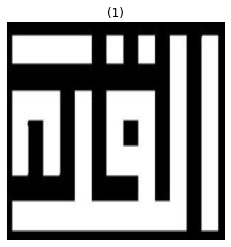

[[[ 4.8400000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  1.5707964e+00]]

 [[ 4.7600000e+02  1.5707964e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  0.0000000e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 3.1000000e+01  1.5707964e+00]]

 [[ 1.2000000e+01  0.0000000e+00]]

 [[ 2.8000000e+01  1.5707964e+00]]

 [[ 1.0000000e+01  0.0000000e+00]]

 [[ 4.0800000e+02  1.5707964e+00]]

 [[ 4.1100000e+02  1.5707964e+00]]

 [[ 1.5500000e+02  0.0000000e+00]]

 [[ 9.3000000e+01  1.5707964e+00]]

 [[ 9.6000000e+01  1.5707964e+00]]

 [[ 1.5800000e+02  1.5707964e+00]]

 [[ 2.2600000e+02  0.0000000e+00]]

 [[ 1.5500000e+02  1.5707964e+00]]

 [[ 1.2000000e+02  0.0000000e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  0.0000000e+00]]

 [[ 3.5300000e+02  1.5707964e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 4.1200000e+02  1.5533431

In [159]:
show_images([X_test[0]])
print("hehhhhh",get_max_vote(X_test[0]))
print("saaaa7",y_test[0])

In [160]:
test_values=[get_max_vote(img) for img in X_test]
print(test_values)
print(y_test.astype("int"))
correct=test_values==y_test
print(y_test[test_values!=y_test])
#print(np.bincount(y_test[test_values!=y_test]).argmax())
print("accuracy=",np.sum(correct)/correct.shape[0])

[[[ 4.8400000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  1.5707964e+00]]

 [[ 4.7600000e+02  1.5707964e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  0.0000000e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 3.1000000e+01  1.5707964e+00]]

 [[ 1.2000000e+01  0.0000000e+00]]

 [[ 2.8000000e+01  1.5707964e+00]]

 [[ 1.0000000e+01  0.0000000e+00]]

 [[ 4.0800000e+02  1.5707964e+00]]

 [[ 4.1100000e+02  1.5707964e+00]]

 [[ 1.5500000e+02  0.0000000e+00]]

 [[ 9.3000000e+01  1.5707964e+00]]

 [[ 9.6000000e+01  1.5707964e+00]]

 [[ 1.5800000e+02  1.5707964e+00]]

 [[ 2.2600000e+02  0.0000000e+00]]

 [[ 1.5500000e+02  1.5707964e+00]]

 [[ 1.2000000e+02  0.0000000e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  0.0000000e+00]]

 [[ 3.5300000e+02  1.5707964e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 4.1200000e+02  1.5533431

 [[-1.6500000e+02  3.1241393e+00]]]
0.1904086344543659
(1, 6)
[230951   1269   1037      0    912  12737      0   1279    990    825]
[4.]
[4.]
[237713    981   1311      0    612   6483      0    994   1284    622]
[4.]
[5 4 4 8 4]
[[[ 457.           0.       ]]

 [[ 176.           0.       ]]

 [[ 152.           0.       ]]

 ...

 [[ -39.           3.0717795]]

 [[-196.           3.106686 ]]

 [[ -99.           3.1241393]]]
0.019470125118421482
(1, 6)
[245723    231    772      0    203   1865      0    224    768    214]
[1.]
[4.]
[247269     49    625      0     17   1349      0     48    626     17]
[1.]
[0 4 7 7 2]
[[[ 3.3700000e+02  0.0000000e+00]]

 [[ 2.2000000e+01  0.0000000e+00]]

 [[ 3.0400000e+02  0.0000000e+00]]

 [[ 2.0000000e+01  0.0000000e+00]]

 [[ 3.5300000e+02  0.0000000e+00]]

 [[ 4.7900000e+02  0.0000000e+00]]

 [[ 3.6000000e+01  0.0000000e+00]]

 [[ 4.2700000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 3.1600000e+02  0.0000000e+00]]

 [[ 4.4200

[[[ 3.0100000e+02  0.0000000e+00]]

 [[ 2.2500000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  5.2359879e-02]]

 ...

 [[-3.0000000e+02  3.1066861e+00]]

 [[-3.7300000e+02  3.1241393e+00]]

 [[-2.7800000e+02  3.1241393e+00]]]
0.046651254270038994
(1, 6)
[233182   1150   1533      0    327  10812      0   1106   1547    343]
[4.]
[3.]
[239751   1022   1072      0    363   5338      0   1030   1063    361]
[4.]
[2 3 0 0 2]
[[[ 3.7800000e+02  1.5533431e+00]]

 [[ 3.7500000e+02  1.5707964e+00]]

 [[-5.4000000e+01  3.0717795e+00]]

 [[ 3.8000000e+02  1.5358897e+00]]

 [[-9.2000000e+01  3.1066861e+00]]

 [[-2.9500000e+02  3.0717795e+00]]

 [[ 3.7100000e+02  1.5707964e+00]]

 [[-2.8800000e+02  3.0717795e+00]]

 [[ 3.7300000e+02  1.5882496e+00]]

 [[-2.8000000e+02  3.0543261e+00]]

 [[-3.0100000e+02  3.0892327e+00]]

 [[-5.8000000e+01  3.0892327e+00]]

 [[ 3.6900000e+02  1.5707964e+00]]

 [[-9.0000000e+01  3.0892327e+00]]

 [[-3.1500000e+02  3.1241393e+00]]

 [[ 3.8100000e+02  1.5184364e+00]]

 [[

[[[ 2.8100000e+02  1.5707964e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[ 3.0400000e+02  1.5707964e+00]]

 [[ 2.5000000e+01  0.0000000e+00]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.2000000e+01  0.0000000e+00]]

 [[ 2.9000000e+01  0.0000000e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 2.6300000e+02  1.5707964e+00]]

 [[ 2.8000000e+02  1.5882496e+00]]

 [[ 2.8800000e+02  1.5533431e+00]]

 [[ 2.4600000e+02  1.5707964e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 2.7800000e+02  1.5882496e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 2.7400000e+02  1.5882496e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 2.8400000e+02  1.5533431e+00]]

 [[ 2.8200000e+02  1.5533431e+00]]

 [[ 2.6800000e+02  1.6057029e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 3.1600000e+02  1.4660766e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 2.8700000e+02  1.5358897e+00]]

 [[ 2.7000000e+02  1.6057029e+00]]

 [[ 3.0600000e+02  1.5533431e+00]]

 [[ 3.0900000e+02  1.4835298

[[[ 4.9000000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  1.5707964e+00]]

 [[ 8.0000000e+00  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 4.7900000e+02  0.0000000e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 2.4200000e+02  0.0000000e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  0.0000000e+00]]

 [[ 4.6900000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[ 2.1300000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  1.5707964e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[ 2.2900000e+02  1.5707964e+00]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 1.9900000e+02  1.5707964e+00]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 4.6300000e+02  0.0000000e+00]]

 [[ 1.0400000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 3.3800000e+02  0.0000000e+00]]

 [[ 4.4000000e+01  1.5707964e+00]]

 [[ 2.9700000e+02  0.0000000

[[[ -78.           3.0892327]]

 [[   5.           3.0717795]]

 [[ -72.           3.106686 ]]

 [[  12.           3.054326 ]]

 [[-262.           3.054326 ]]

 [[  -1.           3.0717795]]

 [[-267.           3.054326 ]]

 [[  -7.           3.0892327]]]
0.15898200404642743
(1, 6)
[244654    426    805      0    121   2642      0    412    829    111]
[1.]
[5.]
[246961    463    359      0    130   1135      0    464    353    135]
[1.]
[5 5 3 3 5]
[[[ 3.9400000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  0.0000000e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 6.1000000e+01  0.0000000e+00]]

 [[ 3.3200000e+02  0.0000000e+00]]

 [[ 3.5500000e+02  0.0000000e+00]]

 [[-3.8100000e+02  3.1241393e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 5.3000000e+01  0.0000000e+00]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[-3.

[[[ 4.6900000e+02  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  0.0000000e+00]]

 [[-3.6400000e+02  3.1241393e+00]]

 [[ 6.2000000e+01  0.0000000e+00]]

 [[ 3.7100000e+02  1.5707964e+00]]

 [[ 9.5000000e+01  0.0000000e+00]]

 [[ 1.0100000e+02  0.0000000e+00]]

 [[-4.5500000e+02  3.1241393e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[-4.6300000e+02  3.1241393e+00]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  1.7453292e-02]]

 [[-3.5000000e+02  3.1066861e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 4.7100000e+02  1.7453292e-02]]

 [[ 2.5000000e+02  4.1887903e-01]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 3.6400000e+02  1.7453292e-02]]

 [[ 2.7900000e+02  0.0000000e+00]]]
0.04127771295215869
(1, 6)
[244152    286    920      0     66   3304      0    264    946     62]
[1.]
[3.]
[246860    438    350      0    133   1298      0    432    354

[[[ 2.4600000e+02  0.0000000e+00]]

 [[ 1.3600000e+02  0.0000000e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[-2.2200000e+02  3.1241393e+00]]

 [[-1.8900000e+02  3.1241393e+00]]

 [[-4.1000000e+02  3.1241393e+00]]

 [[ 1.4200000e+02  0.0000000e+00]]

 [[ 4.1700000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[-3.8400000e+02  3.1066861e+00]]

 [[-3.9300000e+02  3.1241393e+00]]

 [[-3.8700000e+02  3.1241393e+00]]

 [[-4.1700000e+02  3.1241393e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[-2.1100000e+02  3.1066861e+00]]

 [[-1.5300000e+02  3.1066861e+00]]

 [[ 2.2300000e+02  0.0000000e+00]]

 [[-2.3500000e+02  3.1066861e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[-2.3900000e+02  3.1241393e+00]]

 [[-1.3000000e+02  3.1241393e+00]]

 [[ 4.3800000e+02  0.0000000e+00]]

 [[-4.3300000e+02  3.1066861e+00]]

 [[-2.6300000e+02  3.1066861e+00]]

 [[-2.4000000e+02  3.1066861e+00]]

 [[-4.4800000e+02  3.0543261e+00]]

 [[-2.7500000e+02  3.1241393e+00]]

 [[ 2.2600000e+02  0.0000000

[[[ 2.6800000e+02  1.5707964e+00]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 2.9400000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 8.7000000e+01  0.0000000e+00]]

 [[ 2.8400000e+02  1.5707964e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 1.7200000e+02  0.0000000e+00]]

 [[ 2.5000000e+01  0.0000000e+00]]

 [[ 2.9100000e+02  0.0000000e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 2.4600000e+02  1.5707964e+00]]

 [[ 1.7700000e+02  0.0000000e+00]]

 [[ 2.6000000e+02  1.5882496e+00]]

 [[ 2.3000000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  1.5533431e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 2.7300000e+02  1.5707964e+00]]

 [[ 2.5700000e+02  1.5707964e+00]]

 [[ 2.8000000e+01  0.0000000e+00]]

 [[ 2.5500000e+02  1.5882496e+00]]

 [[ 1.0700000e+02  0.0000000e+00]]

 [[ 2.4100000e+02  1.5707964e+00]]

 [[ 2.5200000e+02  1.5707964e+00]]

 [[ 2.8600000e+02  1.5184364e+00]]

 [[ 2.2000000e+01  0.0000000

[[[444.          1.5707964]]

 [[480.          1.5707964]]

 [[411.          1.5707964]]

 [[475.          0.       ]]

 [[ 21.          0.       ]]

 [[ 28.          1.5707964]]

 [[376.          1.5707964]]

 [[440.          0.       ]]

 [[341.          1.5707964]]

 [[406.          0.       ]]

 [[371.          0.       ]]

 [[167.          1.5707964]]

 [[196.          0.       ]]

 [[134.          1.5707964]]

 [[306.          1.5707964]]

 [[338.          0.       ]]

 [[272.          1.5707964]]

 [[ 56.          0.       ]]

 [[ 63.          1.5707964]]

 [[127.          0.       ]]

 [[231.          0.       ]]

 [[160.          0.       ]]

 [[302.          0.       ]]

 [[ 99.          1.5707964]]

 [[ 93.          0.       ]]

 [[267.          0.       ]]

 [[237.          1.5707964]]

 [[202.          1.5707964]]]
0.590302178496135
(1, 6)
[239446     27   3680      0     17   3106      0     23   3672     29]
[8.]
[8.]
[245191     77   1616      0     81   1261      0    

[[[ 3.4000000e+02  1.5707964e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.6200000e+02  0.0000000e+00]]

 [[ 3.1800000e+02  1.5707964e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[-3.5900000e+02  3.1241393e+00]]

 [[ 2.8000000e+01  0.0000000e+00]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 2.6000000e+01  0.0000000e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 2.1100000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[-2.1000000e+01  3.1066861e+00]]

 [[ 2.6600000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  1.5533431e+00]]

 [[ 2.0700000e+02  0.0000000e+00]]

 [[-3.5500000e+02  3.1066861e+00]]

 [[-2.0400000e+02  3.1066861e+00]]

 [[-1.1000000e+01  3.1066861e+00]]

 [[-2.0800000e+02  3.1241393e+00]]

 [[ 3.2400000e+02  1.5358897e+00]]

 [[ 3.3400000e+02  1.5882496e+00]]

 [[ 2.1200000e+02  1.7453292e-02]]

 [[-3.4600000e+02  3.1066861

[[[-2.6500000e+02  3.1066861e+00]]

 [[-2.6900000e+02  3.1066861e+00]]

 [[-4.5400000e+02  3.0892327e+00]]

 [[-3.1500000e+02  3.0892327e+00]]

 [[-3.1100000e+02  3.0717795e+00]]

 [[ 3.6300000e+02  7.8539819e-01]]

 [[-4.5700000e+02  3.1066861e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 3.3300000e+02  0.0000000e+00]]

 [[ 2.3600000e+02  3.4906585e-02]]

 [[-3.2400000e+02  3.1241393e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  3.4906585e-02]]

 [[-3.1900000e+02  3.0892327e+00]]

 [[-2.2600000e+02  3.0717795e+00]]

 [[-3.9000000e+01  3.0717795e+00]]

 [[-4.6200000e+02  3.1066861e+00]]

 [[-2.9400000e+02  3.0717795e+00]]

 [[ 3.5900000e+02  7.8539819e-01]]

 [[ 3.5600000e+02  7.8539819e-01]]

 [[ 3.5400000e+02  7.8539819e-01]]

 [[ 3.6100000e+02  7.8539819e-01]]

 [[ 2.4400000e+02  0.0000000e+00]]

 [[-3.1700000e+02  2.9845130e+00]]

 [[-2.6100000e+02  3.0892327e+00]]

 [[-4.8000000e+01  3.1066861e+00]]

 [[ 4.0000000e+02  7.8539819e-01]]

 [[-2.7400000e+02  3.1241393

[[[ 1.2000000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[-1.9500000e+02  3.1241393e+00]]

 [[ 1.2200000e+02  3.4906585e-02]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[-1.1500000e+02  3.1241393e+00]]

 [[ 4.3400000e+02  0.0000000e+00]]

 [[ 2.0900000e+02  1.7453292e-02]]

 [[ 1.8900000e+02  0.0000000e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 1.1700000e+02  1.7453292e-02]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 4.0200000e+02  0.0000000e+00]]

 [[ 2.0300000e+02  1.7453292e-02]]

 [[ 1.2800000e+02  1.0471976e-01]]

 [[-4.3600000e+02  3.1241393e+00]]

 [[ 3.3900000e+02  1.5707964e+00]]

 [[ 2.1000000e+02  3.4906585e-02]]

 [[-2.9400000e+02  3.1241393e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  8.7266460e-02]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  0.0000000e+00]]

 [[ 3.6700000e+02  2.9670596e-01]]

 [[ 3.8100000e+02  1.0471976e-01]]

 [[-2.0200000e+02  3.1241393e+00]]

 [[-3.0100000e+02  3.0892327

[[[ 1.2300000e+02  0.0000000e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 1.8000000e+01  2.3561945e+00]]

 [[ 1.1000000e+01  2.3561945e+00]]

 [[ 1.6000000e+01  2.3561945e+00]]

 [[ 1.3000000e+01  2.3561945e+00]]

 [[ 4.2800000e+02  1.3089969e+00]]

 [[ 2.1000000e+01  2.3561945e+00]]

 [[ 2.7700000e+02  4.8869219e-01]]

 [[ 1.7200000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  1.5707964e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 3.9700000e+02  1.4137167e+00]]

 [[ 3.9400000e+02  1.4311700e+00]]

 [[ 2.2100000e+02  7.8539819e-01]]

 [[ 4.1600000e+02  1.3439035e+00]]

 [[ 3.9200000e+02  1.5533431e+00]]

 [[ 3.6200000e+02  3.4906585e-02]]

 [[ 2.8600000e+02  7.8539819e-01]]

 [[ 3.5600000e+02  7.8539819e-01]]

 [[ 4.3100000e+02  1.2915436e+00]]

 [[ 4.0200000e+02  1.3962634e+00]]

 [[ 3.5400000e+02  1.5707964e+00]]

 [[ 1.8400000e+02  3.4906585e-02]]

 [[ 4.0700000e+02  1.3788100e+00]]

 [[ 4.1600000e+02  1.4486233e+00]]

 [[ 1.7700000e+02  1.7802358e+00]]

 [[ 2.3000000e+01  2.3561945

[[[ 221.           0.       ]]

 [[ 307.           0.       ]]

 [[ 225.           0.       ]]

 ...

 [[-257.           2.984513 ]]

 [[-392.           3.0717795]]

 [[-290.           3.1241393]]]
0.10891435569941388
(1, 6)
[236574    349    880      0    253  10462      0    202   1082    198]
[4.]
[6.]
[242415    353    530      0    320   5179      0    357    532    314]
[4.]
[6 6 6 6 1]
[[[ 2.7500000e+02  1.5707964e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 8.9000000e+01  0.0000000e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.4000000e+02  1.5707964e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 2.6700000e+02  1.5882496e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 2.6500000e+02  1.6057029

[[[ 1.7100000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 1.9600000e+02  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 1.6700000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 2.5400000e+02  1.5707964e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 8.3000000e+01  0.0000000e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 3.6200000e+02  1.5707964e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 1.8000000e+02  0.0000000e+00]]

 [[ 1.2900000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  0.0000000e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 1.9200000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 3.5200000e+02  0.0000000

[[[ 428.           0.       ]]

 [[ 440.           0.       ]]

 [[ 424.           0.       ]]

 ...

 [[ 195.           1.8849555]]

 [[ 160.           1.9373155]]

 [[-419.           3.1241393]]]
0.07755610972568579
(1, 6)
[243560    125   1136      0     85   3748      0     77   1204     65]
[1.]
[6.]
[246541    183    581      0    127   1677      0    182    581    128]
[1.]
[6 6 6 5 2]
[[[ 3.2700000e+02  1.5707964e+00]]

 [[ 4.2800000e+02  0.0000000e+00]]

 [[ 2.3400000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 2.2500000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 4.3700000e+02  0.0000000e+00]]

 [[ 4.2200000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  1.5533431e+00]]

 [[ 2.6800000e+02  1.5707964e+00]]

 [[ 3.7000000e+01  0.0000000e+00]]

 [[ 3.2400000e+02  1.5882496e+00]]

 [[ 4.5000000e+01  0.0000000

[[[ 326.           1.5707964]]

 [[ 322.           1.5707964]]

 [[ 296.           1.5707964]]

 [[ 287.           1.5707964]]

 [[ 229.           0.       ]]

 [[ 386.           0.       ]]

 [[ 489.           0.       ]]

 [[ 455.           0.       ]]

 [[ 329.           1.553343 ]]

 [[ 318.           1.5882496]]

 [[ 299.           1.553343 ]]

 [[ 301.           1.5358897]]

 [[ 310.           1.6057029]]

 [[ 293.           1.553343 ]]

 [[ 284.           1.5882496]]

 [[ 288.           1.5882496]]

 [[ 280.           1.6057029]]

 [[ 290.           1.5882496]]

 [[ 316.           1.5882496]]

 [[-382.           3.1241393]]

 [[ 205.           0.       ]]

 [[ 483.           0.       ]]

 [[ 320.           1.5882496]]

 [[ 292.           1.6406095]]

 [[ 295.           1.553343 ]]

 [[ 297.           1.553343 ]]

 [[ 380.           0.       ]]

 [[ 275.           1.6057029]]

 [[ 270.           1.6231562]]

 [[ 324.           1.4835298]]

 [[ 298.           1.5358897]]

 [[ 264.

[[[ 51.          0.       ]]

 [[ 15.          0.       ]]

 [[ 85.          0.       ]]

 [[483.          1.5707964]]

 [[477.          0.       ]]

 [[ 19.          1.5707964]]

 [[121.          0.       ]]

 [[447.          1.5707964]]

 [[413.          1.5707964]]

 [[377.          1.5707964]]

 [[157.          0.       ]]

 [[335.          0.       ]]

 [[198.          1.5707964]]

 [[340.          1.5707964]]

 [[369.          0.       ]]

 [[193.          0.       ]]

 [[227.          0.       ]]

 [[234.          1.5707964]]

 [[441.          0.       ]]

 [[ 55.          1.5707964]]

 [[128.          1.5707964]]

 [[162.          1.5707964]]

 [[405.          0.       ]]

 [[306.          1.5707964]]

 [[263.          0.       ]]

 [[299.          0.       ]]

 [[270.          1.5707964]]

 [[ 91.          1.5707964]]]
0.6211579699785561
(1, 6)
[239818     27   3166      0     23   3750      0     19   3174     23]
[8.]
[8.]
[246106     81   1348      0     80    876      0   

[[[ 407.           0.       ]]

 [[ 421.           0.       ]]

 [[  81.           0.       ]]

 ...

 [[-112.           3.106686 ]]

 [[-320.           3.1241393]]

 [[-114.           3.1241393]]]
0.02945795202252667
(1, 6)
[233462    403   1800      0    347  11414      0    411   1870    293]
[4.]
[7.]
[241623    612    714      0    384   4957      0    622    700    388]
[4.]
[7 7 7 7 2]
[[[ 335.           0.       ]]

 [[ 258.           0.       ]]

 [[ 331.           0.       ]]

 ...

 [[-415.           3.0892327]]

 [[ -22.           3.0892327]]

 [[-407.           3.1241393]]]
0.021060749881347887
(1, 6)
[244902    111    816      0    123   2998      0    111    818    121]
[1.]
[7.]
[248208     94    190      0    112   1000      0     88    200    108]
[1.]
[7 7 7 6 2]
[[[-438.           3.1241393]]

 [[-450.           3.1241393]]

 [[-240.           3.106686 ]]

 ...

 [[-136.           3.0368729]]

 [[ -67.           3.0892327]]

 [[ -99.           3.1241393]]]
0.2509332

[[[ 416.           0.       ]]

 [[ 274.           1.5707964]]

 [[ 254.           1.5707964]]

 ...

 [[-369.           3.0194197]]

 [[-331.           3.106686 ]]

 [[-212.           3.1241393]]]
0.04020837919143004
(1, 6)
[242175    242   1191      0     89   4781      0    240   1203     79]
[3.]
[3.]
[246291    424    378      0     84   1937      0    432    370     84]
[1.]
[2 3 0 3 2]
[[[ 40.          1.5707964]]

 [[461.          1.5707964]]

 [[ 29.          0.       ]]

 [[ 77.          1.5707964]]

 [[381.          0.       ]]

 [[410.          0.       ]]

 [[470.          0.       ]]

 [[ 59.          0.       ]]

 [[116.          1.5707964]]

 [[440.          0.       ]]

 [[353.          0.       ]]

 [[422.          1.5707964]]

 [[153.          1.5707964]]

 [[ 88.          0.       ]]

 [[176.          0.       ]]

 [[205.          0.       ]]

 [[265.          0.       ]]

 [[322.          0.       ]]

 [[294.          0.       ]]

 [[235.          0.       ]]

 [[3

[[[ 2.4000000e+01  0.0000000e+00]]

 [[ 2.4500000e+02  1.5707964e+00]]

 [[ 2.6800000e+02  1.5707964e+00]]

 [[ 2.4900000e+02  1.5707964e+00]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 2.7300000e+02  1.5707964e+00]]

 [[ 2.5400000e+02  1.5707964e+00]]

 [[ 2.4000000e+02  1.5707964e+00]]

 [[ 2.8700000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  1.5882496e+00]]

 [[ 2.6400000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  1.5358897e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 2.5200000e+02  1.5533431e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 2.2000000e+02  1.5707964e+00]]

 [[ 2.3700000e+02  1.6231562e+00]]

 [[ 2.7500000e+02  1.5358897e+00]]

 [[ 2.5900000e+02  1.5707964e+00]]

 [[ 2.5800000e+02  0.0000000e+00]]

 [[ 3.1000000e+01  1.7453292e-02]]

 [[ 2.6000000e+02  1.5184364e+00]]

 [[ 2.1600000e+02  1.5707964e+00]]

 [[ 2.6600000e+02  1.5882496e+00]]

 [[ 2.3900000e+02  1.6231562

[[[ 1.4000000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 1.4200000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  5.2359879e-02]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 8.6000000e+01  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.2300000e+02  2.2689280e-01]]

 [[ 1.2400000e+02  2.4434610e-01]]

 [[ 2.4500000e+02  1.5707964e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 1.1900000e+02  2.2689280e-01]]

 [[ 1.4600000e+02  1.7453292e-02]]

 [[ 8.0000000e+01  3.4906585e-02]]

 [[ 1.1800000e+02  2.0943952e-01]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  0.0000000e+00]]

 [[ 2.3100000e+02  1.5707964e+00]]

 [[ 9.2000000e+01  1.7453292e-02]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 8.9000000e+01  1.7453292e-02]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 2.0800000e+02  1.7453292e-02]]

 [[ 3.0500000e+02  1.5707964e+00]]

 [[-3.7000000e+01  2.3561945e+00]]

 [[ 2.3500000e+02  1.7453292

[[[-1.2100000e+02  3.0892327e+00]]

 [[ 1.9300000e+02  3.4906585e-02]]

 [[ 4.7200000e+02  8.7266460e-02]]

 ...

 [[-4.6800000e+02  3.1241393e+00]]

 [[-3.8000000e+02  3.1241393e+00]]

 [[-5.7000000e+01  3.1241393e+00]]]
0.023258300807357107
(1, 6)
[213720   1426   2511      0   1137  25714      0   1509   2773   1210]
[4.]
[5.]
[219923   1608   3343      0   1534  17031      0   1609   3353   1599]
[4.]
[7 5 0 5 0]
[[[ 7.0000000e+01  0.0000000e+00]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[ 2.6300000e+02  1.5707964e+00]]

 [[ 2.3500000e+02  1.5707964e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  1.5707964e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[ 3.0600000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  1.5707964e+00]]

 [[ 3.5500000e+02  0.0000000e+00]]

 [[ 3.5000000e+02  0.0000000e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[

[[[ 3.5800000e+02  1.5707964e+00]]

 [[ 3.8000000e+02  0.0000000e+00]]

 [[ 3.5400000e+02  1.5707964e+00]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  0.0000000e+00]]

 [[ 2.0400000e+02  0.0000000e+00]]

 [[ 4.5100000e+02  0.0000000e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 3.1200000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 3.5000000e+02  1.5882496e+00]]

 [[ 1.6100000e+02  0.0000000e+00]]

 [[ 3.6200000e+02  1.5533431e+00]]

 [[ 2.7600000e+02  1.5707964e+00]]

 [[-4.5200000e+02  3.0368729e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 7.0000000e+00  0.0000000e+00]]

 [[ 3.6000000e+02  1.5533431e+00]]

 [[-4.4600000e+02  3.0194197e+00]]

 [[ 3.5300000e+02  1.5882496e+00]]

 [[ 3.0600000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  5.2359879

[[[ 3.6400000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[-3.5400000e+02  3.1066861e+00]]

 [[-3.5100000e+02  3.1066861e+00]]

 [[-4.1600000e+02  3.1066861e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  1.7453292e-02]]

 [[-4.1500000e+02  3.1241393e+00]]

 [[ 2.7000000e+01  0.0000000e+00]]

 [[ 2.1800000e+02  0.0000000e+00]]

 [[-4.1000000e+02  3.1066861e+00]]

 [[-3.6100000e+02  3.1241393e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 2.9800000e+02  0.0000000e+00]]

 [[-3.6300000e+02  3.1241393e+00]]

 [[-3.5700000e+02  3.1241393e+00]]

 [[ 4.2000000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 4.7800000e+02  3.8397244e-01]]

 [[ 4.7800000e+02  3.4906584e-01]]]
0.11519022883616453
(1, 6)
[242322    580    870      0    130   4518      0    549    908    123]
[3.]
[3.]
[245374    590    548      0    132   2086      0    594    542    134]
[3.]
[5 3 3 3 3]
[[[ 2.9700000e+02  1.5707964e+00]]

 [[ 1.2600

[[[ 4.4600000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.5882496e+00]]

 [[ 1.6000000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 4.6300000e+02  1.7453292e-02]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 3.2300000e+02  1.6057029e+00]]

 [[ 3.4100000e+02  1.5184364e+00]]

 [[ 3.8800000e+02  2.4434610e-01]]

 [[ 3.2600000e+02  1.5533431e+00]]

 [[-4.5700000e+02  3.1241393e+00]]

 [[-4.5000000e+02  3.1241393e+00]]

 [[ 4.5400000e+02  0.0000000e+00]]

 [[ 2.8000000e+02  1.6057029e+00]]

 [[ 4.5400000e+02  2.4434610e-01]]

 [[ 2.9700000e+02  1.5184364e+00]]

 [[ 3.3600000e+02  1.5358897e+00]]

 [[ 3.2900000e+02  1.5882496e+00]]

 [[ 3.1700000e+02  1.6057029e+00]]]
0.07905858954172537
(1, 6)
[242963    299    711      0    230   4557      0    177    851    212]
[3.]
[1.]
[245333    341    521      0    311   2321      0    338    519

[[[ 460.           0.       ]]

 [[ 462.           0.       ]]

 [[-158.           3.1241393]]

 ...

 [[ -96.           3.0892327]]

 [[-336.           3.1241393]]

 [[-276.           3.1241393]]]
0.05807176086840276
(1, 6)
[230891    950    810      0    364  14877      0    894    852    362]
[4.]
[0.]
[237739    699    875      0    309   8493      0    711    869    305]
[4.]
[7 0 0 0 0]
[[[ 3.1200000e+02  1.5707964e+00]]

 [[ 3.1800000e+02  1.5707964e+00]]

 [[ 1.9800000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  1.5533431e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 3.1500000e+02  1.5533431e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 3.4400000e+02  1.5009831e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 3.0100000e+02  1.5707964e+00]]

 [[ 3.4200000e+02  7.8539819e-01]]

 [[ 2.9000000e+02  1.5707964

[[[ 3.5400000e+02  0.0000000e+00]]

 [[ 3.3500000e+02  1.5707964e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 3.2000000e+02  1.5707964e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 4.0400000e+02  0.0000000e+00]]

 [[ 3.2800000e+02  1.5707964e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[ 2.2000000e+01  0.0000000e+00]]

 [[ 4.3800000e+02  0.0000000e+00]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[ 7.9000000e+01  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 4.4600000e+02  1.5707964e-01]]

 [[ 4.5700000e+02  1.9198622e-01]]

 [[ 4.5100000e+02  1.7453292e-01]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.7200000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  1.3962634e-01]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 5.4000000e+01  0.0000000e+00]]

 [[ 4.4800000e+02  1.5707964e-01]]

 [[ 4.5500000e+02  2.7925268e-01]]

 [[ 6.3000000e+01  0.0000000

[[[ 302.           1.5707964]]

 [[ 472.           0.       ]]

 [[ 297.           1.5707964]]

 [[ 477.           0.       ]]

 [[ 368.           0.       ]]

 [[ 303.           1.553343 ]]

 [[-458.           3.0892327]]

 [[ 316.           1.5707964]]

 [[  19.           0.       ]]

 [[  86.           0.       ]]

 [[ 283.           1.5707964]]

 [[ 296.           1.5882496]]

 [[ 314.           1.5358897]]

 [[ 450.           0.7853982]]

 [[ 291.           1.5882496]]

 [[ 286.           1.6057029]]

 [[ 448.           0.7853982]]

 [[ 279.           1.6231562]]

 [[ 301.           1.5009831]]

 [[-369.           3.0892327]]

 [[ 447.           0.7330383]]

 [[-453.           3.0717795]]

 [[  81.           0.       ]]

 [[ 365.           0.       ]]

 [[ 333.           1.4486233]]

 [[ 294.           1.5882496]]

 [[-374.           3.106686 ]]

 [[ 328.           1.4660766]]

 [[ 294.           1.5358897]]

 [[ 293.           1.5707964]]

 [[ 304.           1.5358897]]

 [[-368.

[[[ 339.           0.       ]]

 [[ 341.           0.       ]]

 [[  79.           0.       ]]

 ...

 [[-350.           3.0717795]]

 [[-403.           3.1241393]]

 [[ -89.           3.1241393]]]
0.07452964081662361
(1, 6)
[230824    858   1981      0    495  12502      0    830   2025    485]
[4.]
[6.]
[238704   1038   1012      0    423   6348      0   1046   1006    423]
[4.]
[7 6 7 7 0]
[[[ 2.7500000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 3.2600000e+02  1.5707964e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 2.3500000e+02  0.0000000e+00]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 1.3300000e+02  1.7453292e-01]]

 [[ 6.9000000e+01  0.0000000e+00]]

 [[ 3.5000000e+02  1.5707964e+00]]

 [[ 3.3800000e+02  1.5707964e+00]]

 [[ 3.4400000e+02  1.5707964e+00]]

 [[ 2.6100000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e-01]]

 [[ 3.2000000e+01  0.0000000

[[[332.          1.5707964]]

 [[354.          1.5707964]]

 [[358.          1.5707964]]

 [[329.          1.5707964]]

 [[294.          1.5707964]]

 [[363.          1.553343 ]]

 [[337.          1.553343 ]]

 [[364.          1.5358897]]

 [[182.          0.       ]]

 [[268.          1.5707964]]

 [[324.          1.5882496]]

 [[190.          0.       ]]

 [[359.          1.553343 ]]

 [[334.          1.553343 ]]

 [[339.          1.5358897]]

 [[342.          1.5358897]]

 [[291.          1.5707964]]

 [[341.          1.5184364]]

 [[327.          1.5882496]]

 [[368.          1.5358897]]

 [[203.          0.       ]]

 [[366.          1.43117  ]]

 [[200.          0.       ]]

 [[365.          1.4486233]]

 [[349.          1.5882496]]

 [[344.          1.5184364]]

 [[353.          1.5882496]]

 [[361.          1.5358897]]

 [[364.          1.4835298]]

 [[299.          1.553343 ]]

 [[339.          1.6057029]]

 [[366.          1.4835298]]

 [[364.          1.43117  ]]

 [[347.   

[[[ 2.7100000e+02  1.5707964e+00]]

 [[ 2.7600000e+02  1.5707964e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 1.6700000e+02  0.0000000e+00]]

 [[ 2.7200000e+02  1.5533431e+00]]

 [[ 2.6500000e+02  1.5882496e+00]]

 [[-1.7400000e+02  3.0892327e+00]]

 [[ 2.6600000e+02  1.5707964e+00]]

 [[ 2.6000000e+02  1.6057029e+00]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[-1.7100000e+02  3.0892327e+00]]

 [[ 1.8500000e+02  3.8397244e-01]]

 [[ 1.9000000e+02  4.0142572e-01]]

 [[ 2.7700000e+02  1.5533431e+00]]

 [[ 1.6500000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  1.5009831e+00]]

 [[ 2.3800000e+02  1.6755161e+00]]

 [[ 2.2100000e+02  1.6929693e+00]]

 [[ 2.7700000e+02  1.4835298e+00]]

 [[ 2.7500000e+02  1.5009831e+00]]

 [[-2.3200000e+02  3.0717795e+00]]

 [[ 2.7000000e+02  1.5184364e+00]]

 [[ 2.3600000e+02  1.6580628e+00]]

 [[ 1.9500000e+02  5.4105204e-01]]

 [[ 2.6900000e+02  1.5882496e+00]]

 [[ 2.5300000e+02  1.6231562e+00]]

 [[ 2.5500000e+02  1.6231562e+00]]

 [[ 2.2600000e+02  1.6929693

[[[ 2.4100000e+02  1.5707964e+00]]

 [[-9.7000000e+01  3.1241393e+00]]

 [[ 4.3000000e+01  0.0000000e+00]]

 [[ 2.4600000e+02  1.5707964e+00]]

 [[-9.1000000e+01  3.1066861e+00]]

 [[-3.0000000e+01  3.0892327e+00]]

 [[-9.3000000e+01  3.1241393e+00]]

 [[ 9.7000000e+01  0.0000000e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[-1.3000000e+02  3.1241393e+00]]

 [[-4.0000000e+01  3.1241393e+00]]

 [[-1.2700000e+02  3.1066861e+00]]

 [[ 1.8000000e+02  0.0000000e+00]]

 [[-1.2400000e+02  3.1066861e+00]]

 [[ 3.1000000e+02  0.0000000e+00]]

 [[-4.4200000e+02  3.1066861e+00]]

 [[ 1.0300000e+02  1.7453292e-02]]

 [[ 9.5000000e+01  0.0000000e+00]]

 [[ 1.3200000e+02  0.0000000e+00]]

 [[ 1.0000000e+02  0.0000000e+00]]

 [[-8.8000000e+01  3.0892327e+00]]

 [[-3.6000000e+01  3.1066861e+00]]

 [[ 4.5100000e+02  0.0000000e+00]]

 [[-4.3700000e+02  3.1241393e+00]]

 [[ 2.3700000e+02  1.5882496e+00]]

 [[ 2.4000000e+02  1.5882496e+00]]

 [[ 3.1400000e+02  0.0000000e+00]]

 [[ 2.7100000e+02  1.5707964

[[[  81.           0.       ]]

 [[ 441.           0.       ]]

 [[ 433.           0.       ]]

 [[-380.           3.106686 ]]

 [[ 463.           0.       ]]

 [[-214.           3.106686 ]]

 [[ 276.           0.       ]]

 [[-448.           3.106686 ]]

 [[-297.           3.0717795]]

 [[  -5.           3.106686 ]]

 [[   4.           3.106686 ]]

 [[ 326.           0.       ]]

 [[ 296.           0.       ]]

 [[ 324.           0.       ]]

 [[-290.           3.0368729]]

 [[-234.           3.0892327]]

 [[ 282.           0.       ]]

 [[-371.           3.106686 ]]

 [[-272.           3.1241393]]

 [[-242.           3.1241393]]

 [[-295.           3.054326 ]]

 [[-243.           3.0892327]]

 [[   3.           0.       ]]

 [[ 160.           0.       ]]

 [[-282.           3.0368729]]

 [[-247.           3.106686 ]]

 [[-227.           3.1241393]]

 [[-317.           3.106686 ]]

 [[-461.           3.1241393]]

 [[  -1.           3.0892327]]

 [[-457.           3.106686 ]]

 [[ 230.

0.17572564713033786
(1, 6)
[227147   1529    972      0    777  16317      0   1470   1044    744]
[4.]
[4.]
[235531   1115   1375      0    610   8271      0   1121   1375    602]
[4.]
[5 4 4 4 4]
[[[ 4.7700000e+02  0.0000000e+00]]

 [[ 2.1000000e+01  1.5707964e+00]]

 [[ 4.8000000e+02  1.5707964e+00]]

 [[ 2.4000000e+01  0.0000000e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 2.9300000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 5.3000000e+01  0.0000000e+00]]

 [[ 3.9000000e+02  1.5707964e+00]]

 [[ 4.1900000e+02  1.5707964e+00]]

 [[ 4.4500000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 4.5100000e+02  1.5707964e+00]]

 [[ 3.2500000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 1.1100000e+02  1.5707964e+00]]

 [[ 8.2000000e+01  1.5707964e+00]]

 [[ 5.0000000e+01  1.5707964e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 3.8500

[[[  45.           0.       ]]

 [[ 356.           0.       ]]

 [[ 266.           0.       ]]

 ...

 [[-163.           3.106686 ]]

 [[-103.           3.1241393]]

 [[  -4.           3.1241393]]]
0.036709310589907604
(1, 6)
[227848    846   2397      0    755  13978      0    839   2505    832]
[4.]
[8.]
[236170    965   1600      0    787   7119      0    962   1603    794]
[4.]
[7 8 7 7 2]
[[[  43.           0.       ]]

 [[ 201.           0.       ]]

 [[ 204.           0.       ]]

 ...

 [[   3.           3.106686 ]]

 [[-268.           3.1241393]]

 [[   0.           3.1241393]]]
0.06852334937722747
(1, 6)
[235210    654   1046      0    348  10712      0    646   1032    352]
[4.]
[3.]
[240850    555    789      0    293   5882      0    552    779    300]
[4.]
[1 3 0 0 2]
[[[ 497.           0.       ]]

 [[  89.           0.       ]]

 [[ 160.           0.       ]]

 ...

 [[-396.           3.0194197]]

 [[  -6.           3.0194197]]

 [[-392.           3.0717795]]]
0.0935943

[[[ 134.           0.       ]]

 [[  33.           0.       ]]

 [[  30.           0.       ]]

 ...

 [[ -57.           3.106686 ]]

 [[-161.           3.1241393]]

 [[-115.           3.1241393]]]
0.03144339563668188
(1, 6)
[237409    301   1636      0    193   8269      0    304   1698    190]
[4.]
[7.]
[243481    546    626      0    309   3555      0    548    610    325]
[4.]
[7 7 2 1 2]
[[[ 4.8300000e+02  0.0000000e+00]]

 [[ 1.2000000e+01  0.0000000e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[ 4.7700000e+02  1.5707964e+00]]

 [[ 1.8000000e+01  1.5707964e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 3.3500000e+02  1.5707964e+00]]

 [[ 2.0900000e+02  0.0000000e+00]]

 [[ 1.5600000e+02  1.5707964e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 3.4000000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 1.2000000e+02  0.0000000e+00]]

 [[ 3.2100000e+02  0.0000000e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 1.0100000e+02  0.0000000

(1, 6)
[225789   1100   3125      0   1023  13715      0   1029   3227    992]
[4.]
[6.]
[231724   1794   2054      0   1755   7070      0   1800   2088   1715]
[4.]
[4 6 0 6 8]
[[[ 119.           0.       ]]

 [[-117.           3.1241393]]

 [[ 122.           0.       ]]

 ...

 [[-466.           3.1241393]]

 [[-134.           3.1241393]]

 [[ -76.           3.1241393]]]
0.05668618158163739
(1, 6)
[235591    658    785      0    337  10897      0    623    799    310]
[4.]
[3.]
[241316    539    692      0    263   5699      0    545    681    265]
[4.]
[1 3 0 0 2]
[[[ 4.9500000e+02  0.0000000e+00]]

 [[ 8.9000000e+01  0.0000000e+00]]

 [[ 8.3000000e+01  0.0000000e+00]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 4.7900000e+02  1.5707964e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  0.0000000e+00]]

 [[ 4.8800000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  0.0000000e+

[[[ 4.5700000e+02  1.5707964e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[ 4.2900000e+02  1.5707964e+00]]

 [[ 1.7000000e+01  0.0000000e+00]]

 [[ 7.6000000e+01  1.5707964e+00]]

 [[ 4.5300000e+02  0.0000000e+00]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 2.3000000e+01  1.5707964e+00]]

 [[ 5.1000000e+01  1.5707964e+00]]

 [[ 4.0500000e+02  1.5707964e+00]]

 [[ 5.2000000e+01  0.0000000e+00]]

 [[ 4.3700000e+02  0.0000000e+00]]

 [[ 1.0000000e+02  1.5707964e+00]]

 [[ 4.1800000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  1.5707964e+00]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 3.5600000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 4.0200000e+02  0.0000000e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 3.5200000e+02  0.0000000e+00]]

 [[ 3.3500000e+02  0.0000000e+00]]

 [[ 3.2800000e+02  1.5707964e+00]]

 [[ 6.8000000e+01  0.0000000e+00]]

 [[ 1.2500000e+02  1.5707964e+00]]

 [[ 2.5400000e+02  1.5707964e+00]]

 [[ 1.1900000e+02  0.0000000

[[[ 4.0600000e+02  0.0000000e+00]]

 [[ 3.9900000e+02  0.0000000e+00]]

 [[ 4.3000000e+02  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  1.5707964e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  1.5707964e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 4.8600000e+02  0.0000000e+00]]

 [[-3.9100000e+02  3.1066861e+00]]

 [[-4.0000000e+02  3.1241393e+00]]

 [[ 2.4000000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  0.0000000e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  0.0000000e+00]]

 [[-3.1000000e+01  3.1241393e+00]]

 [[-4.2900000e+02  3.1241393e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  1.5707964e+00]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[ 4.0300000e+02  1.7453292e-02]]

 [[ 3.6400000e+02  1.5707964e+00]]

 [[-1.4200000e+02  3.1241393e+00]]

 [[ 3.2000000e+01  0.0000000e+00]]

 [[ 1.5200000e+02  1.7453292e-02]]

 [[ 3.7000000e+01  1.7453292e-02]]

 [[-2.7000000e+01  3.1241393e+00]]

 [[ 3.4000000e+02  1.5707964

[[[ 284.           0.       ]]

 [[ 354.           0.       ]]

 [[ 107.           0.       ]]

 ...

 [[-113.           3.0892327]]

 [[ -46.           3.0892327]]

 [[  -3.           3.106686 ]]]
0.05599567879006122
(1, 6)
[231632    563    974      0    409  14474      0    589    986    373]
[4.]
[3.]
[239122    513    728      0    368   7661      0    514    719    375]
[4.]
[0 3 0 2 2]
[[[ 2.7100000e+02  5.2359879e-02]]

 [[ 2.6800000e+02  1.7453292e-02]]

 [[ 2.6500000e+02  1.7453292e-02]]

 [[ 1.8800000e+02  1.7453292e-02]]

 [[ 2.6000000e+02  0.0000000e+00]]

 [[ 2.2300000e+02  1.7453292e-02]]

 [[ 2.2800000e+02  3.4906585e-02]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 1.9200000e+02  3.4906585e-02]]

 [[ 2.1900000e+02  0.0000000e+00]]

 [[ 1.8600000e+02  1.7453292e-02]]

 [[ 2.3900000e+02  3.4906585e-02]]

 [[ 2.7600000e+02  6.9813170e-02]]

 [[ 2.3500000e+02  1.7453292e-02]]

 [[ 2.5300000e+02  3.4906585e-02]]

 [[ 2.5000000e+02  1.7453292e-02]]

 [[ 2.2600000e+02  1.7453292

[[[ 4.1200000e+02  0.0000000e+00]]

 [[ 4.6000000e+01  1.7453292e-02]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 4.3000000e+02  5.2359879e-02]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 1.4600000e+02  3.4906585e-02]]

 [[ 4.2500000e+02  3.4906585e-02]]

 [[ 2.5000000e+02  4.3633232e-01]]

 [[ 3.9500000e+02  7.8539819e-01]]

 [[ 1.3400000e+02  3.3161256e-01]]

 [[ 4.4200000e+02  1.0471976e-01]]

 [[ 2.5700000e+02  4.5378560e-01]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  2.2689280e-01]]

 [[ 1.2900000e+02  3.3161256e-01]]

 [[ 4.4000000e+01  0.0000000e+00]]

 [[ 7.1000000e+01  0.0000000e+00]]

 [[ 4.3300000e+02  6.9813170e-02]]

 [[ 3.9000000e+02  7.8539819e-01]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 1.3200000e+02  3.1415927e-01]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  1.2217305e-01]]

 [[ 2.0700000e+02  1.7453292e-02]]

 [[ 1.5100000e+02  5.2359879e-02]]

 [[ 1.5400000e+02  5.2359879e-02]]

 [[ 1.2800000e+02  2.9670596

[[[ 22.          1.5707964]]

 [[338.          0.       ]]

 [[476.          0.       ]]

 [[ 27.          0.       ]]

 [[234.          0.       ]]

 [[470.          1.5707964]]

 [[ 64.          1.5707964]]

 [[227.          1.5707964]]

 [[390.          1.5707964]]

 [[129.          0.       ]]

 [[267.          1.5707964]]

 [[305.          0.       ]]

 [[185.          1.5707964]]

 [[372.          0.       ]]

 [[268.          0.       ]]

 [[430.          1.5707964]]

 [[145.          1.5707964]]

 [[348.          1.5707964]]

 [[442.          0.       ]]

 [[ 61.          0.       ]]

 [[104.          1.5707964]]

 [[ 95.          0.       ]]]
0.6806661839246922
(1, 6)
[241340     27   2796      0     29   2956      0     27   2798     27]
[8.]
[8.]
[246219     97   1119      0     89   1171      0     97   1117     91]
[8.]
[8 8 8 8 8]
[[[ 2.8200000e+02  0.0000000e+00]]

 [[-2.7900000e+02  3.1241393e+00]]

 [[-2.8200000e+02  3.1066861e+00]]

 [[ 2.9600000e+02  3.4906585e-02]]


[[[ 3.3700000e+02  1.5707964e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  0.0000000e+00]]

 [[ 3.7800000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  0.0000000e+00]]

 [[ 1.4900000e+02  0.0000000e+00]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  1.5707964e+00]]

 [[ 3.0300000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  1.5358897e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  1.5882496e+00]]

 [[ 3.2900000e+02  1.5882496e+00]]

 [[-3.4000000e+02  3.1066861e+00]]

 [[-1.5000000e+02  3.1241393e+00]]

 [[ 3.3300000e+02  1.5533431e+00]]

 [[ 3.4500000e+02  0.0000000e+00]]

 [[ 3.5000000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  1.5533431e+00]]

 [[ 3.2200000e+02  1.6057029e+00]]

 [[ 1.5500000e+02  0.0000000e+00]]

 [[ 3.3600000e+02  1.5533431e+00]]

 [[ 3.4100000e+02  1.5533431

[[[ 3.8100000e+02  1.5707964e+00]]

 [[ 3.1200000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  1.5707964e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 4.3200000e+02  0.0000000e+00]]

 [[ 4.2900000e+02  0.0000000e+00]]

 [[ 9.4000000e+01  1.7453292e-01]]

 [[-4.2600000e+02  3.1241393e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  1.5707964e+00]]

 [[ 4.8800000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  1.5882496e+00]]

 [[ 2.8700000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  1.5533431e+00]]

 [[ 3.3500000e+02  1.5882496e+00]]

 [[ 3.4300000e+02  1.5533431e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.1600000e+02  1.7453292e-02]]

 [[-4.1800000e+02  3.1241393e+00]]

 [[-3.8000000e+01  2.9670596e+00]]

 [[-4.1700000e+02  3.1066861

[[[ 4.1400000e+02  0.0000000e+00]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[-4.0200000e+02  3.1066861e+00]]

 [[-4.0400000e+02  3.0892327e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[-3.9800000e+02  3.0892327e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 3.5600000e+02  7.8539819e-01]]

 [[-9.8000000e+01  3.0892327e+00]]

 [[-4.0700000e+02  3.1066861e+00]]

 [[-3.5300000e+02  3.1066861e+00]]

 [[-3.4900000e+02  3.0892327e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[-3.4300000e+02  3.0892327e+00]]

 [[ 2.8700000e+02  1.5707964e+00]]

 [[-1.0800000e+02  3.1066861e+00]]

 [[-1.1300000e+02  3.1241393e+00]]

 [[ 1.1800000e+02  0.0000000e+00]]

 [[ 1.1400000e+02  0.0000000e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 8.2000000e+01  1.5707964e-01]]

 [[ 1.3900000e+02  3.3161256e-01]]

 [[-1.6000000e+01  2.3561945e+00]]

 [[-3.9900000e+02  3.0717795e+00]]

 [[-3.9300000e+02  3.0717795e+00]]

 [[-3.4700000e+02  3.1066861

[[[ 429.           0.       ]]

 [[ 417.           0.       ]]

 [[ 419.           0.       ]]

 ...

 [[ -30.           3.106686 ]]

 [[-132.           3.1241393]]

 [[ -53.           3.1241393]]]
0.030855060913127633
(1, 6)
[232507    910   1844      0    570  10845      0    885   1901    538]
[4.]
[6.]
[239243    969   1099      0    448   5725      0    965   1093    458]
[4.]
[7 6 7 7 0]
[[[ 195.           0.       ]]

 [[ 320.           1.5707964]]

 [[ 123.           0.       ]]

 [[  84.           0.       ]]

 [[ 422.           0.       ]]

 [[ 200.           0.       ]]

 [[ 315.           1.5707964]]

 [[ 299.           1.5707964]]

 [[ 325.           1.5707964]]

 [[  87.           0.       ]]

 [[ 419.           0.       ]]

 [[-181.           3.0892327]]

 [[ 304.           1.5707964]]

 [[ 383.           0.       ]]

 [[ 318.           1.5882496]]

 [[ 294.           1.5707964]]

 [[ 440.           0.       ]]

 [[ 310.           1.5707964]]

 [[  12.           0.      

[[[ 106.           0.       ]]

 [[ 279.           0.       ]]

 [[ 301.           0.       ]]

 ...

 [[-260.           3.1241393]]

 [[-205.           3.1241393]]

 [[-203.           3.1241393]]]
0.02244869468099958
(1, 6)
[237328    636   2107      0    551   6084      0    653   2102    539]
[8.]
[5.]
[241613    226   1699      0     91   4355      0    231   1696     89]
[4.]
[0 5 7 7 7]
[[[ 330.           0.       ]]

 [[ 125.           0.       ]]

 [[ 307.           0.       ]]

 ...

 [[-168.           3.1241393]]

 [[-142.           3.1241393]]

 [[-110.           3.1241393]]]
0.02022438736344848
(1, 6)
[234302    478   2097      0    335   9858      0    463   2131    336]
[4.]
[7.]
[241790    744    873      0    389   4201      0    747    859    397]
[4.]
[7 7 7 7 2]
[[[-4.4000000e+02  3.1241393e+00]]

 [[-4.8000000e+01  3.1066861e+00]]

 [[-2.6100000e+02  3.1066861e+00]]

 [[-1.3200000e+02  3.0892327e+00]]

 [[-2.3400000e+02  3.0892327e+00]]

 [[-2.3700000e+02  3.1066861

[[[ 490.           0.       ]]

 [[ 492.           0.       ]]

 [[  99.           0.       ]]

 ...

 [[-130.           3.0892327]]

 [[-483.           3.106686 ]]

 [[ -98.           3.106686 ]]]
0.057337742868954114
(1, 6)
[232831    662   2039      0    401  10969      0    641   2091    366]
[4.]
[2.]
[240102    950    909      0    392   5400      0    960    891    396]
[4.]
[7 2 7 7 7]
[[[ 295.           1.5707964]]

 [[ 291.           1.5707964]]

 [[ 304.           1.4660766]]

 ...

 [[ 153.           1.8325957]]

 [[  54.           2.3561945]]

 [[-228.           3.054326 ]]]
0.05539088551315302
(1, 6)
[239765    706   1125      0    297   5989      0    649   1200    269]
[3.]
[6.]
[243769    649    715      0    230   3046      0    649    710    232]
[3.]
[0 6 0 1 2]
[[[   2.           0.       ]]

 [[ 160.           0.       ]]

 [[ 318.           0.       ]]

 ...

 [[-424.           3.1241393]]

 [[-222.           3.1241393]]

 [[ -66.           3.1241393]]]
0.0203291

[[[ 184.           0.       ]]

 [[-190.           3.106686 ]]

 [[ 191.           0.       ]]

 [[ 198.           0.       ]]

 [[-172.           3.0892327]]

 [[-177.           3.106686 ]]

 [[ 455.           0.       ]]

 [[-187.           3.0892327]]

 [[-451.           3.0717795]]

 [[ -62.           3.0717795]]

 [[-194.           3.1241393]]

 [[  72.           0.       ]]

 [[-180.           3.0717795]]

 [[-181.           3.1241393]]

 [[-440.           3.0892327]]

 [[-185.           3.0892327]]]
0.06575310916628282
(1, 6)
[245024    276    725      0     93   2788      0    245    759     90]
[1.]
[2.]
[247127    342    344      0    120   1261      0    344    340    122]
[1.]
[3 2 7 3 2]
[[[ 3.3400000e+02  1.5707964e+00]]

 [[ 3.4000000e+02  1.5707964e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 1.5600000e+02  0.0000000e+00]]

 [[ 2.3000000e+02  0.0000000e+00]]

 [[ 1.6100000e+02  0.0000000e+00]]

 [[ 2.6800000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [

[[[2.5000000e+02 0.0000000e+00]]

 [[1.9500000e+02 3.4906584e-01]]

 [[2.0200000e+02 4.7123888e-01]]

 [[3.5000000e+02 1.5707964e+00]]

 [[1.9700000e+02 3.6651915e-01]]

 [[1.2200000e+02 0.0000000e+00]]

 [[1.9300000e+02 4.5378560e-01]]

 [[1.2700000e+02 0.0000000e+00]]

 [[1.8800000e+02 3.3161256e-01]]

 [[2.0000000e+02 3.6651915e-01]]

 [[1.9300000e+02 3.1415927e-01]]

 [[4.5600000e+02 4.3633232e-01]]

 [[4.2500000e+02 0.0000000e+00]]

 [[1.9500000e+02 4.3633232e-01]]

 [[3.4600000e+02 1.5707964e+00]]

 [[2.8200000e+02 1.5707964e-01]]

 [[1.9100000e+02 3.4906584e-01]]

 [[1.9500000e+02 3.8397244e-01]]

 [[1.9500000e+02 4.7123888e-01]]

 [[4.1900000e+02 0.0000000e+00]]

 [[2.0100000e+02 4.1887903e-01]]

 [[3.7500000e+02 1.5707964e+00]]

 [[2.4200000e+02 0.0000000e+00]]

 [[1.9300000e+02 3.6651915e-01]]

 [[4.5800000e+02 3.8397244e-01]]

 [[2.0300000e+02 5.0614548e-01]]

 [[1.9300000e+02 4.1887903e-01]]

 [[1.8400000e+02 2.9670596e-01]]

 [[4.5100000e+02 3.6651915e-01]]

 [[4.5700000e+

[[[ 345.           1.5707964]]

 [[  12.           0.       ]]

 [[-324.           3.1241393]]

 ...

 [[-129.           3.054326 ]]

 [[-436.           3.0717795]]

 [[ -21.           3.106686 ]]]
0.030621408045977013
(1, 6)
[236022    578   2389      0    397   7250      0    540   2389    435]
[8.]
[2.]
[242319    830    926      0    438   3293      0    828    912    454]
[4.]
[7 2 7 7 0]
[[[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[-4.2900000e+02  3.1066861e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 3.9200000e+02  0.0000000e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  1.5707964e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[-3.6900000e+02  3.0892327e+00]]

 [[-3.7200000e+02  3.1066861e+00]]

 [[-3.8100000e+02  3.1241393e+00]]

 [[ 3.9000000e+02  1.7453292e-02]]

 [[-4.2000000e+02  3.0892327e+00]]

 [[-4.3300000e+02  3.1241393e+00]]

 [[-3.7800000e+02  3.106686

[[[ 1.1300000e+02  0.0000000e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 2.4100000e+02  1.2217305e-01]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[-1.0800000e+02  3.1241393e+00]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[-1.2300000e+02  3.1241393e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  0.0000000e+00]]

 [[ 2.0300000e+02  1.7453292e-02]]

 [[-1.7000000e+02  3.1241393e+00]]

 [[ 2.6300000e+02  2.0943952e-01]]

 [[ 2.0600000e+02  1.7453292e-02]]

 [[ 1.8600000e+02  1.5707964e-01]]

 [[ 1.0100000e+02  1.7453292e-02]]

 [[ 1.8000000e+02  1.2217305e-01]]

 [[ 2.4800000e+02  1.5707964e-01]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 2.0900000e+02  3.4906585e-02]]

 [[ 2.5300000e+02  1.7453292e-01]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 1.7900000e+02  1.0471976e-01]]

 [[ 1.8900000e+02  1.7453292e-01]]

 [[ 3.7200000e+02  1.7453292e-02]]

 [[ 2.5900000e+02  1.9198622e-01]]

 [[ 1.9600000e+02  1.9198622e-01]]

 [[ 2.6900000e+02  2.2689280

[[[ 179.           0.       ]]

 [[ -80.           3.106686 ]]

 [[ 143.           0.       ]]

 ...

 [[-109.           3.0717795]]

 [[-181.           3.0892327]]

 [[-244.           3.106686 ]]]
0.48430946859426655
(1, 6)
[223955    925   2797      0    896  16809      0    908   2833    877]
[4.]
[4.]
[235049   1060   1553      0    906   7913      0   1071   1537    911]
[4.]
[4 4 4 7 4]
[[[ 2.9700000e+02  1.5707964e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  1.5533431e+00]]

 [[ 1.4000000e+02  0.0000000e+00]]

 [[ 3.9300000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  1.5358897e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 3.0500000e+02  1.5358897e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  1.5882496e+00]]

 [[ 2.8300000e+02  1.6057029

[[[344.          1.5707964]]

 [[340.          1.5707964]]

 [[313.          1.5707964]]

 [[319.          1.5707964]]

 [[336.          1.5882496]]

 [[272.          1.5707964]]

 [[268.          1.5707964]]

 [[309.          1.5707964]]

 [[345.          1.553343 ]]

 [[342.          1.553343 ]]

 [[347.          1.553343 ]]

 [[350.          1.5358897]]

 [[ 15.          0.       ]]

 [[298.          1.5707964]]

 [[ 21.          0.       ]]

 [[321.          1.553343 ]]

 [[318.          1.553343 ]]

 [[305.          1.5882496]]

 [[308.          1.5882496]]

 [[312.          1.5882496]]]
0.14231968182306784
(1, 6)
[245445    143    965      0    148   2043      0    140    963    153]
[1.]
[3.]
[247473    200    405      0    229    859      0    195    413    226]
[1.]
[5 3 6 6 4]
[[[ 4.7600000e+02  0.0000000e+00]]

 [[ 4.6700000e+02  1.5707964e+00]]

 [[ 1.2000000e+01  0.0000000e+00]]

 [[ 3.3000000e+01  0.0000000e+00]]

 [[ 4.5500000e+02  0.0000000e+00]]

 [[ 1.9400000e+02  0.0

[[[-158.           3.106686 ]]

 [[-161.           3.106686 ]]

 [[-299.           3.1241393]]

 ...

 [[-127.           3.0368729]]

 [[-116.           3.054326 ]]

 [[-112.           3.106686 ]]]
0.08452950558213716
(1, 6)
[238325    587   1684      0    361   6411      0    578   1676    378]
[8.]
[6.]
[243293    666    778      0    331   3157      0    663    790    322]
[4.]
[7 6 7 2 2]
[[[ 1.6100000e+02  0.0000000e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[ 2.4600000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  1.2217305e-01]]

 [[ 2.8000000e+01  0.0000000e+00]]

 [[-1.2600000e+02  3.1241393e+00]]

 [[ 3.7100000e+02  1.2217305e-01]]

 [[-4.3300000e+02  3.1241393e+00]]

 [[ 8.5000000e+01  0.0000000e+00]]

 [[-1.3200000e+02  3.1241393e+00]]

 [[-2.1500000e+02  3.1241393e+00]]

 [[ 3.2800000e+02  0.0000000e+00]]

 [[ 4.2500000e+02  1.7453292e-02]]

 [[ 4.3200000e+02  0.0000000e+00]]

 [[-2.6300000e+02  3.1241393e+00]]

 [[ 1.7000000e+02  1.7453292

[[[324.          1.5707964]]

 [[320.          1.5707964]]

 [[322.          1.5707964]]

 [[318.          1.5882496]]

 [[327.          1.553343 ]]

 [[308.          1.6057029]]

 [[330.          1.5358897]]

 [[310.          1.6057029]]

 [[312.          1.6057029]]

 [[332.          1.5358897]]

 [[334.          1.5358897]]

 [[333.          1.5184364]]

 [[264.          1.5707964]]

 [[301.          1.6231562]]

 [[297.          1.6406095]]

 [[304.          1.6231562]]]
0.026413345690454126
(1, 6)
[245454    571    722      0    205   1550      0    579    698    221]
[1.]
[3.]
[247202    380    443      0    164    824      0    378    439    170]
[1.]
[3 3 1 0 4]
[[[ 2.9600000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[ 4.3000000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  1.5882496e+00]]

 [[ 2.9800000e+02  1.5533431e+00]]

 [[ 4.3600000e+02  0.0000000e+00]]

 [[ 4.5400000e+02  0.0000000e+00]

[[[ 3.1000000e+01  0.0000000e+00]]

 [[ 3.5800000e+02  0.0000000e+00]]

 [[ 3.6400000e+02  3.4906585e-02]]

 [[-2.7000000e+01  3.1241393e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[-3.5700000e+02  3.1241393e+00]]

 [[-3.0900000e+02  3.1241393e+00]]

 [[-3.5300000e+02  3.1241393e+00]]

 [[-3.1300000e+02  3.1241393e+00]]

 [[ 3.1400000e+02  0.0000000e+00]]

 [[-1.5800000e+02  3.1241393e+00]]

 [[-2.4000000e+01  3.1066861e+00]]

 [[-1.4500000e+02  3.1066861e+00]]

 [[-3.0600000e+02  3.1066861e+00]]

 [[-4.5700000e+02  3.1241393e+00]]

 [[ 4.6200000e+02  0.0000000e+00]]

 [[ 3.3000000e+01  0.0000000e+00]]

 [[-5.8000000e+01  3.0892327e+00]]

 [[-6.0000000e+01  3.1066861e+00]]

 [[-6.6000000e+01  3.1241393e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 3.5700000e+02  1.7453292e-02]]

 [[ 1.6600000e+02  3.4906585e-02]]

 [[-3.0000000e+01  3.1241393e+00]]

 [[-4.6000000e+02  3.1241393e+00]]

 [[-1.4700000e+02  3.1241393e+00]]

 [[ 4.6500000e+02  0.0000000

[231282   1784   2216      0   1354   8010      0   1774   2220   1360]
[4.]
[4 8 3 4 4]
[[[ 2.4400000e+02  0.0000000e+00]]

 [[ 2.3400000e+02  0.0000000e+00]]

 [[ 4.8300000e+02  1.5707964e+00]]

 [[ 5.0000000e+00  0.0000000e+00]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 4.9100000e+02  0.0000000e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 9.0000000e+01  0.0000000e+00]]

 [[ 2.3000000e+01  1.5707964e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 5.1000000e+01  1.5707964e+00]]

 [[ 2.9200000e+02  0.0000000e+00]]

 [[ 4.5500000e+02  1.5707964e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 1.7600000e+02  1.5707964e+00]]

 [[ 8.2000000e+01  0.0000000e+00]]

 [[ 4.6300000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 8.4000000e+01  1.5707964e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 3.9400000e+02  1.5707964e+00]]

 [[ 3.5700000e+02  0.0000000e+00]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 1.50000

[[[ 2.7000000e+02  0.0000000e+00]]

 [[ 3.9000000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  2.0943952e-01]]

 ...

 [[-3.5000000e+02  2.9496064e+00]]

 [[-3.6000000e+02  2.9670596e+00]]

 [[-2.3700000e+02  3.0368729e+00]]]
0.04467235154029346
(1, 6)
[238802    772   1820      0    164   5686      0    783   1776    197]
[8.]
[6.]
[243941    870    760      0    180   2439      0    873    760    177]
[3.]
[2 6 2 2 2]
[[[ 2.7700000e+02  1.5707964e+00]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[ 4.8100000e+02  0.0000000e+00]]

 [[ 2.1700000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 2.5800000e+02  1.5707964e+00]]

 [[ 2.5600000e+02  1.5882496e+00]]

 [[-2.1100000e+02  3.1066861e+00]]

 [[ 2.6300000e+02  1.5533431e+00]]

 [[ 2.5300000e+02  1.5707964e+00]]

 [[ 2.5200000e+02  1.5882496e+00]]

 [[-2.0800000e+02  3.1066861e+00]]

 [[-1.1100000e+02  3.1066861e+00]]

 [[ 4.8600000e+02  0.0000000e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 2.7500000e+02  1.5184364e+00]]

 [[ 

[[[ 449.           0.       ]]

 [[ 461.           0.       ]]

 [[ 492.           0.       ]]

 [[ 276.           0.       ]]

 [[ 473.           1.5707964]]

 [[   6.           0.       ]]

 [[ 292.           0.       ]]

 [[  30.           1.5707964]]

 [[ 362.           0.       ]]

 [[ 405.           0.       ]]

 [[ 419.           0.       ]]

 [[ 177.           0.       ]]

 [[ 235.           0.       ]]

 [[ 378.           0.       ]]

 [[ 249.           0.       ]]

 [[ 163.           0.       ]]

 [[ 140.           1.5707964]]

 [[ 197.           1.5707964]]

 [[  77.           0.       ]]

 [[ 134.           0.       ]]

 [[ 358.           1.5707964]]

 [[  36.           0.       ]]

 [[  49.           0.       ]]

 [[ 306.           1.5707964]]

 [[  91.           0.       ]]

 [[ 120.           0.       ]]

 [[ -32.           3.1241393]]

 [[ 335.           0.       ]]

 [[-376.           3.1241393]]

 [[  26.           1.5882496]]

 [[ 470.           1.5882496]]

 [[ 466.

[[[ 360.           0.       ]]

 [[ 377.           0.       ]]

 [[ 314.           1.5707964]]

 [[ 310.           1.5707964]]

 [[ 331.           1.5707964]]

 [[ 358.           0.       ]]

 [[-358.           3.0717795]]

 [[ 325.           1.5358897]]

 [[ 348.           1.4486233]]

 [[ 329.           1.5184364]]

 [[ 316.           1.553343 ]]

 [[ 327.           1.5184364]]

 [[ 302.           1.5882496]]

 [[ 304.           1.5707964]]

 [[ 297.           1.6057029]]

 [[-362.           3.0892327]]

 [[-308.           3.0892327]]

 [[ 375.           0.       ]]

 [[ 327.           1.4835298]]

 [[ 306.           1.5882496]]

 [[ 326.           1.4660766]]

 [[ 320.           1.5358897]]

 [[ 290.           1.6231562]]

 [[ 343.           1.4660766]]

 [[ 334.           0.7853982]]

 [[ 351.           1.43117  ]]

 [[ 326.           1.5707964]]

 [[ 310.           1.6057029]]]
0.08307967770814682
(1, 6)
[242032    378   1062      0    230   4628      0    336   1104    230]
[3.]


[[[ 8.7000000e+01  0.0000000e+00]]

 [[ 4.5000000e+02  1.3962634e-01]]

 [[ 4.5100000e+02  1.5707964e-01]]

 [[ 4.5500000e+02  1.7453292e-01]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[ 4.4900000e+02  0.0000000e+00]]

 [[ 2.5000000e+02  1.3962634e-01]]

 [[ 2.9400000e+02  1.5707964e+00]]

 [[ 4.6800000e+02  2.2689280e-01]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 4.5400000e+02  1.5707964e-01]]

 [[ 4.4600000e+02  1.2217305e-01]]

 [[ 2.5100000e+02  1.5707964e-01]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[ 4.5900000e+02  1.9198622e-01]]

 [[ 1.6700000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.4137167e+00]]

 [[ 2.8200000e+02  1.5707964e+00]]

 [[ 3.1400000e+02  1.5707964e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 2.4400000e+02  0.0000000e+00]]

 [[ 2.4900000e+02  1.2217305e-01]]

 [[ 4.4100000e+02  1.2217305e-01]]

 [[ 2.5400000e+02  1.3962634e-01]]

 [[ 3.8000000e+02  0.0000000e+00]]

 [[ 4.8300000e+02  2.7925268e-01]]

 [[ 4.4600000e+02  0.0000000

[[[249.          1.5707964]]

 [[234.          1.5707964]]

 [[241.          1.5707964]]

 [[226.          1.5707964]]

 [[302.          1.5707964]]

 [[116.          0.       ]]

 [[113.          0.       ]]

 [[120.          0.       ]]

 [[294.          1.5707964]]

 [[287.          1.5707964]]

 [[ 94.          0.       ]]

 [[ 90.          0.       ]]

 [[ 86.          0.       ]]

 [[ 63.          0.       ]]

 [[211.          1.5707964]]

 [[ 67.          0.       ]]

 [[219.          1.5707964]]

 [[ 60.          0.       ]]

 [[ 97.          0.       ]]

 [[243.          1.5358897]]

 [[250.          1.553343 ]]

 [[240.          1.5882496]]

 [[ 56.          0.       ]]

 [[235.          1.553343 ]]

 [[196.          1.5707964]]

 [[204.          1.5707964]]

 [[242.          1.553343 ]]

 [[232.          1.6057029]]

 [[239.          1.6057029]]

 [[253.          1.4835298]]

 [[230.          1.5882496]]

 [[251.          1.5009831]]

 [[231.          1.553343 ]]

 [[239.   

[[[ 1.7100000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 1.9600000e+02  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 1.6700000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 2.5400000e+02  1.5707964e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 8.3000000e+01  0.0000000e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 3.6200000e+02  1.5707964e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 1.8000000e+02  0.0000000e+00]]

 [[ 1.2900000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  0.0000000e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 1.9200000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 3.5200000e+02  0.0000000

[[[ 2.2200000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[-3.5000000e+01  3.1241393e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[ 4.8700000e+02  0.0000000e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[-2.4000000e+01  3.1066861e+00]]

 [[-1.5400000e+02  3.1241393e+00]]

 [[-3.1000000e+01  3.1066861e+00]]

 [[-4.7800000e+02  3.1241393e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[-4.8300000e+02  3.1241393e+00]]

 [[-7.5000000e+01  3.1241393e+00]]

 [[-1.5900000e+02  3.1241393e+00]]

 [[-2.3200000e+02  3.1241393e+00]]

 [[-2.2100000e+02  3.1241393e+00]]

 [[ 2.3500000e+02  3.4906585e-02]]

 [[-8.1000000e+01  3.1241393e+00]]

 [[-2.8000000e+01  3.1241393e+00]]

 [[ 2.3200000e+02  1.7453292e-02]]]
0.054386911183027686
(1, 6)
[242414    558    706      0    176   4706      0    553    728    159]
[3.]
[3.]
[245735    495    419      0    114   2209      0    496    421    111]
[3.]
[2 3 0 3 4]
[[[ 461.           0.       ]]

 [[ 165.     

(1, 6)
[243597    232   1164      0    178   3249      0    207   1210    163]
[1.]
[1.]
[246833    339    384      0    200   1319      0    335    392    198]
[1.]
[1 1 1 1 3]
[[[ 119.           0.       ]]

 [[  75.           0.       ]]

 [[-388.           3.1241393]]

 ...

 [[-155.           3.0892327]]

 [[-142.           3.0892327]]

 [[-107.           3.0892327]]]
0.058015343729629444
(1, 6)
[237259    532   2004      0    344   6981      0    508   2038    334]
[8.]
[7.]
[242977    743    794      0    337   3275      0    748    789    337]
[4.]
[7 7 7 7 7]
[[[-378.           3.1241393]]

 [[-178.           3.1241393]]

 [[ 327.           0.       ]]

 ...

 [[ -82.           3.106686 ]]

 [[-138.           3.1241393]]

 [[ -85.           3.1241393]]]
0.039339865141750176
(1, 6)
[235095    654    833      0    639  10653      0    556    929    641]
[4.]
[1.]
[240862    516    856      0    504   5389      0    522    843    508]
[4.]
[2 1 5 5 3]
[[[ 471.           1.5707964

[[[ 308.           1.5707964]]

 [[ 238.           1.5707964]]

 [[ 229.           1.5707964]]

 ...

 [[-209.           2.9146998]]

 [[-340.           2.984513 ]]

 [[-239.           3.0194197]]]
0.0032076984763432237
(1, 6)
[238464    839    839      0    398   7384      0    795    885    396]
[0.]
[2.]
[241381    554   1041      0    309   4811      0    571   1013    320]
[4.]
[0 2 0 0 0]
[[[ 2.2000000e+01  0.0000000e+00]]

 [[ 4.6000000e+01  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  1.5707964e+00]]

 [[ 3.8400000e+02  1.5707964e+00]]

 [[ 3.6100000e+02  1.5707964e+00]]

 [[ 6.9000000e+01  0.0000000e+00]]

 [[ 4.0700000e+02  1.5707964e+00]]

 [[ 3.0000000e+01  1.5707964e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  1.5707964e+00]]

 [[ 9.9000000e+01  1.5707964e+00]]

 [[ 5.3000000e+01  1.5707964e+00]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 4.5700000e+02  1.5707964e+00]]

 [[ 3.5600000e+02  0.00000

[[[ 2.3100000e+02  0.0000000e+00]]

 [[ 4.4200000e+02  1.5707964e+00]]

 [[ 6.0000000e+00  0.0000000e+00]]

 [[ 4.6800000e+02  0.0000000e+00]]

 [[ 4.9500000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 2.1600000e+02  0.0000000e+00]]

 [[ 4.8100000e+02  0.0000000e+00]]

 [[ 5.6000000e+01  1.5707964e+00]]

 [[ 2.4400000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 4.5500000e+02  0.0000000e+00]]

 [[ 1.9100000e+02  0.0000000e+00]]

 [[ 1.7800000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  1.5707964e+00]]

 [[ 2.5800000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 1.3500000e+02  1.5707964e+00]]

 [[ 5.9000000e+01  0.0000000e+00]]

 [[ 8.7000000e+01  0.0000000e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 2.0400000e+02  1.5707964e+00]]

 [[ 1.6500000e+02  0.0000000e+00]]

 [[ 1.5200000e+02  0.0000000

0.1292172417088789
(1, 6)
[243745    206    899      0    143   3759      0     94   1035    119]
[1.]
[6.]
[246339    296    431      0    277   1653      0    296    433    275]
[1.]
[6 6 6 6 6]
[[[ 2.2700000e+02  0.0000000e+00]]

 [[ 2.3200000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  0.0000000e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 4.1400000e+02  1.5707964e+00]]

 [[ 4.1700000e+02  1.5707964e+00]]

 [[ 3.8300000e+02  1.5707964e+00]]

 [[ 3.1000000e+01  0.0000000e+00]]

 [[ 3.8800000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 4.0900000e+02  1.5882496e+00]]

 [[ 3.8900000e+02  1.5533431e+00]]

 [[-2.2500000e+02  3.1241393e+00]]

 [[ 2.3400000e+02  1.7453292e-02]]

 [[ 4.3000000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  1.5707964e+00]]

 [[ 3.8500000e+02  1.5707964e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  1.5533431e+00]]

 [[ 3.8600000e+02  1.5533431e+00]]

 [[ 3.75000

[[[ 2.9600000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.4800000e+02  0.0000000e+00]]

 [[-3.4000000e+02  3.1066861e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 4.2500000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  0.0000000e+00]]

 [[-4.1900000e+02  3.1241393e+00]]

 [[ 2.9600000e+02  1.5184364e+00]]

 [[ 2.9200000e+02  1.5533431e+00]]

 [[ 2.9800000e+02  1.5533431e+00]]

 [[-3.3900000e+02  3.0892327e+00]]

 [[ 1.8000000e+02  1.7453292e-02]]

 [[ 1.8700000e+02  3.4906585e-02]]

 [[ 3.1300000e+02  1.5184364e+00]]

 [[ 3.1800000e+02  1.4660766e+00]]

 [[ 2.8000000e+02  1.6057029e+00]]

 [[ 3.0000000e+02  1.5009831e+00]]

 [[ 2.8800000e+02  1.5882496e+00]]

 [[-3.3000000e+02  3.0717795e+00]]

 [[-3.3500000e+02  3.0892327e+00]]

 [[ 2.9300000e+02  1.5358897e+00]]

 [[ 3.0500000e+02  1.5358897e+00]]

 [[ 2.8600000e+02  1.5882496e+00]]

 [[ 2.2000000e+01  0.0000000e+00]]

 [[ 2.8400000e+02  1.5882496e+00]]

 [[-4.1500000e+02  3.1066861

[[[ 278.           1.5707964]]

 [[ 273.           1.5707964]]

 [[ 270.           1.5707964]]

 [[ 309.           1.5707964]]

 [[ 313.           1.5707964]]

 [[ 201.           0.       ]]

 [[ 276.           1.553343 ]]

 [[ 265.           1.5707964]]

 [[ 208.           0.       ]]

 [[ 283.           1.5358897]]

 [[-217.           3.0892327]]

 [[ 327.           1.5184364]]

 [[ 280.           1.5358897]]

 [[ 284.           1.553343 ]]

 [[ 316.           1.4835298]]

 [[ 314.           1.553343 ]]

 [[ 304.           1.5707964]]

 [[ 289.           1.5358897]]

 [[ 268.           1.5882496]]

 [[ 263.           1.6057029]]

 [[-462.           3.0892327]]

 [[ 272.           1.5882496]]

 [[ 310.           1.2566371]]

 [[ 272.           1.553343 ]]

 [[ 279.           1.553343 ]]

 [[ 297.           1.6057029]]

 [[ 289.           1.4835298]]

 [[ 289.           1.6231562]]

 [[ 312.           1.134464 ]]

 [[ 287.           1.5184364]]]
0.03812600969305331
(1, 6)
[244555    28

[[[ 305.           0.       ]]

 [[ 470.           0.       ]]

 [[ 461.           0.       ]]

 [[ 168.           0.       ]]

 [[-407.           3.1241393]]

 [[-164.           3.1241393]]

 [[ 314.           0.       ]]

 [[ 157.           0.       ]]

 [[ 402.           0.7853982]]

 [[ 262.           0.7853982]]

 [[-454.           3.1241393]]]
0.055835928272307524
(1, 6)
[243905    470    648      0     96   3667      0    413    716     85]
[1.]
[3.]
[246453    454    381      0    108   1661      0    456    379    108]
[1.]
[3 3 3 3 4]
[[[ 1.2500000e+02  6.9813170e-02]]

 [[ 1.2700000e+02  6.9813170e-02]]

 [[ 2.2600000e+02  6.9813170e-02]]

 ...

 [[-3.2500000e+02  3.1066861e+00]]

 [[-2.5400000e+02  3.1066861e+00]]

 [[-4.3000000e+01  3.1241393e+00]]]
0.09534134555817123
(1, 6)
[233708    924    535      0    491  12392      0    886    575    489]
[4.]
[0.]
[239155    593    918      0    362   7099      0    606    902    365]
[4.]
[2 0 0 0 0]
[[[ 2.2100000e+02  3.4906585e

[[[ 2.8100000e+02  5.9341192e-01]]

 [[ 2.3400000e+02  2.7925268e-01]]

 [[ 2.7500000e+02  5.4105204e-01]]

 [[ 2.1700000e+02  1.9198622e-01]]

 [[ 4.4100000e+02  7.8539819e-01]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 2.8200000e+02  6.1086524e-01]]

 [[ 3.3500000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  5.5850536e-01]]

 [[ 1.1800000e+02  0.0000000e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 2.6700000e+02  5.0614548e-01]]

 [[ 2.7300000e+02  5.0614548e-01]]

 [[ 2.7900000e+02  5.5850536e-01]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 3.3300000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[-9.6000000e+01  3.0717795e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  5.2359879e-02]]

 [[ 4.1200000e+02  1.0821041e+00]]

 [[-1.0800000e+02  3.0892327e+00]]

 [[ 3.8800000e+02  1.2391838e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.0600000e+02  0.0000000e+00]]

 [[ 2.5400000e+02  3.4906584e-01]]

 [[ 2.6400000e+02  1.7278759e+00]]

 [[ 2.6600000e+02  4.7123888

[[[ 1.7200000e+02  0.0000000e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  1.5882496e+00]]

 [[ 4.6000000e+01  0.0000000e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 2.2100000e+02  0.0000000e+00]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5358897e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 4.8000000e+01  0.0000000e+00]]

 [[ 2.9200000e+02  1.5533431e+00]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 2.8100000e+02  1.6057029e+00]]

 [[ 5.9000000e+01  0.0000000e+00]]

 [[ 2.9900000e+02  1.5358897e+00]]

 [[ 3.1500000e+02  1.5533431e+00]]

 [[ 2.7500000e+02  1.6057029e+00]]

 [[ 2.8900000e+02  1.5533431e+00]]

 [[ 3.1400000e+02  1.5009831e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 4.8900000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  1.7453292e-02]]

 [[ 2.9700000e+02  1.5533431e+00]]

 [[ 2.8600000e+02  1.5533431e+00]]

 [[ 2.7700000e+02  1.5882496

[[[ 1.4000000e+01  0.0000000e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[-9.0000000e+00  3.1241393e+00]]

 [[-1.0900000e+02  3.1066861e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[-5.4000000e+01  3.1241393e+00]]

 [[ 4.5000000e+01  0.0000000e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.8000000e+01  0.0000000e+00]]

 [[-7.0000000e+00  3.1066861e+00]]

 [[-5.0000000e+00  3.1066861e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[-1.1000000e+01  3.1241393e+00]]

 [[ 2.2800000e+02  0.0000000e+00]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 4.0300000e+02  0.0000000e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  0.0000000e+00]]

 [[-1.1200000e+02  3.1241393e+00]]

 [[-1.0800000e+02  3.0892327e+00]]

 [[ 7.9000000e+01  0.0000000e+00]]

 [[ 1.7000000e+01  1.7453292e-02]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  1.7453292e-02]]

 [[ 4.5000000e+01  3.4906585e-02]]

 [[-3.9400000e+02  3.0892327

[[[2.8000000e+02 1.5707964e+00]]

 [[3.0100000e+02 1.5707964e+00]]

 [[2.8500000e+02 1.5707964e+00]]

 [[4.5000000e+02 0.0000000e+00]]

 [[2.8300000e+02 1.5533431e+00]]

 [[2.7500000e+02 1.5707964e+00]]

 [[3.4800000e+02 1.5707964e+00]]

 [[2.8600000e+02 1.5533431e+00]]

 [[2.7000000e+02 1.5707964e+00]]

 [[2.8700000e+02 1.5358897e+00]]

 [[2.8900000e+02 1.5358897e+00]]

 [[3.6400000e+02 6.2831855e-01]]

 [[1.8600000e+02 1.5707964e+00]]

 [[2.9100000e+02 1.5707964e+00]]

 [[2.9600000e+02 1.5707964e+00]]

 [[2.9500000e+02 1.5184364e+00]]

 [[1.7100000e+02 1.5707964e+00]]

 [[3.2800000e+02 0.0000000e+00]]

 [[3.1000000e+02 1.4835298e+00]]

 [[2.7300000e+02 1.5882496e+00]]

 [[1.8700000e+02 0.0000000e+00]]

 [[3.5000000e+02 1.3788100e+00]]

 [[3.0200000e+02 1.5009831e+00]]

 [[2.2000000e+02 0.0000000e+00]]

 [[3.0700000e+02 0.0000000e+00]]

 [[3.6300000e+02 6.1086524e-01]]

 [[3.6500000e+02 6.1086524e-01]]

 [[2.8500000e+02 1.5358897e+00]]

 [[3.7700000e+02 3.3161256e-01]]

 [[3.1400000e+

[[[ 4.9400000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 4.8700000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  0.0000000e+00]]

 [[ 4.7100000e+02  1.5707964e+00]]

 [[ 3.0000000e+00  0.0000000e+00]]

 [[ 4.0900000e+02  0.0000000e+00]]

 [[ 1.5900000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 1.9000000e+01  1.5707964e+00]]

 [[ 3.0000000e+02  0.0000000e+00]]

 [[ 4.7000000e+01  1.5707964e+00]]

 [[ 2.8300000e+02  0.0000000e+00]]

 [[ 8.1000000e+01  0.0000000e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[ 1.7000000e+02  1.5707964e+00]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 9.7000000e+01  0.0000000e+00]]

 [[ 1.1000000e+01  0.0000000e+00]]

 [[ 2.2200000e+02  0.0000000e+00]]

 [[ 7.8000000e+01  1.5707964e+00]]

 [[ 4.4300000e+02  1.5707964e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[ 4.1200000e+02  1.5707964e+00]]

 [[ 1.2000000e+02  0.0000000e+00]]

 [[ 2.1400000e+02  0.0000000

[[[ 129.           0.       ]]

 [[ 343.           0.       ]]

 [[ 213.           0.       ]]

 ...

 [[-232.           3.0892327]]

 [[ -36.           3.0892327]]

 [[-200.           3.1241393]]]
0.02702236531938136
(1, 6)
[247625     50    613      0     53    943      0     50    611     55]
[1.]
[6.]
[249345     16    114      0     47    301      0     16    114     47]
[1.]
[0 6 7 1 2]
[[[ 460.           0.       ]]

 [[ 462.           0.       ]]

 [[-158.           3.1241393]]

 ...

 [[ -96.           3.0892327]]

 [[-336.           3.1241393]]

 [[-276.           3.1241393]]]
0.05807176086840276
(1, 6)
[230891    950    810      0    364  14877      0    894    852    362]
[4.]
[0.]
[237739    699    875      0    309   8493      0    711    869    305]
[4.]
[7 0 0 0 0]
[[[ 3.1400000e+02  0.0000000e+00]]

 [[ 3.2700000e+02  0.0000000e+00]]

 [[ 1.0000000e+02  0.0000000e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 4.4500000e+02  0.0000000

[[[478.          0.       ]]

 [[443.          0.       ]]

 [[ 22.          1.5707964]]

 [[ 14.          0.       ]]

 [[484.          1.5707964]]

 [[406.          0.       ]]

 [[155.          0.       ]]

 [[263.          0.       ]]

 [[298.          0.       ]]

 [[119.          0.       ]]

 [[306.          1.5707964]]

 [[200.          1.5707964]]

 [[ 57.          1.5707964]]

 [[227.          0.       ]]

 [[271.          1.5707964]]

 [[335.          0.       ]]

 [[192.          0.       ]]

 [[449.          1.5707964]]

 [[370.          0.       ]]

 [[164.          1.5707964]]

 [[ 93.          1.5707964]]

 [[413.          1.5707964]]

 [[342.          1.5707964]]

 [[235.          1.5707964]]

 [[ 47.          0.       ]]

 [[127.          1.5707964]]

 [[376.          1.5707964]]]
0.5223759153783564
(1, 6)
[240090     51   2848      0     43   4026      0     49   2834     59]
[8.]
[8.]
[244362    198   1423      0    227   1942      0    202   1417    229]
[8.]
[8 8 

(1, 6)
[243321    152    950      0    168   4133      0    141    968    167]
[1.]
[7.]
[246387    232    380      0    247   1893      0    233    382    246]
[1.]
[2 7 5 5 5]
[[[ 9.9000000e+01  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[-9.0000000e+01  3.1066861e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[-9.3000000e+01  3.1066861e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  0.0000000e+00]]

 [[-9.5000000e+01  3.1241393e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 1.0500000e+02  0.0000000e+00]]

 [[ 1.7100000e+02  0.0000000e+00]]

 [[ 1.0100000e+02  1.7453292e-02]]

 [[ 3.7800000e+02  5.2359879e-02]]

 [[ 9.4000000e+01  3.4906585e-02]]

 [[ 2.1600000e+02  2.6179940e-01]]

 [[ 3.7700000e+02  3.4906585e-02]]

 [[ 3.1700000e+02  0.0000000e+

[[[ 260.           0.       ]]

 [[ 266.           0.       ]]

 [[ 257.           0.       ]]

 ...

 [[ -63.           2.9670596]]

 [[-258.           3.0717795]]

 [[-392.           3.0892327]]]
0.041587058973379186
(1, 6)
[241241    387   1168      0    349   4939      0    361   1226    329]
[3.]
[5.]
[244958    425    578      0    347   2342      0    422    582    346]
[3.]
[7 5 5 5 3]
[[[ 3.5800000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 3.9200000e+02  0.0000000e+00]]

 [[ 4.4800000e+02  1.5707964e+00]]

 [[ 3.4600000e+02  0.0000000e+00]]

 [[ 5.4000000e+01  0.0000000e+00]]

 [[ 6.3000000e+01  0.0000000e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 4.1400000e+02  1.5707964e+00]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 3.4900000e+02  0.0000000e+00]]

 [[ 3.4300000e+02  0.0000000e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[-3.8400000e+02  3.1241393e+00]]

 [[-3.4100000e+02  3.124139

[[[ 9.1000000e+01  0.0000000e+00]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 4.4900000e+02  0.0000000e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 5.0000000e+01  0.0000000e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 4.2800000e+02  0.0000000e+00]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[-7.9000000e+01  3.1241393e+00]]

 [[ 3.2100000e+02  1.7453292e-02]]

 [[ 4.3000000e+01  0.0000000e+00]]

 [[-8.8000000e+01  3.1241393e+00]]

 [[ 3.3400000e+02  1.3962634e-01]]

 [[ 1.9600000e+02  2.4434610e-01]]

 [[-3.1900000e+02  3.1241393e+00]]

 [[ 5.2000000e+01  0.0000000e+00]]

 [[ 1.8700000e+02  2.4434610e-01]]

 [[ 3.1300000e+02  0.0000000e+00]]

 [[ 1.9000000e+02  2.2689280e-01]]]
0.0608953258722844
(1, 6)
[241857    388    907      0    119   5315      0    374    911    129]
[3.]
[3.]
[245343    491    460      0    172   2411      0    494    462 

[[[ 2.8100000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[-5.2000000e+01  3.1241393e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 2.7300000e+02  1.5707964e+00]]

 [[ 5.6000000e+01  0.0000000e+00]]

 [[ 2.5800000e+02  1.5707964e+00]]

 [[ 2.7800000e+02  1.5707964e+00]]

 [[ 2.6100000e+02  1.5707964e+00]]

 [[ 2.0400000e+02  1.7104226e+00]]

 [[ 1.7000000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[-4.1000000e+01  3.0892327e+00]]

 [[ 4.3000000e+01  0.0000000e+00]]

 [[ 2.1900000e+02  1.6755161e+00]]

 [[ 2.1300000e+02  1.6929693e+00]]

 [[ 1.8600000e+02  1.7453292e-01]]

 [[ 2.5300000e+02  1.6057029e+00]]

 [[-3.6500000e+02  3.1066861e+00]]

 [[ 2.1000000e+02  1.6929693e+00]]

 [[ 1.9100000e+02  1.9198622e-01]]

 [[ 2.7500000e+02  1.5358897e+00]]

 [[-2.8000000e+01  3.0543261e+00]]

 [[-2.5000000e+01  3.0543261e+00]]

 [[-3.4000000e+01  3.0717795e+00]]

 [[ 2.8600000e+02  1.5358897

[[[ 3.6100000e+02  1.5707964e+00]]

 [[ 3.3800000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 3.6500000e+02  1.5707964e+00]]

 [[ 6.2000000e+01  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 3.5700000e+02  1.5707964e+00]]

 [[ 3.2800000e+02  1.5882496e+00]]

 [[ 3.2000000e+02  1.5707964e+00]]

 [[ 3.3900000e+02  1.5533431e+00]]

 [[ 7.3000000e+01  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 3.2200000e+02  1.6057029e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[-5.1000000e+01  3.0194197e+00]]

 [[ 6.7000000e+01  1.7453292e-02]]

 [[ 6.5000000e+01  0.0000000e+00]]

 [[ 3.4300000e+02  1.5533431e+00]]

 [[ 3.6700000e+02  1.5533431e+00]]

 [[ 3.1600000e+02  1.5707964e+00]]

 [[ 3.5500000e+02  1.5882496e+00]]

 [[ 3.2500000e+02  1.5707964e+00]]

 [[ 3.3200000e+02  1.5882496e+00]]

 [[ 3.6400000e+02  1.4835298e+00]]

 [[ 2.8000000e+02  1.5707964e+00]]

 [[ 5.9000000e+01  0.0000000e+00]]

 [[ 3.6300000e+02  1.5533431e+00]]

 [[ 3.1700000e+02  1.6231562

In [161]:
print("accuracy=",np.sum(correct)/correct.shape[0])

accuracy= 0.887240356083086
